# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from itertools import combinations

from rpy2.robjects import r, globalenv
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
pd.set_option("future.no_silent_downcasting", True)
pd.options.display.float_format = '{:20,.6f}'.format

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [2]:
# Import R packages
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(["rstatix"]), quiet=True)

package 'rstatix' successfully unpacked and MD5 sums checked


<rpy2.rinterface_lib.sexp.NULLType object at 0x0000019F53A18C80> [RTYPES.NILSXP]

# Loading and formating the data

## Load Data

In [3]:
raw_data = pd.read_csv("rankings.csv")
raw_data.head()

Χρονική σήμανση  \
0  11/01/2026 6:59:53 μ.μ.   
1  11/01/2026 7:39:17 μ.μ.   
2  11/01/2026 8:03:46 μ.μ.   
3  13/01/2026 1:42:26 μ.μ.   
4  13/01/2026 7:39:08 μ.μ.   

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [ChatGPT (GPT 5.2)]  \
0                                        Αρκετά καλή                                                                                                                        
1                                          Πολύ καλή                                                                                                                        
2                                          Πολύ καλή                                                                                                                        
3                                               Καλή                                                                                                                        
4                                           Καλύτερη                                                                                                                        

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [Gemini 3 Nano Banana]  \
0                                          Πολύ καλή                                                                                                                           
1                                           Καλύτερη                                                                                                                           
2                                             Μέτρια                                                                                                                           
3                                        Αρκετά καλή                                                                                                                           
4                                          Πολύ καλή                                                                                                                           

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [Gemini 3 Nano Banana Pro]  \
0                                           Καλύτερη                                                                                                                               
1                                        Αρκετά καλή                                                                                                                               
2                                               Κακή                                                                                                                               
3                                          Πολύ καλή                                                                                                                               
4                                        Αρκετά καλή                                                                                                                               

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [Recraft V2]  \
0                                               Κακή                                                                                                                 
1                                               Κακή                                                                                                                 
2                                          Χειρότερη                                                                                                       

In [4]:
raw_data.drop(columns=["Μπορείτε να προσθέσετε εδώ τυχόν σχόλια/παρατηρήσεις που προέκυψαν, είναι όλα ευπρόσδεκτα..."], axis=1, inplace=True)
raw_data.drop(columns=["Χρονική σήμανση"], axis=1, inplace=True)
raw_data.head()

“I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [ChatGPT (GPT 5.2)]  \
0                                        Αρκετά καλή                                                                                                                        
1                                          Πολύ καλή                                                                                                                        
2                                          Πολύ καλή                                                                                                                        
3                                               Καλή                                                                                                                        
4                                           Καλύτερη                                                                                                                        

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [Gemini 3 Nano Banana]  \
0                                          Πολύ καλή                                                                                                                           
1                                           Καλύτερη                                                                                                                           
2                                             Μέτρια                                                                                                                           
3                                        Αρκετά καλή                                                                                                                           
4                                          Πολύ καλή                                                                                                                           

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [Gemini 3 Nano Banana Pro]  \
0                                           Καλύτερη                                                                                                                               
1                                        Αρκετά καλή                                                                                                                               
2                                               Κακή                                                                                                                               
3                                          Πολύ καλή                                                                                                                               
4                                        Αρκετά καλή                                                                                                                               

  “I want you to create an image with a top-down view of the inside of a king’s castle for my video game. Show the different rooms that exist there.” [Recraft V2]  \
0                                               Κακή                                                                                                                 
1                                               Κακή                                                                                                                 
2                                          Χειρότερη                                                                                                                 
3                                          Πολύ κακή                                                                                                             

## Image Generation

In [5]:
rating_map_img = {
    "Καλύτερη": 1,
    "Πολύ καλή": 2,
    "Αρκετά καλή": 3,
    "Καλή": 4,
    "Μέτρια": 5,
    "Κακή": 6,
    "Πολύ κακή":7,
    "Χειρότερη":8
}

In [6]:
img_gen_p1 = raw_data.iloc[:,:8].copy().replace(rating_map_img)
img_gen_p1.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]
img_gen_p2 = raw_data.iloc[:,8:16].copy().replace(rating_map_img)
img_gen_p2.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]
img_gen_p3 = raw_data.iloc[:,16:24].copy().replace(rating_map_img)
img_gen_p3.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]
img_gen_p4 = raw_data.iloc[:,24:32].copy().replace(rating_map_img)
img_gen_p4.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]
img_gen_p5 = raw_data.iloc[:,32:40].copy().replace(rating_map_img)
img_gen_p5.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]
img_gen_p6 = raw_data.iloc[:,40:48].copy().replace(rating_map_img)
img_gen_p6.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]
img_gen_p7 = raw_data.iloc[:,48:56].copy().replace(rating_map_img)
img_gen_p7.columns = ["ChatGPT", "Gemini 3 Nano Banana", "Gemini 3 Nano Banana Pro", "Recraft V2", "Recraft V3", "Flux Schnell", "Flux 2 Pro", "Stable Diffusion",]

img_gen_mean = pd.concat([img_gen_p1, img_gen_p2, img_gen_p3, img_gen_p4, img_gen_p5, img_gen_p6, img_gen_p7]).groupby(level=0).mean()

In [7]:
img_gen_p1

ChatGPT Gemini 3 Nano Banana Gemini 3 Nano Banana Pro Recraft V2  \
0        3                    2                        1          6   
1        2                    1                        3          6   
2        2                    5                        6          8   
3        4                    3                        2          7   
4        1                    2                        3          7   
5        5                    3                        1          4   
6        5                    2                        1          7   
7        4                    1                        2          7   
8        3                    4                        2          7   
9        3                    2                        1          6   
10       1                    5                        6          3   
11       4                    2                        1          7   
12       6                    3                        2          7   
13       2                    1                        3          6   
14       4                    1                        3          7   

   Recraft V3 Flux Schnell Flux 2 Pro Stable Diffusion  
0           5            7          4                8  
1           5            7          4                8  
2           3            7          4                1  
3           5            6          1                8  
4           5            6          4                8  
5           6            7          2                8  
6           3            6          4                8  
7           3            5          6                8  
8           6            5          1                8  
9           5            7          4                8  
10          4            7          2                8  
11          5            6          3                8  
12          5            4          1                8  
13          5            7          4                8  
14          5            6          2                8

In [8]:
img_gen_mean

ChatGPT Gemini 3 Nano Banana Gemini 3 Nano Banana Pro  \
0              3.142857             1.714286                 2.142857   
1              2.428571             3.000000                 2.142857   
2              5.000000             4.857143                 3.000000   
3              3.857143             2.428571                 1.571429   
4              2.714286             1.857143                 2.857143   
5              2.571429             3.857143                 2.571429   
6              3.428571             2.000000                 2.285714   
7              3.428571             2.571429                 2.857143   
8              3.142857             2.428571                 3.000000   
9              3.285714             2.142857                 1.571429   
10             3.000000             4.571429                 3.714286   
11             2.285714             3.285714                 1.714286   
12             4.000000             1.571429                 2.000000   
13             2.571429             1.714286                 2.428571   
14             3.428571             1.571429                 2.571429   

             Recraft V2           Recraft V3         Flux Schnell  \
0              5.142857             6.142857             6.571429   
1              5.857143             4.285714             6.000000   
2              4.857143             1.857143             5.000000   
3              5.285714             5.571429             6.428571   
4              5.571429             5.857143             6.142857   
5              5.857143             4.571429             5.714286   
6              6.714286             5.000000             6.000000   
7              5.142857             4.285714             6.000000   
8              5.714286             6.142857             5.857143   
9              5.714286             4.571429             6.857143   
10             2.285714             2.714286             6.714286   
11             5.285714             5.428571             6.142857   
12             6.000000             5.428571             6.142857   
13             5.428571             5.857143             6.571429   
14             5.857143             5.285714             6.428571   

             Flux 2 Pro     Stable Diffusion  
0              3.142857             8.000000  
1              4.285714             8.000000  
2              4.428571             7.000000  
3              2.857143             8.000000  
4              3.000000             8.000000  
5              2.857143             8.000000  
6              2.571429             8.000000  
7              3.714286             8.000000  
8              1.714286             8.000000  
9              3.857143             8.000000  
10             5.000000             8.000000  
11             3.857143             8.000000  
12             2.857143             8.000000  
13             3.428571             8.000000  
14             2.857143             8.000000

## Text Generation

### Prompt to text

In [9]:
rating_map_text = {
    "Καλύτερη": 1,
    "Πολύ καλή": 2,
    "Αρκετά Καλή": 3,
    "Καλή": 4,
    "Μέτρια": 5,
    "Κακή": 6,
    "Πολύ κακή": 7,
    "Χειρότερη": 8
}

In [10]:
text_gen_p1 = raw_data.iloc[:,56:64].copy().replace(rating_map_text)
text_gen_p1.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]
text_gen_p2 = raw_data.iloc[:,64:72].copy().replace(rating_map_text)
text_gen_p2.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]
text_gen_p3 = raw_data.iloc[:,72:80].copy().replace(rating_map_text)
text_gen_p3.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]
text_gen_p4 = raw_data.iloc[:,80:88].copy().replace(rating_map_text)
text_gen_p4.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]

text_gen_mean = pd.concat([text_gen_p1, text_gen_p2, text_gen_p3, text_gen_p4]).groupby(level=0).mean()

In [11]:
text_gen_p1

ChatGPT Gemini DeepSeek V3.2 Llama 4 Scout ToolBaz-v4.5-Fast  \
0        1      7             4             6                 8   
1        1      5             4             7                 2   
2        3      1             2             6                 8   
3        2      3             6             7                 8   
4        3      1             2             8                 7   
5        1      3             4             6                 8   
6        3      5             2             6                 8   
7        1      3             5             6                 2   
8        2      3             4             7                 5   
9        7      4             8             6                 5   
10       6      3             1             2                 7   
11       2      3             6             8                 4   
12       4      5             6             8                 7   
13       4      3             1             6                 7   
14       1      2             4             6                 7   

   Claude-Sonnet-4 Voila Picsart  
0                3     5       2  
1                6     3       8  
2                7     5       4  
3                5     4       1  
4                4     5       6  
5                2     5       7  
6                4     7       1  
7                7     8       4  
8                6     8       1  
9                1     3       2  
10               4     5       8  
11               1     5       7  
12               2     3       1  
13               2     8       5  
14               3     8       5

In [12]:
text_gen_mean

ChatGPT               Gemini        DeepSeek V3.2  \
0              1.250000             4.250000             4.250000   
1              1.000000             5.500000             5.000000   
2              3.500000             3.500000             2.750000   
3              3.000000             4.500000             3.750000   
4              2.000000             2.500000             2.750000   
5              2.750000             3.750000             4.000000   
6              2.500000             4.000000             3.000000   
7              2.000000             2.750000             6.000000   
8              1.750000             3.250000             5.000000   
9              4.000000             5.000000             4.500000   
10             5.750000             2.750000             3.750000   
11             1.250000             4.500000             5.750000   
12             4.250000             5.250000             3.750000   
13             3.250000             3.500000             2.500000   
14             3.250000             1.250000             4.000000   

          Llama 4 Scout    ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
0              5.750000             6.750000             5.250000   
1              4.250000             4.500000             4.500000   
2              7.000000             6.000000             4.000000   
3              3.750000             5.000000             5.750000   
4              5.000000             6.250000             5.250000   
5              6.500000             5.750000             2.250000   
6              4.000000             7.000000             3.000000   
7              5.000000             4.250000             4.750000   
8              4.500000             5.000000             3.500000   
9              2.750000             6.000000             3.750000   
10             5.000000             5.500000             4.250000   
11             6.500000             7.000000             2.250000   
12             4.500000             4.750000             3.750000   
13             5.250000             6.000000             1.750000   
14             5.500000             6.750000             3.750000   

                  Voila              Picsart  
0              5.750000             2.750000  
1              4.750000             6.500000  
2              5.750000             3.500000  
3              5.250000             5.000000  
4              7.000000             5.250000  
5              5.500000             5.500000  
6              7.750000             4.750000  
7              7.500000             3.750000  
8              8.000000             5.000000  
9              5.000000             5.000000  
10             4.000000             5.000000  
11             3.500000             5.250000  
12             6.250000             3.500000  
13             7.750000             6.000000  
14             8.000000             3.500000

### Prompt to text using image as guide

In [13]:
rating_map_text_to_image = {
    "Καλύτερη": 1,
    "Μέτρια": 2,
    "Χειρότερη": 3
}

In [14]:
text_gen_text_from_image = raw_data.iloc[:,88:91].copy().replace(rating_map_text_to_image)
text_gen_text_from_image.columns = ["ChatGPT", "Gemini", "Voila"]

In [15]:
text_gen_text_from_image

ChatGPT Gemini Voila
0        2      1     3
1        1      2     3
2        1      2     3
3        3      1     2
4        1      2     3
5        2      3     1
6        2      1     3
7        1      2     3
8        1      2     3
9        1      2     3
10       2      1     3
11       1      3     2
12       1      3     2
13       2      1     3
14       1      2     3

## Quiz Text Generation

In [16]:
text_gen_quiz_p1 = raw_data.iloc[:,91:99].copy().replace(rating_map_text)
text_gen_quiz_p1.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]
text_gen_quiz_p2 = raw_data.iloc[:,99:107].copy().replace(rating_map_text)
text_gen_quiz_p2.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]
text_gen_quiz_p3 = raw_data.iloc[:,107:115].copy().replace(rating_map_text)
text_gen_quiz_p3.columns = ["ChatGPT", "Gemini", "DeepSeek V3.2", "Llama 4 Scout", "ToolBaz-v4.5-Fast", "Claude-Sonnet-4", "Voila", "Picsart",]

text_gen_quiz_mean = pd.concat([text_gen_quiz_p1, text_gen_quiz_p2, text_gen_quiz_p3]).groupby(level=0).mean()

In [17]:
text_gen_quiz_p1

ChatGPT Gemini DeepSeek V3.2 Llama 4 Scout ToolBaz-v4.5-Fast  \
0        4      8             1             2                 5   
1        1      4             6             3                 7   
2        6      2             1             3                 4   
3        1      3             2             4                 6   
4        1      2             3             6                 4   
5        2      1             3             5                 6   
6        4      1             3             5                 6   
7        3      1             4             6                 2   
8        8      4             1             6                 7   
9        1      7             6             3                 8   
10       3      6             2             4                 1   
11       1      6             4             5                 3   
12       5      1             2             6                 3   
13       1      2             3             5                 6   
14       1      3             2             6                 5   

   Claude-Sonnet-4 Voila Picsart  
0                3     7       6  
1                2     8       5  
2                5     8       7  
3                5     7       8  
4                5     7       8  
5                4     7       8  
6                2     8       7  
7                5     7       8  
8                3     5       2  
9                2     4       5  
10               5     8       7  
11               2     8       7  
12               7     4       8  
13               4     7       8  
14               4     8       7

In [18]:
text_gen_quiz_mean

ChatGPT               Gemini        DeepSeek V3.2  \
0              2.333333             5.666667             3.333333   
1              1.000000             3.000000             5.333333   
2              5.333333             1.666667             1.333333   
3              2.333333             2.333333             4.666667   
4              2.000000             3.000000             3.333333   
5              1.666667             2.000000             3.333333   
6              2.333333             2.333333             3.333333   
7              3.000000             1.666667             2.666667   
8              3.333333             3.333333             2.666667   
9              1.000000             5.666667             6.000000   
10             3.333333             7.000000             2.666667   
11             1.000000             4.666667             3.666667   
12             3.666667             3.000000             2.333333   
13             3.333333             4.000000             1.666667   
14             2.333333             3.000000             3.666667   

          Llama 4 Scout    ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
0              4.000000             3.666667             3.333333   
1              5.000000             6.000000             3.666667   
2              3.333333             4.333333             5.666667   
3              2.666667             5.000000             6.000000   
4              3.666667             4.000000             5.666667   
5              4.333333             6.000000             6.333333   
6              3.666667             5.666667             3.666667   
7              5.333333             3.000000             5.666667   
8              4.666667             6.333333             4.666667   
9              3.666667             6.666667             2.000000   
10             4.000000             3.333333             5.666667   
11             6.333333             3.666667             3.666667   
12             5.000000             4.000000             4.666667   
13             4.333333             3.666667             4.000000   
14             3.333333             4.000000             4.666667   

                  Voila              Picsart  
0              7.333333             6.333333  
1              5.666667             6.333333  
2              8.000000             6.333333  
3              5.000000             8.000000  
4              6.333333             8.000000  
5              6.000000             6.333333  
6              7.666667             7.333333  
7              6.666667             8.000000  
8              5.000000             6.000000  
9              5.000000             6.000000  
10             3.333333             6.666667  
11             6.666667             6.333333  
12             6.333333             7.000000  
13             7.333333             7.666667  
14             7.666667             7.333333

## Music Generation

In [19]:
rating_map_music = {
    "Το καλύτερο": 1,
    "Πάρα πολύ καλό": 2,
    "Πολύ καλό": 3,
    "Αρκετά καλό": 4,
    "Καλό": 5,
    "Μέτριο": 6,
    "Άσχημο":7,
    "Αρκετά άσχημο":8,
    "Πολύ άσχημο":9,
    "Το χειρότερο":10
}

In [20]:
music_gen = raw_data.iloc[:,115:125].copy().replace(rating_map_music)
music_gen.columns = ["Suno (1)", "Suno (2)", "Suno (3)", "Suno (4)", "Suno (5)", "Suno (6)", "Suno (7)", "Suno (8)", "Suno (9)", "Suno (10)"]

In [21]:
music_gen

Suno (1) Suno (2) Suno (3) Suno (4) Suno (5) Suno (6) Suno (7) Suno (8)  \
0         5        9        7        1        2        6        8        4   
1         1        5       10        4        3        7        2        6   
2         8       10        2        1        3        9        7        6   
3         7        1        3        8        9        6        5        4   
4         9        2        7        1       10        6        5        3   
5         2        5        1        7        3       10        8        9   
6         1        9        3        4        6        7       10        8   
7         6        3        1        2        9        5        4       10   
8         9        3        4        2        1        7        5       10   
9         8        9        2        1        5       10        6        3   
10        7        2        1        9        8       10        3        6   
11        8        6        5        4        9       10        2        3   
12        2       10        7        1        3        5        9        8   
13        4        1        6        2        5       10        7        3   
14        6        3       10        1        2        8        7        4   

   Suno (9) Suno (10)  
0         3        10  
1         8         9  
2         5         4  
3         2        10  
4         4         8  
5         4         6  
6         2         5  
7         7         8  
8         8         6  
9         4         7  
10        5         4  
11        7         1  
12        4         6  
13        8         9  
14        5         9

## Sound Effect Generation

In [22]:
rating_map_sfx = {
    "Καλύτερο": 1,
    "Μέτριο": 2,
    "Χειρότερο": 3
}

In [23]:
sfx_gen_p1 = raw_data.iloc[:,125:128].copy().replace(rating_map_sfx)
sfx_gen_p1.columns = ["Elevenlabs", "SFX Engine", "Lami AI"]
sfx_gen_p2 = raw_data.iloc[:,128:131].copy().replace(rating_map_sfx)
sfx_gen_p2.columns = ["Elevenlabs", "SFX Engine", "Lami AI"]
sfx_gen_p3 = raw_data.iloc[:,131:134].copy().replace(rating_map_sfx)
sfx_gen_p3.columns = ["Elevenlabs", "SFX Engine", "Lami AI"]
sfx_gen_p4 = raw_data.iloc[:,134:137].copy().replace(rating_map_sfx)
sfx_gen_p4.columns = ["Elevenlabs", "SFX Engine", "Lami AI"]
sfx_gen_p5 = raw_data.iloc[:,137:140].copy().replace(rating_map_sfx)
sfx_gen_p5.columns = ["Elevenlabs", "SFX Engine", "Lami AI"]

sfx_gen_mean = pd.concat([sfx_gen_p1, sfx_gen_p2, sfx_gen_p3, sfx_gen_p4, sfx_gen_p5]).groupby(level=0).mean()

In [24]:
sfx_gen_p1

Elevenlabs SFX Engine Lami AI
0           2          1       3
1           2          3       1
2           3          1       2
3           2          1       3
4           2          1       3
5           3          1       2
6           3          1       2
7           2          1       3
8           2          1       3
9           2          1       3
10          2          1       3
11          2          1       3
12          3          1       2
13          3          1       2
14          2          1       3

In [25]:
sfx_gen_mean

Elevenlabs           SFX Engine              Lami AI
0              1.200000             2.200000             2.600000
1              2.200000             2.600000             1.200000
2              1.800000             1.800000             2.400000
3              1.600000             1.800000             2.600000
4              1.600000             2.200000             2.200000
5              2.200000             1.800000             2.000000
6              2.400000             1.000000             2.600000
7              2.200000             1.800000             2.000000
8              1.400000             2.000000             2.600000
9              2.000000             2.000000             2.000000
10             1.400000             1.800000             2.800000
11             1.400000             2.400000             2.200000
12             2.000000             1.600000             2.400000
13             1.800000             1.800000             2.400000
14             1.200000             2.400000             2.400000

## Speech Generation

In [26]:
speech_gen_p1 = raw_data.iloc[:,140:150].copy().replace(rating_map_music)
speech_gen_p1.columns = ["Eleven Labs - Adam", "Eleven Labs - Daniel", "Eleven Labs - Liam", "Evernote - Griffin", "Evernote - Lyra", "Evernote - Xavier", "Luvvoice - Ben", "Luvvoice - Brian", "Luvvoice - Christopher", "NoteGPT - Jake"]
speech_gen_p2 = raw_data.iloc[:,150:160].copy().replace(rating_map_music)
speech_gen_p2.columns = ["Eleven Labs - Adam", "Eleven Labs - Daniel", "Eleven Labs - Liam", "Evernote - Griffin", "Evernote - Lyra", "Evernote - Xavier", "Luvvoice - Ben", "Luvvoice - Brian", "Luvvoice - Christopher", "NoteGPT - Jake"]
speech_gen_p3 = raw_data.iloc[:,160:170].copy().replace(rating_map_music)
speech_gen_p3.columns = ["Eleven Labs - Adam", "Eleven Labs - Daniel", "Eleven Labs - Liam", "Evernote - Griffin", "Evernote - Lyra", "Evernote - Xavier", "Luvvoice - Ben", "Luvvoice - Brian", "Luvvoice - Christopher", "NoteGPT - Jake"]

speech_gen_mean = pd.concat([speech_gen_p1, speech_gen_p2, speech_gen_p3]).groupby(level=0).mean()

In [27]:
speech_gen_p1

Eleven Labs - Adam Eleven Labs - Daniel Eleven Labs - Liam  \
0                   5                    6                  1   
1                   5                   10                  6   
2                   4                    9                  5   
3                   7                    4                  3   
4                   3                    2                  6   
5                  10                    2                  4   
6                  10                    8                  5   
7                   7                    5                  6   
8                   1                    8                  2   
9                   8                    2                  3   
10                  2                    7                  4   
11                  8                    9                  1   
12                  4                    5                  3   
13                  2                    1                  7   
14                  3                    2                  7   

   Evernote - Griffin Evernote - Lyra Evernote - Xavier Luvvoice - Ben  \
0                  10               2                 3              8   
1                   1               4                 2              8   
2                   1               8                 6             10   
3                  10               2                 1              8   
4                  10               4                 1              8   
5                   3               9                 1              7   
6                   1               2                 3              6   
7                  10               3                 8              4   
8                   3               5                 6              9   
9                   5              10                 1              9   
10                  3               5                 6              8   
11                 10               2                 5              7   
12                 10               7                 1              8   
13                 10               4                 3              9   
14                  9               6                 4              8   

   Luvvoice - Brian Luvvoice - Christopher NoteGPT - Jake  
0                 4                      7              9  
1                 9                      3              7  
2                 2                      7              3  
3                 5                      6              9  
4                 5                      7              9  
5                 5                      6              8  
6                 7                      4              9  
7                 1                      9              2  
8                 4                      7             10  
9                 4                      7              6  
10                9                      1             10  
11                4                      6              3  
12                2                      9              6  
13                6                      5              8  
14                1                      5             10

In [28]:
speech_gen_mean

Eleven Labs - Adam Eleven Labs - Daniel   Eleven Labs - Liam  \
0              6.000000             3.333333             1.000000   
1              6.333333             5.000000             6.666667   
2              4.666667             8.000000             5.666667   
3              6.666667             3.666667             3.666667   
4              3.000000             1.333333             4.666667   
5             10.000000             3.666667             5.000000   
6             10.000000             5.666667             6.333333   
7              5.333333             4.000000             7.000000   
8              4.333333             6.000000             4.000000   
9              8.000000             2.000000             3.000000   
10             4.333333             5.666667             7.000000   
11             8.000000             9.000000             1.000000   
12             6.000000             3.000000             2.000000   
13             2.333333             1.333333             6.666667   
14             3.666667             1.666667             4.333333   

     Evernote - Griffin      Evernote - Lyra    Evernote - Xavier  \
0              9.333333             5.333333             5.000000   
1              4.666667             3.000000             6.333333   
2              4.000000             6.000000             7.000000   
3             10.000000             6.333333             6.000000   
4             10.000000             6.000000             3.666667   
5              5.000000             7.000000             2.666667   
6              2.000000             1.666667             2.333333   
7              6.333333             4.666667             3.666667   
8              4.333333             5.333333             5.666667   
9              5.000000            10.000000             1.000000   
10             4.000000             5.666667             6.666667   
11            10.000000             2.333333             5.000000   
12            10.000000             7.333333             4.666667   
13            10.000000             5.666667             2.666667   
14             9.000000             6.000000             5.333333   

         Luvvoice - Ben     Luvvoice - Brian Luvvoice - Christopher  \
0              5.000000             3.666667               6.666667   
1              8.333333             6.000000               4.333333   
2              7.333333             3.000000               4.333333   
3              5.000000             4.333333               3.333333   
4              7.666667             4.000000               8.000000   
5              6.333333             5.333333               5.666667   
6              6.666667             6.000000               5.333333   
7              5.333333             5.000000               6.333333   
8              7.000000             2.000000               6.333333   
9              9.000000             4.000000               7.000000   
10             6.000000             6.666667               2.333333   
11             7.000000             4.000000               6.000000   
12             6.000000             2.333333               9.000000   
13             9.000000             4.333333               5.333333   
14             8.000000             1.333333               5.666667   

         NoteGPT - Jake  
0              9.666667  
1              4.333333  
2              5.000000  
3              6.000000  
4              6.666667  
5              4.333333  
6              9.000000  
7              7.333333  
8             10.000000  
9              6.000000  
10             6.666667  
11             2.666667  
12             4.666667  
13             7.666667  
14            10.000000

# Statistical Analysis

IF P-VALUE < a THEN WE REJECT NULL HYPOTHESIS

Επίπεδο σημαντικότητας 95%

a = 0.05

Υποθέσεις

H0: Δεν υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων. (εξαρτημένη ομάδα = ranking)

Δηλαδή, οι μέσοι όροι των κατανομών των rankings των μοντέλων είναι ίσοι.

H1: Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.

Δηλαδή, οι μέσοι όροι των κατανομών των rankings των μοντέλων διαφέρουν μεταξύ τους.

Το Bergmann-Hommel Post Hoc Procedure δεν μπορούσε να πραγματοποιηθεί καθώς δεν βρέθηκε κάποια έτοιμη βιβλιοθήκη που να την υλοποιεί. Επιπλέον, κατά την προσπάθεια να την υλοποιήσω manually ανακάλυψα πως είναι NP-Complete διαδικασία

## Image

### Prompt 1

Πρώτα κάνουμε το friedman test για να ελέγξουμε αν ισχύει η μηδενική υπόθεση. Επιπλέον, χρησιμοποιώντας την συνάρττηση friedman_effsize από την βιβλιοθήκη rstatix της R, υπολογίζουμε το Kendall's W, η οποία χρησιμοποιείται για την αξιολόγηση της συμφωνίας μεταξύ των αξιολογητών και ιδιαίτερα της αξιοπιστίας μεταξύ τους. Για να τρέξουν τα τεστ στην R, μετατρέπουμε το pandas dataframe μας σε έναν r matrix και το αναθέτουμε σε ένα global environment varible. Επιπλέον, μετατρέπουμε τον πίνακα ο οποίος είναι χρήστες x μοντέλα, με τις τιμές των κελιών να αποτελούν τον βαθμό του χρήστη για το μοντέλο, σε "long form" πίνακα ο οποίος έχει στήλες "χρήστης", "μοντέλο" και "Ranking" (Σειρά κατάταξης)

In [29]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p1

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        3
 2 1     Gemini 3 Nano Banana           2
 3 1     Gemini 3 Nano Banana Pro       1
 4 1     Recraft V2                     6
 5 1     Recraft V3                     5
 6 1     Flux Schnell                   7
 7 1     Flux 2 Pro                     4
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        2
10 2     Gemini 3 Nano Banana           1
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 68.311, df = 7, p-value = 3.24e-12


      .y.  n  effsize    method magnitude
1 Ranking 15 0.650582 Kendall W     large



Το p-value του friedman test καθορίζει εάν δεχόμαστε ή απορρίπτουμε την μηδενική υπόθεση. Το Kendall's W παίρνει τιμές από 0 έως 1, με το 0 να δείχνει πλήρης διαφωνία και το 1 πλήρης συμφωνία μεταξύ των βαθμολογητών. ΠΧ, για Kendall's W = 0.65 λέμε πως υπήρχε 65% συμφωνία μεταξύ των βαθμολογητών κατά την ταξινόμηση των μοντέλων.

In [30]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 3.2396933933245077e-12 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


Επειδή απορίπτουμε την H0, τουλάχιστον ένα ζεύγος μέσων ώρων των κατατάξεων των μοντέλων είναι στατιστικά σημαντικά διαφορετικά μεταξύ τους.

Προχωράμε στους post hoc (πλευρικούς) ελέγχους. Εφαρμόζουμε το Nemenyi test χρησιμοποιώντας την scikit_posthocs python βιβλιοθήκη. Βλέπουμε τα p-values των ζεύγων μοντέλων

In [31]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p1.values)

nemenyi.index = img_gen_p1.columns
nemenyi.columns = img_gen_p1.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              0.986645   
Gemini 3 Nano Banana                 0.986645              1.000000   
Gemini 3 Nano Banana Pro             0.986645              1.000000   
Recraft V2                           0.014077              0.000409   
Recraft V3                           0.771209              0.212961   
Flux Schnell                         0.023174              0.000785   
Flux 2 Pro                           0.999999              0.997723   
Stable Diffusion                     0.000050              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.986645             0.014077   
Gemini 3 Nano Banana                      1.000000             0.000409   
Gemini 3 Nano Banana Pro                  1.000000             0.000409   
Recraft V2                                0.000409             1.000000   
Recraft V3                                0.212961             0.576299   
Flux Schnell                              0.000785             1.000000   
Flux 2 Pro                                0.997723             0.006335   
Stable Diffusion                          0.000000             0.882942   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.771209             0.023174   
Gemini 3 Nano Banana                 0.212961             0.000785   
Gemini 3 Nano Banana Pro             0.212961             0.000785   
Recraft V2                           0.576299             1.000000   
Recraft V3                           1.000000             0.677930   
Flux Schnell                         0.677930             1.000000   
Flux 2 Pro                           0.627730             0.010860   
Stable Diffusion                     0.029425             0.812765   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.999999             0.000050  
Gemini 3 Nano Banana                 0.997723             0.000000  
Gemini 3 Nano Banana Pro             0.997723             0.000000  
Recraft V2                           0.006335             0.882942  
Recraft V3                           0.627730             0.029425  
Flux Schnell                         0.010860             0.812765  
Flux 2 Pro                           1.000000             0.000016  
Stable Diffusion                     0.000016             1.000000

Για καλύτερη επεξήγηση, προχωράμε στην εύρεση των διαστήματων εμπιστοσύνης μεσω bootstrapping. 

Το αποτέλεσμα είναι ένας πίνακας με τις στήλες Μοντέλο 1 | Μοντέλο 2 | p-value | Διαφορά των μέσων βαθμολογιών των δύο μοντέλων | αριστερό άκρο διαστήματος εμπιστοσύνης | δεξιό άκρο. 

Μέσα από αυτόν τον πίνακα βλέπουμε όλα τα ζεύγη μοντέλων, το p-value του nemenyi τεστ τους, τη διαφορά των μέσων βαθμολογιών τους (υπολογίζουμε τον μέσο όρο βαθμολογίας του μοντέλου 1 και μετά του μοντέλου δύο και μετά υπολογίζουμε την διαφορά μέσος 1- μέσος 2) και το διάστημα εμπιστοσύνης στο οποίο θεωρούμε με 95% πιθανότητα ότι βρίσκεται η πραγματική διαφορά των μέσων βαθμολογιών (η διαφορά που θα παρατηρούσαμε αν είχαμε άπειρο αριθμό ατόμων να βαθμολογήσουν τα μοντέλα).

In [32]:
ranks = img_gen_p1.rank(axis=1, method="average") # Αν υπάρχει τιμές float στην κατάταξη των μοντέλων ενός χρήστη στρογγυλοποιεί
                                                  # (χρήσιμο για την στατιστική ανάλυση των μέσως βαθμών όλων των prompt μια ενότητας (πχ img_gen_mean))

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state) # random number generator for sampling
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot) # bootstrap differences

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        ) # Διαφορά στις μέσες τάξεις για αυτό το αναδειγματοληπτικό σύνολο δεδομένων.

    alpha = (100 - ci) / 2 # alpha = 2.5
    lower = np.percentile(diffs, alpha) # 2.5th percentile of bootstrap diffs
    upper = np.percentile(diffs, 100 - alpha) # 97.5th percentile of bootstrap diffs

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(), # οι διαφορά των μέσων βαθμολογιών των μοντέλων a και b. Αν θετική τότε μοντέλο b > μοντέλο a, αλλιώς αν αρνητική μοντέλο b < μοντέλο a
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = ( # convert nemenyi df to matrix with columns: model | model | p-value to merge with ci_df
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  0.986645   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.986645   
2                    ChatGPT                Recraft V2  0.014077   
3                    ChatGPT                Recraft V3  0.771209   
4                    ChatGPT              Flux Schnell  0.023174   
5                    ChatGPT                Flux 2 Pro  0.999999   
6                    ChatGPT          Stable Diffusion  0.000050   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  1.000000   
8       Gemini 3 Nano Banana                Recraft V2  0.000409   
9       Gemini 3 Nano Banana                Recraft V3  0.212961   
10      Gemini 3 Nano Banana              Flux Schnell  0.000785   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.997723   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.000409   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.212961   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.000785   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.997723   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.576299   
19                Recraft V2              Flux Schnell  1.000000   
20                Recraft V2                Flux 2 Pro  0.006335   
21                Recraft V2          Stable Diffusion  0.882942   
22                Recraft V3              Flux Schnell  0.677930   
23                Recraft V3                Flux 2 Pro  0.627730   
24                Recraft V3          Stable Diffusion  0.029425   
25              Flux Schnell                Flux 2 Pro  0.010860   
26              Flux Schnell          Stable Diffusion  0.812765   
27                Flux 2 Pro          Stable Diffusion  0.000016   

         Mean rank diff             CI_lower             CI_upper  
0              0.800000            -0.333333             1.800000  
1              0.800000            -0.666667             2.133333  
2             -3.066667            -3.933333            -2.133333  
3             -1.400000            -2.200000            -0.533333  
4             -2.933333            -3.933333            -1.866667  
5              0.200000            -0.933333             1.400000  
6             -4.266667            -5.200000            -3.200000  
7              0.000000            -0.733333             0.733333  
8             -3.866667            -4.733333            -2.733333  
9             -2.200000            -3.000000            -1.266667  
10            -3.733333            -4.533333            -2.933333  
11            -0.600000            -1.800000             0.600000  
12            -5.066667            -6.133333            -3.533333  
13            -3.866667            -4.800000            -2.666667  
14            -2.200000            -3.200000            -1.000000  
15            -3.733333            -4.533333            -2.866667  
16            -0.600000            -1.666667             0.533333  
17            -5.066667            -6.266667            -3.333333  
18             1.666667             0.800000             2.533333  
19             0.133333            -0.866667             1.000000  
20             3.266667             2.400000             4.133333  
21            -1.200000            -2.266667             0.266667  
22            -1.533333            -2.200000            -0.866667  
23             1.600000             0.533333             2.600000  
24            -2.866667            -3.533333            -2.000000  
25             3.133333             2.333333             3.800000  
26            -1.333333            -2.200000            -0.066667  
27            -4.466667            -5.533333            -3.066667

Παρακάτω βλέπουμε το plot των διαστημάτων εμπιστοσύνης και με κουκίδα τη διαφορά των μέσων ώρων που υπολογίσαμε.

Επεξήγηση του plot: τα διαστήματα εμπιστοσύνης τα οποία είναι εξ ολοκλήρου αρνητικά δείχνουν πως τόσο η διαφορά των μέσων βαθμολογιών που υπολογίσαμε όσο και η πραγματική διαφορά τους (η διαφορά που θα παρατηρούσαμε αν είχαμε άπειρο αριθμό ατόμων να βαθμολογήσουν τα μοντέλα) είναι αρνητική. Δηλαδή το μοντέλο 2 έχει μεγαλύτερο μέσο όρο από το μοντέλο 1, άρα το μοντέλο 1 είναι στατιστικά σημαντικά καλύτερο από το μοντέλο 2 (εφόσον ορίζουμε πως το καλύτερο μοντέλο παίρνει την τιμή 1, λέμε πως όσο μικρότερη είναι η μέση βαθμολογία του μοντέλου τόσο καλύτερο είναι). 

Με την ίδια λογική τα διαστήματα εμπιστοσύνης τα οποία είναι εξ ολοκλήρου θετικά δείχνουν πως τόσο η διαφορά των μέσων βαθμολογιών που υπολογίσαμε όσο και η πραγματική διαφορά τους είναι θετική. Δηλαδή το μοντέλο 1 έχει μεγαλύτερο μέσο όρο από το μοντέλο 2, άρα το μοντέλο 2 είναι στατιστικά σημαντικά καλύτερο από το μοντέλο 1.

Τα διαστήματα εμπιστοσύνης τα οποία περιέχουν το μηδέν είναι εκείνα για τα οποία δεν μπορούμε να πούμε πως διαφέρουν στατιστικά σημαντικά. Σε αυτή την περίπτωση είτε τα θεωρούμε ισάξια ή χρησιμοποιούμε την διαφορά των μέσων βαθμολογιών για να ορίσουμε ένα ελαφρός καλύτερο από το άλλο.

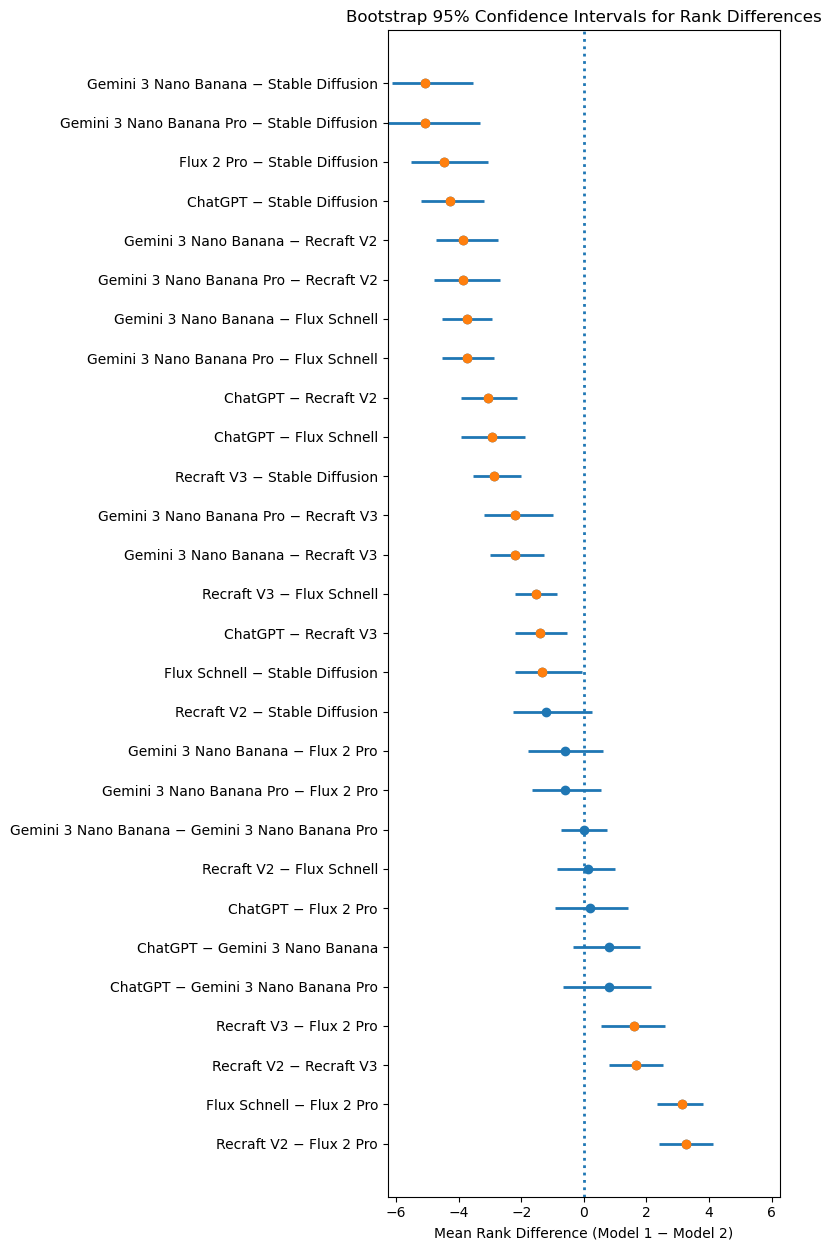

In [33]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

Παρακάτων έχουμε το Critical Difference Diagram. υπολογίζοντας την μέση βαθμολογία κάθε μοντέλου, τις τοποθετούμε σε έναν άξονα με την επιπλέον πληροφορία του nemenyi τεστ να μας δείχνει ποια μοντέλα δεν διαφέρουν στατιστικά σημαντικά μεταξύ τους (αυτά που ενώνονται με μία οριζόντια γραμμή). Το μοντέλο που βρίσκεται πιο αριστερά στον άξονα είναι το καλύτερο εφόσον έχει την μικρότερη μέση βαθμολογία. 

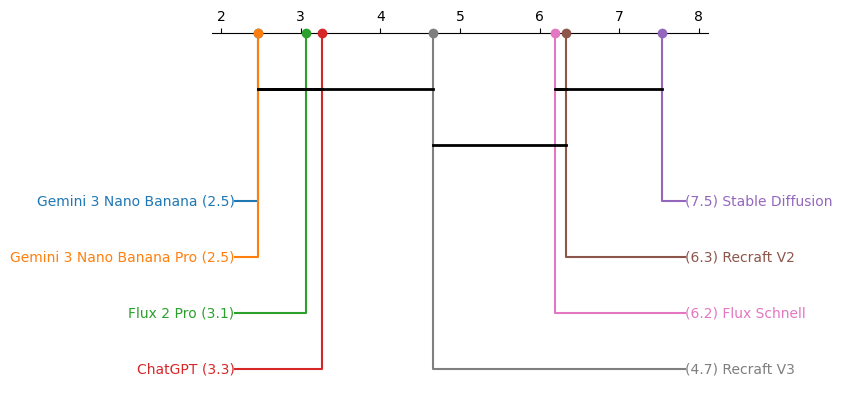

In [34]:
mean_ranks = img_gen_p1.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

Για την επαλήθευση των αποτελεσμάτων του nemenyi post hoc τεστ, κάνουμε τους πλευρικού ελέγχους και με το pairwise wilcox test. Παρατηρούμε πως τα αποτελέσματα είναι ίδια ή σχεδόν ίδια εάν λάβουμε υπόψη το p-value adjustment method που χρησιμοποιούμε, το οποίο είναι το bonferroni method.

In [35]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.025 0.028 0.037 -     -     -     -    
5 0.402 0.067 0.233 0.206 -     -     -    
6 0.055 0.019 0.019 1.000 0.083 -     -    
7 1.000 1.000 1.000 0.019 0.514 0.021 -    
8 0.024 0.031 0.041 0.279 0.023 0.296 0.028

P value adjustment method: bonferroni 



### Prompt 2

In [36]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p2

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        4
 2 1     Gemini 3 Nano Banana           1
 3 1     Gemini 3 Nano Banana Pro       2
 4 1     Recraft V2                     5
 5 1     Recraft V3                     7
 6 1     Flux Schnell                   6
 7 1     Flux 2 Pro                     3
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        2
10 2     Gemini 3 Nano Banana           5
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 66.578, df = 7, p-value = 7.241e-12


      .y.  n   effsize    method magnitude
1 Ranking 15 0.6340741 Kendall W     large



In [37]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 7.24144485580929e-12 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [38]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p2.values)

nemenyi.index = img_gen_p2.columns
nemenyi.columns = img_gen_p2.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              0.999841   
Gemini 3 Nano Banana                 0.999841              1.000000   
Gemini 3 Nano Banana Pro             0.524526              0.248511   
Recraft V2                           0.677930              0.910996   
Recraft V3                           0.423311              0.726028   
Flux Schnell                         0.046437              0.152571   
Flux 2 Pro                           0.986645              0.999841   
Stable Diffusion                     0.000002              0.000024   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.524526             0.677930   
Gemini 3 Nano Banana                      0.248511             0.910996   
Gemini 3 Nano Banana Pro                  1.000000             0.006335   
Recraft V2                                0.006335             1.000000   
Recraft V3                                0.001471             0.999954   
Flux Schnell                              0.000016             0.882942   
Flux 2 Pro                                0.087129             0.992063   
Stable Diffusion                          0.000000             0.006335   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.423311             0.046437   
Gemini 3 Nano Banana                 0.726028             0.152571   
Gemini 3 Nano Banana Pro             0.001471             0.000016   
Recraft V2                           0.999954             0.882942   
Recraft V3                           1.000000             0.978743   
Flux Schnell                         0.978743             1.000000   
Flux 2 Pro                           0.934317             0.375348   
Stable Diffusion                     0.023174             0.287570   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.986645             0.000002  
Gemini 3 Nano Banana                 0.999841             0.000024  
Gemini 3 Nano Banana Pro             0.087129             0.000000  
Recraft V2                           0.992063             0.006335  
Recraft V3                           0.934317             0.023174  
Flux Schnell                         0.375348             0.287570  
Flux 2 Pro                           1.000000             0.000208  
Stable Diffusion                     0.000208             1.000000

In [39]:
ranks = img_gen_p2.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  0.999841   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.524526   
2                    ChatGPT                Recraft V2  0.677930   
3                    ChatGPT                Recraft V3  0.423311   
4                    ChatGPT              Flux Schnell  0.046437   
5                    ChatGPT                Flux 2 Pro  0.986645   
6                    ChatGPT          Stable Diffusion  0.000002   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  0.248511   
8       Gemini 3 Nano Banana                Recraft V2  0.910996   
9       Gemini 3 Nano Banana                Recraft V3  0.726028   
10      Gemini 3 Nano Banana              Flux Schnell  0.152571   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.999841   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000024   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.006335   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.001471   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.000016   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.087129   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.999954   
19                Recraft V2              Flux Schnell  0.882942   
20                Recraft V2                Flux 2 Pro  0.992063   
21                Recraft V2          Stable Diffusion  0.006335   
22                Recraft V3              Flux Schnell  0.978743   
23                Recraft V3                Flux 2 Pro  0.934317   
24                Recraft V3          Stable Diffusion  0.023174   
25              Flux Schnell                Flux 2 Pro  0.375348   
26              Flux Schnell          Stable Diffusion  0.287570   
27                Flux 2 Pro          Stable Diffusion  0.000208   

         Mean rank diff             CI_lower             CI_upper  
0             -0.400000            -1.733333             0.933333  
1              1.733333             0.933333             2.466667  
2             -1.533333            -2.466667            -0.600000  
3             -1.866667            -3.000000            -0.533333  
4             -2.733333            -3.533333            -1.666667  
5             -0.800000            -2.066667             0.400000  
6             -4.800000            -5.466667            -4.133333  
7              2.133333             1.133333             3.133333  
8             -1.133333            -2.466667             0.333333  
9             -1.466667            -3.200000             0.400000  
10            -2.333333            -3.666667            -0.866667  
11            -0.400000            -1.266667             0.533333  
12            -4.400000            -5.400000            -3.400000  
13            -3.266667            -4.066667            -2.533333  
14            -3.600000            -4.600000            -2.466667  
15            -4.466667            -5.066667            -3.733333  
16            -2.533333            -3.400000            -1.666667  
17            -6.533333            -6.800000            -6.200000  
18            -0.333333            -1.333333             0.800000  
19            -1.200000            -1.933333            -0.466667  
20             0.733333            -0.666667             2.066667  
21            -3.266667            -3.933333            -2.600000  
22            -0.866667            -1.733333             0.000000  
23             1.066667            -0.666667             2.666667  
24            -2.933333            -3.933333            -2.000000  
25             1.933333             0.800000             2.933333  
26            -2.066667            -2.600000            -1.600000  
27            -4.000000            -4.800000            -3.133333

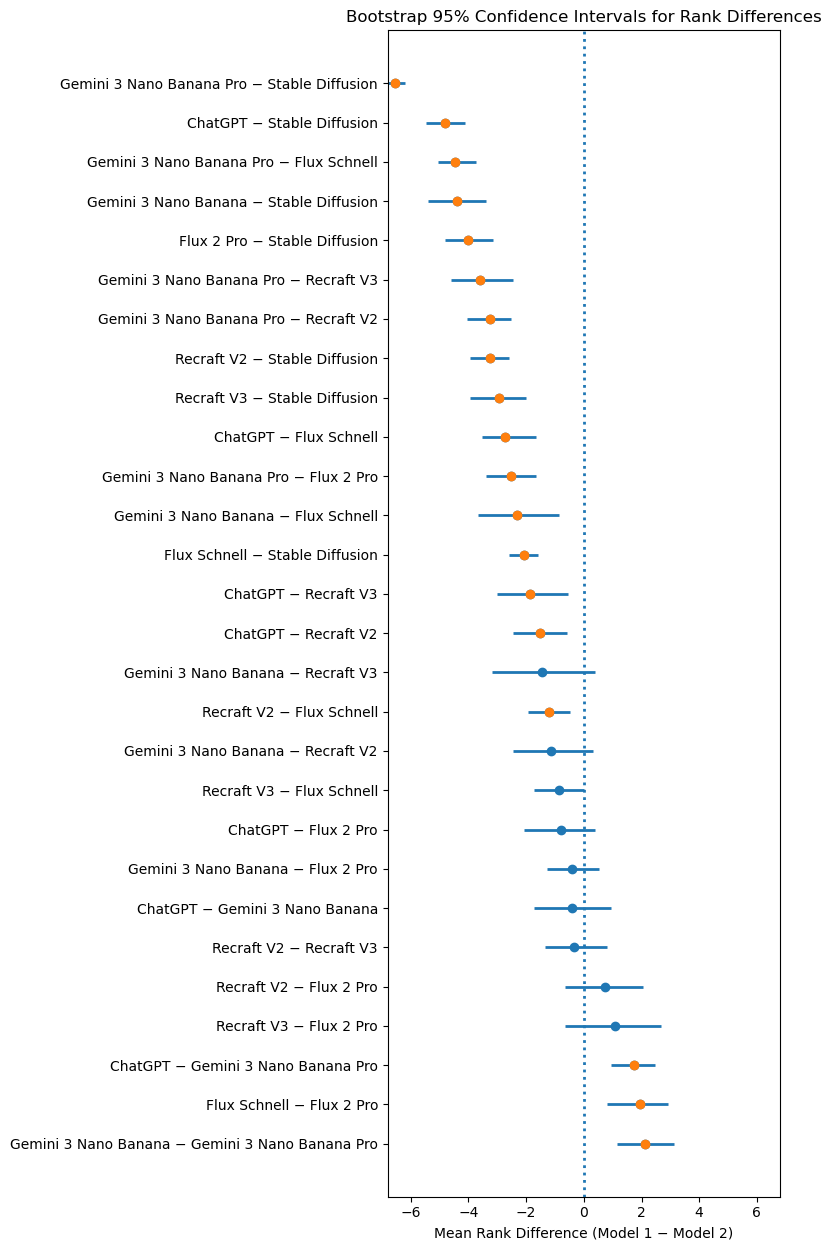

In [40]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

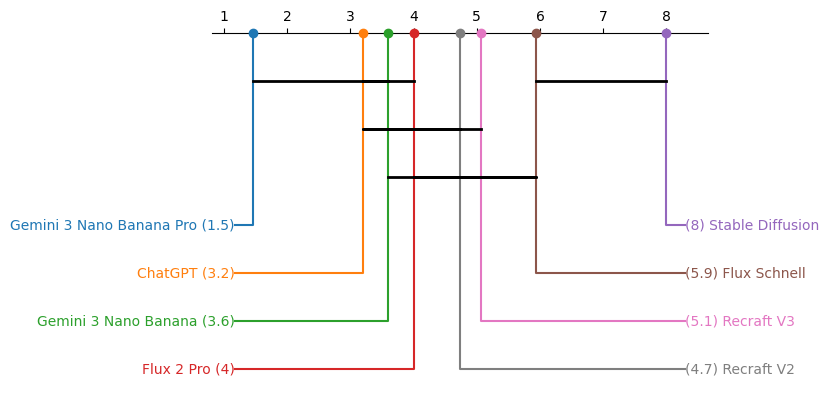

In [41]:
mean_ranks = img_gen_p2.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [42]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 0.125 0.085 -     -     -     -     -    
4 0.398 1.000 0.019 -     -     -     -    
5 0.362 1.000 0.035 1.000 -     -     -    
6 0.080 0.427 0.018 0.264 1.000 -     -    
7 1.000 1.000 0.035 1.000 1.000 0.185 -    
8 0.017 0.019 0.014 0.018 0.019 0.016 0.019

P value adjustment method: bonferroni 



### Prompt 3

In [43]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p3

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        2
 2 1     Gemini 3 Nano Banana           1
 3 1     Gemini 3 Nano Banana Pro       4
 4 1     Recraft V2                     5
 5 1     Recraft V3                     6
 6 1     Flux Schnell                   7
 7 1     Flux 2 Pro                     3
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        4
10 2     Gemini 3 Nano Banana           5
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 67.644, df = 7, p-value = 4.415e-12


      .y.  n   effsize    method magnitude
1 Ranking 15 0.6442328 Kendall W     large



In [44]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 4.415072735417964e-12 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [45]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p3.values)

nemenyi.index = img_gen_p3.columns
nemenyi.columns = img_gen_p3.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              1.000000   
Gemini 3 Nano Banana                 1.000000              1.000000   
Gemini 3 Nano Banana Pro             0.999954              0.999954   
Recraft V2                           0.329953              0.329953   
Recraft V3                           0.127582              0.127582   
Flux Schnell                         0.002689              0.002689   
Flux 2 Pro                           0.999841              0.999841   
Stable Diffusion                     0.000000              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.999954             0.329953   
Gemini 3 Nano Banana                      0.999954             0.329953   
Gemini 3 Nano Banana Pro                  1.000000             0.152571   
Recraft V2                                0.152571             1.000000   
Recraft V3                                0.046437             0.999841   
Flux Schnell                              0.000569             0.726028   
Flux 2 Pro                                0.992063             0.627730   
Stable Diffusion                          0.000000             0.010860   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.127582             0.002689   
Gemini 3 Nano Banana                 0.127582             0.002689   
Gemini 3 Nano Banana Pro             0.046437             0.000569   
Recraft V2                           0.999841             0.726028   
Recraft V3                           1.000000             0.934317   
Flux Schnell                         0.934317             1.000000   
Flux 2 Pro                           0.329953             0.014077   
Stable Diffusion                     0.046437             0.576299   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.999841             0.000000  
Gemini 3 Nano Banana                 0.999841             0.000000  
Gemini 3 Nano Banana Pro             0.992063             0.000000  
Recraft V2                           0.627730             0.010860  
Recraft V3                           0.329953             0.046437  
Flux Schnell                         0.014077             0.576299  
Flux 2 Pro                           1.000000             0.000003  
Stable Diffusion                     0.000003             1.000000

In [46]:
ranks = img_gen_p3.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  1.000000   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.999954   
2                    ChatGPT                Recraft V2  0.329953   
3                    ChatGPT                Recraft V3  0.127582   
4                    ChatGPT              Flux Schnell  0.002689   
5                    ChatGPT                Flux 2 Pro  0.999841   
6                    ChatGPT          Stable Diffusion  0.000000   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  0.999954   
8       Gemini 3 Nano Banana                Recraft V2  0.329953   
9       Gemini 3 Nano Banana                Recraft V3  0.127582   
10      Gemini 3 Nano Banana              Flux Schnell  0.002689   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.999841   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.152571   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.046437   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.000569   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.992063   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.999841   
19                Recraft V2              Flux Schnell  0.726028   
20                Recraft V2                Flux 2 Pro  0.627730   
21                Recraft V2          Stable Diffusion  0.010860   
22                Recraft V3              Flux Schnell  0.934317   
23                Recraft V3                Flux 2 Pro  0.329953   
24                Recraft V3          Stable Diffusion  0.046437   
25              Flux Schnell                Flux 2 Pro  0.014077   
26              Flux Schnell          Stable Diffusion  0.576299   
27                Flux 2 Pro          Stable Diffusion  0.000003   

         Mean rank diff             CI_lower             CI_upper  
0              0.000000            -0.800000             0.866667  
1              0.333333            -0.733333             1.400000  
2             -2.000000            -3.133333            -0.600000  
3             -2.400000            -3.600000            -1.133333  
4             -3.466667            -4.600000            -2.066667  
5             -0.400000            -1.466667             0.600000  
6             -5.133333            -5.866667            -4.400000  
7              0.333333            -0.866667             1.533333  
8             -2.000000            -3.400000            -0.333333  
9             -2.400000            -3.733333            -0.866667  
10            -3.466667            -4.666667            -1.933333  
11            -0.400000            -1.266667             0.466667  
12            -5.133333            -5.935000            -4.200000  
13            -2.333333            -3.466667            -1.200000  
14            -2.733333            -3.600000            -1.733333  
15            -3.800000            -4.666667            -2.800000  
16            -0.733333            -1.600000             0.200000  
17            -5.466667            -6.066667            -4.866667  
18            -0.400000            -1.333333             0.600000  
19            -1.466667            -2.333333            -0.533333  
20             1.600000             0.200000             2.866667  
21            -3.133333            -4.000000            -2.333333  
22            -1.066667            -2.200000             0.000000  
23             2.000000             0.666667             3.133333  
24            -2.733333            -3.600000            -2.066667  
25             3.066667             2.066667             3.801667  
26            -1.666667            -2.466667            -1.133333  
27            -4.733333            -5.333333            -4.066667

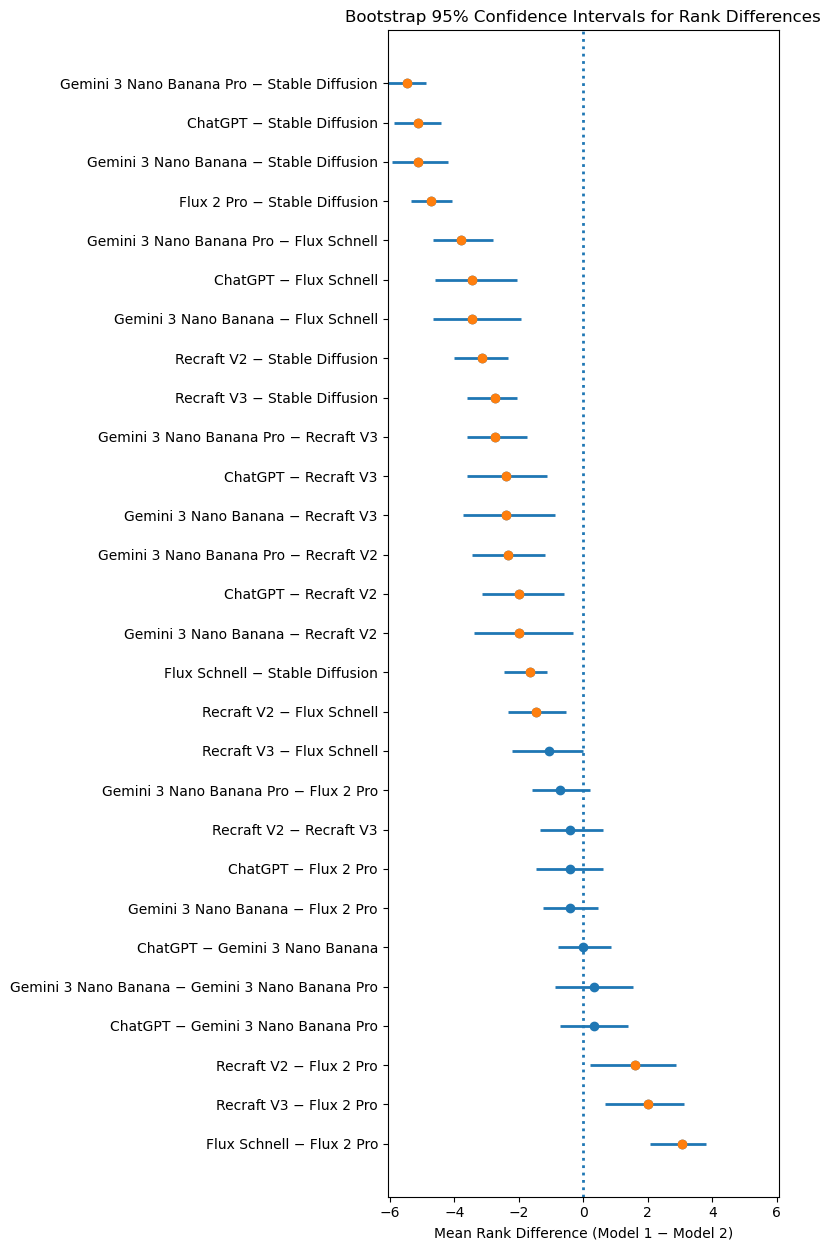

In [47]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

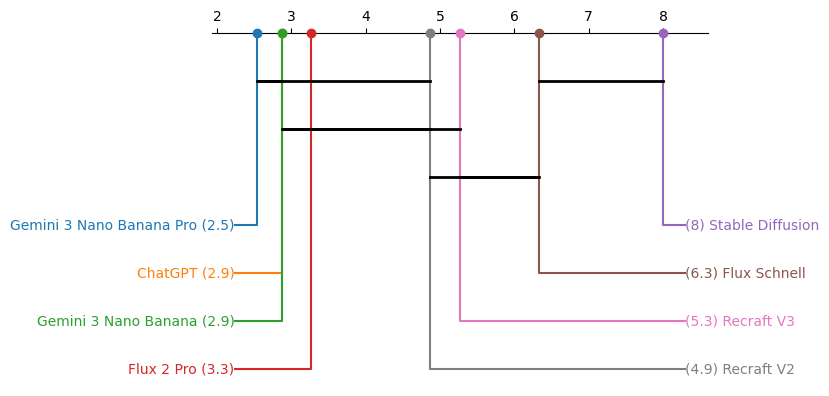

In [48]:
mean_ranks = img_gen_p3.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [49]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.629 0.963 0.119 -     -     -     -    
5 0.201 0.422 0.047 1.000 -     -     -    
6 0.106 0.132 0.026 0.299 1.000 -     -    
7 1.000 1.000 1.000 1.000 0.397 0.034 -    
8 0.019 0.019 0.019 0.017 0.015 0.011 0.019

P value adjustment method: bonferroni 



### Prompt 4

In [50]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p4

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3


   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        4
 2 1     Gemini 3 Nano Banana           2
 3 1     Gemini 3 Nano Banana Pro       1
 4 1     Recraft V2                     5
 5 1     Recraft V3                     6
 6 1     Flux Schnell                   7
 7 1     Flux 2 Pro                     3
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        2
10 2     Gemini 3 Nano Banana           4
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 69.378, df = 7, p-value = 1.973e-12


      .y.  n   effsize    method magnitude
1 Ranking 15 0.6607407 Kendall W     large



In [51]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 1.973367882127878e-12 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [52]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p4.values)

nemenyi.index = img_gen_p4.columns
nemenyi.columns = img_gen_p4.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              1.000000   
Gemini 3 Nano Banana                 1.000000              1.000000   
Gemini 3 Nano Banana Pro             1.000000              1.000000   
Recraft V2                           0.018124              0.029425   
Recraft V3                           0.037098              0.057704   
Flux Schnell                         0.002689              0.004792   
Flux 2 Pro                           0.576299              0.677930   
Stable Diffusion                     0.000000              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   1.000000             0.018124   
Gemini 3 Nano Banana                      1.000000             0.029425   
Gemini 3 Nano Banana Pro                  1.000000             0.029425   
Recraft V2                                0.029425             1.000000   
Recraft V3                                0.057704             0.999999   
Flux Schnell                              0.004792             0.999555   
Flux 2 Pro                                0.677930             0.812765   
Stable Diffusion                          0.000000             0.071174   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.037098             0.002689   
Gemini 3 Nano Banana                 0.057704             0.004792   
Gemini 3 Nano Banana Pro             0.057704             0.004792   
Recraft V2                           0.999999             0.999555   
Recraft V3                           1.000000             0.995581   
Flux Schnell                         0.995581             1.000000   
Flux 2 Pro                           0.910996             0.473267   
Stable Diffusion                     0.037098             0.248511   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.576299             0.000000  
Gemini 3 Nano Banana                 0.677930             0.000000  
Gemini 3 Nano Banana Pro             0.677930             0.000000  
Recraft V2                           0.812765             0.071174  
Recraft V3                           0.910996             0.037098  
Flux Schnell                         0.473267             0.248511  
Flux 2 Pro                           1.000000             0.000293  
Stable Diffusion                     0.000293             1.000000

In [53]:
ranks = img_gen_p4.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  1.000000   
1                    ChatGPT  Gemini 3 Nano Banana Pro  1.000000   
2                    ChatGPT                Recraft V2  0.018124   
3                    ChatGPT                Recraft V3  0.037098   
4                    ChatGPT              Flux Schnell  0.002689   
5                    ChatGPT                Flux 2 Pro  0.576299   
6                    ChatGPT          Stable Diffusion  0.000000   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  1.000000   
8       Gemini 3 Nano Banana                Recraft V2  0.029425   
9       Gemini 3 Nano Banana                Recraft V3  0.057704   
10      Gemini 3 Nano Banana              Flux Schnell  0.004792   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.677930   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.029425   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.057704   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.004792   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.677930   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.999999   
19                Recraft V2              Flux Schnell  0.999555   
20                Recraft V2                Flux 2 Pro  0.812765   
21                Recraft V2          Stable Diffusion  0.071174   
22                Recraft V3              Flux Schnell  0.995581   
23                Recraft V3                Flux 2 Pro  0.910996   
24                Recraft V3          Stable Diffusion  0.037098   
25              Flux Schnell                Flux 2 Pro  0.473267   
26              Flux Schnell          Stable Diffusion  0.248511   
27                Flux 2 Pro          Stable Diffusion  0.000293   

         Mean rank diff             CI_lower             CI_upper  
0             -0.133333            -0.933333             0.733333  
1             -0.133333            -1.266667             1.133333  
2             -3.000000            -4.200000            -1.600000  
3             -2.800000            -4.200000            -1.066667  
4             -3.466667            -4.333333            -2.533333  
5             -1.666667            -2.666667            -0.600000  
6             -5.600000            -6.333333            -4.733333  
7              0.000000            -0.800000             0.800000  
8             -2.866667            -3.800000            -1.666667  
9             -2.666667            -3.866667            -1.266667  
10            -3.333333            -4.000000            -2.600000  
11            -1.533333            -2.400000            -0.600000  
12            -5.466667            -5.933333            -4.933333  
13            -2.866667            -3.733333            -1.866667  
14            -2.666667            -3.733333            -1.533333  
15            -3.333333            -4.133333            -2.466667  
16            -1.533333            -2.600000            -0.333333  
17            -5.466667            -6.066667            -4.866667  
18             0.200000            -0.733333             1.266667  
19            -0.466667            -1.666667             0.666667  
20             1.333333             0.066667             2.466667  
21            -2.600000            -3.400000            -1.933333  
22            -0.666667            -1.933333             0.533333  
23             1.133333            -0.266667             2.466667  
24            -2.800000            -3.800000            -1.933333  
25             1.800000             0.733333             2.866667  
26            -2.133333            -2.800000            -1.600000  
27            -3.933333            -4.733333            -3.200000

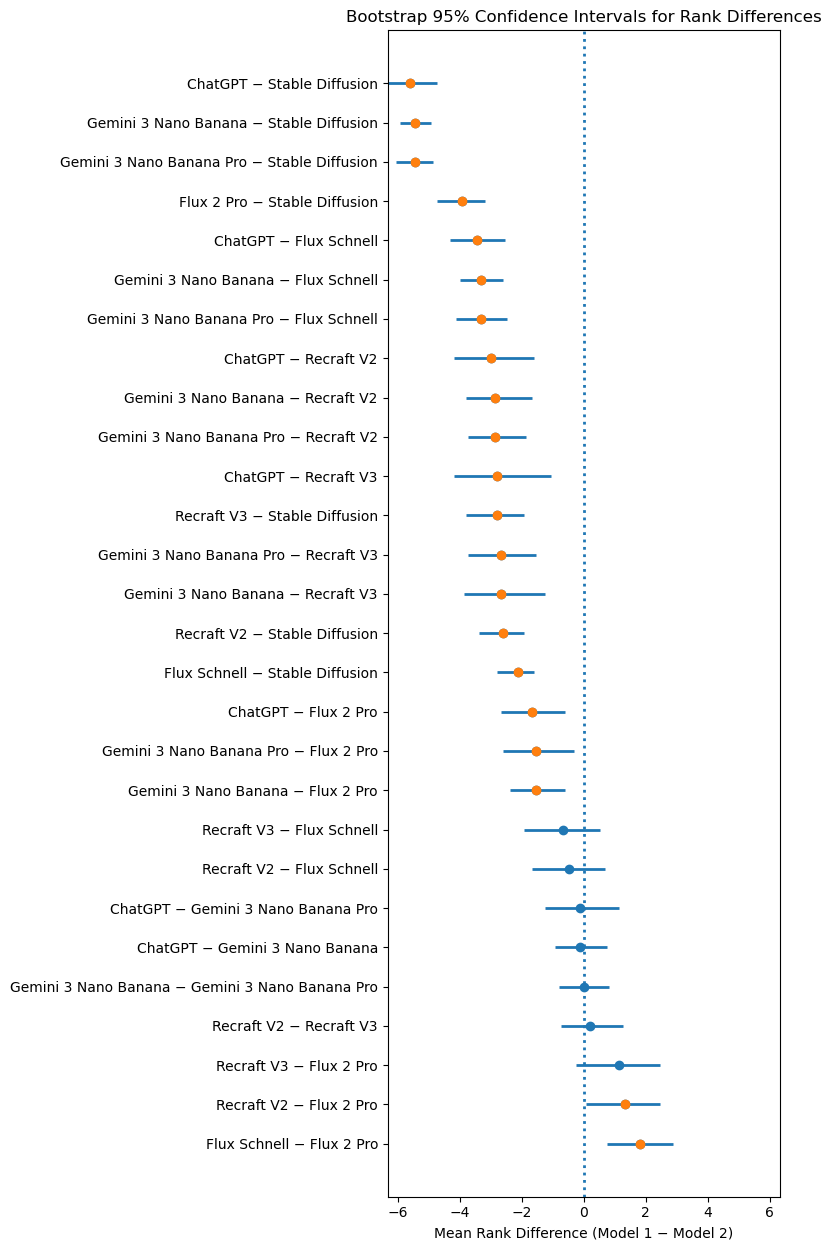

In [54]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

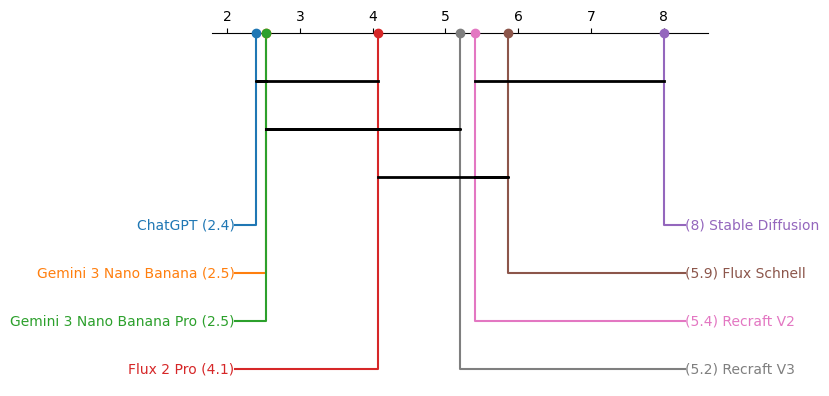

In [55]:
mean_ranks = img_gen_p4.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [56]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.098 0.165 0.042 -     -     -     -    
5 0.425 0.145 0.063 1.000 -     -     -    
6 0.026 0.019 0.026 1.000 1.000 -     -    
7 0.422 0.324 1.000 1.000 1.000 0.326 -    
8 0.018 0.018 0.018 0.018 0.019 0.018 0.019

P value adjustment method: bonferroni 



### Prompt 5

In [57]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p5

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3


   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        4
 2 1     Gemini 3 Nano Banana           2
 3 1     Gemini 3 Nano Banana Pro       1
 4 1     Recraft V2                     6
 5 1     Recraft V3                     7
 6 1     Flux Schnell                   5
 7 1     Flux 2 Pro                     3
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        3
10 2     Gemini 3 Nano Banana           1
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 70.756, df = 7, p-value = 1.039e-12


      .y.  n   effsize    method magnitude
1 Ranking 15 0.6738624 Kendall W     large



In [58]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 1.0393479964634091e-12 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [59]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p5.values)

nemenyi.index = img_gen_p5.columns
nemenyi.columns = img_gen_p5.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              0.934317   
Gemini 3 Nano Banana                 0.934317              1.000000   
Gemini 3 Nano Banana Pro             0.978743              0.999999   
Recraft V2                           0.057704              0.000785   
Recraft V3                           0.375348              0.018124   
Flux Schnell                         0.127582              0.002689   
Flux 2 Pro                           0.998932              0.627730   
Stable Diffusion                     0.000002              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.978743             0.057704   
Gemini 3 Nano Banana                      0.999999             0.000785   
Gemini 3 Nano Banana Pro                  1.000000             0.001995   
Recraft V2                                0.001995             1.000000   
Recraft V3                                0.037098             0.992063   
Flux Schnell                              0.006335             0.999990   
Flux 2 Pro                                0.771209             0.248511   
Stable Diffusion                          0.000000             0.248511   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.375348             0.127582   
Gemini 3 Nano Banana                 0.018124             0.002689   
Gemini 3 Nano Banana Pro             0.037098             0.006335   
Recraft V2                           0.992063             0.999990   
Recraft V3                           1.000000             0.999555   
Flux Schnell                         0.999555             1.000000   
Flux 2 Pro                           0.771209             0.423311   
Stable Diffusion                     0.029425             0.127582   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.998932             0.000002  
Gemini 3 Nano Banana                 0.627730             0.000000  
Gemini 3 Nano Banana Pro             0.771209             0.000000  
Recraft V2                           0.248511             0.248511  
Recraft V3                           0.771209             0.029425  
Flux Schnell                         0.423311             0.127582  
Flux 2 Pro                           1.000000             0.000050  
Stable Diffusion                     0.000050             1.000000

In [60]:
ranks = img_gen_p5.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  0.934317   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.978743   
2                    ChatGPT                Recraft V2  0.057704   
3                    ChatGPT                Recraft V3  0.375348   
4                    ChatGPT              Flux Schnell  0.127582   
5                    ChatGPT                Flux 2 Pro  0.998932   
6                    ChatGPT          Stable Diffusion  0.000002   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  0.999999   
8       Gemini 3 Nano Banana                Recraft V2  0.000785   
9       Gemini 3 Nano Banana                Recraft V3  0.018124   
10      Gemini 3 Nano Banana              Flux Schnell  0.002689   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.627730   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.001995   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.037098   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.006335   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.771209   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.992063   
19                Recraft V2              Flux Schnell  0.999990   
20                Recraft V2                Flux 2 Pro  0.248511   
21                Recraft V2          Stable Diffusion  0.248511   
22                Recraft V3              Flux Schnell  0.999555   
23                Recraft V3                Flux 2 Pro  0.771209   
24                Recraft V3          Stable Diffusion  0.029425   
25              Flux Schnell                Flux 2 Pro  0.423311   
26              Flux Schnell          Stable Diffusion  0.127582   
27                Flux 2 Pro          Stable Diffusion  0.000050   

         Mean rank diff             CI_lower             CI_upper  
0              1.066667             0.066667             2.000000  
1              0.866667            -0.133333             1.733333  
2             -2.666667            -3.400000            -1.866667  
3             -1.933333            -3.066667            -0.600000  
4             -2.400000            -3.400000            -1.333333  
5             -0.533333            -1.666667             0.533333  
6             -4.800000            -5.400000            -4.200000  
7             -0.200000            -0.866667             0.533333  
8             -3.733333            -4.733333            -2.466667  
9             -3.000000            -4.133333            -1.800000  
10            -3.466667            -4.200000            -2.733333  
11            -1.600000            -2.533333            -0.533333  
12            -5.866667            -6.400000            -5.333333  
13            -3.533333            -4.600000            -2.200000  
14            -2.800000            -4.133333            -1.266667  
15            -3.266667            -4.000000            -2.400000  
16            -1.400000            -2.066667            -0.666667  
17            -5.666667            -6.266667            -5.066667  
18             0.733333            -0.466667             2.000000  
19             0.266667            -0.866667             1.266667  
20             2.133333             0.666667             3.266667  
21            -2.133333            -3.000000            -1.466667  
22            -0.466667            -1.600000             0.600000  
23             1.400000            -0.266667             3.000000  
24            -2.866667            -3.866667            -1.933333  
25             1.866667             0.933333             2.733333  
26            -2.400000            -2.933333            -1.933333  
27            -4.266667            -5.066667            -3.466667

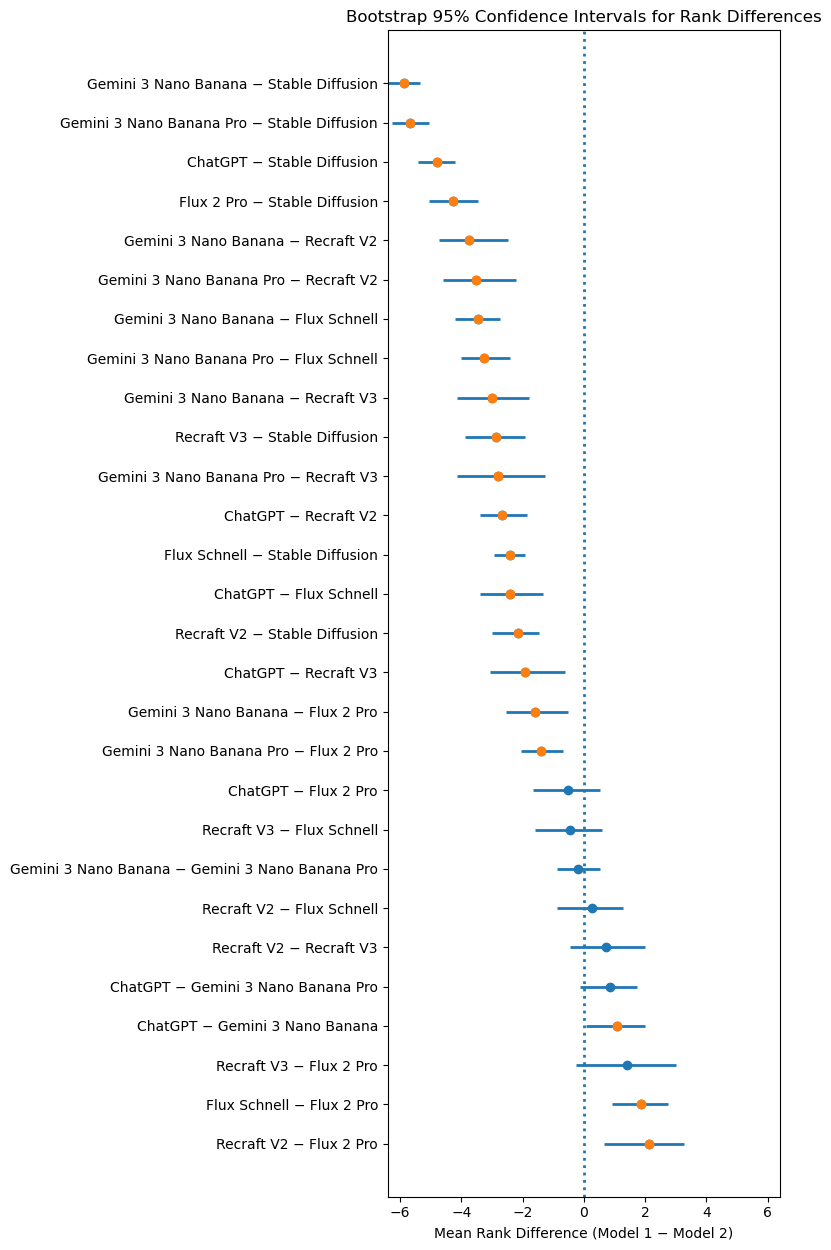

In [61]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

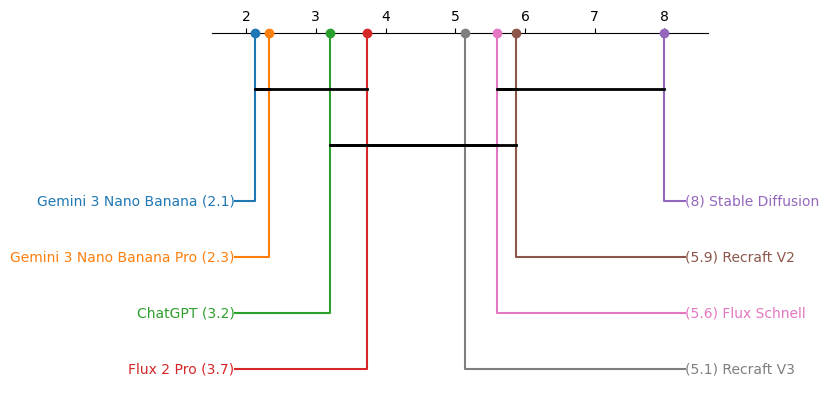

In [62]:
mean_ranks = img_gen_p5.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [63]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.029 0.038 0.084 -     -     -     -    
5 0.398 0.064 0.171 1.000 -     -     -    
6 0.124 0.019 0.025 1.000 1.000 -     -    
7 1.000 0.551 0.223 0.286 1.000 0.153 -    
8 0.018 0.018 0.018 0.018 0.019 0.018 0.019

P value adjustment method: bonferroni 



### Prompt 6

In [64]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p6

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        1
 2 1     Gemini 3 Nano Banana           2
 3 1     Gemini 3 Nano Banana Pro       5
 4 1     Recraft V2                     4
 5 1     Recraft V3                     6
 6 1     Flux Schnell                   7
 7 1     Flux 2 Pro                     3
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        1
10 2     Gemini 3 Nano Banana           4
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 70.911, df = 7, p-value = 9.667e-13


      .y.  n   effsize    method magnitude
1 Ranking 15 0.6753439 Kendall W     large



In [65]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 9.6671566792032e-13 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [66]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p6.values)

nemenyi.index = img_gen_p6.columns
nemenyi.columns = img_gen_p6.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              0.999555   
Gemini 3 Nano Banana                 0.999555              1.000000   
Gemini 3 Nano Banana Pro             0.997723              0.934317   
Recraft V2                           0.180992              0.046437   
Recraft V3                           0.934317              0.677930   
Flux Schnell                         0.002689              0.000293   
Flux 2 Pro                           0.978743              0.999841   
Stable Diffusion                     0.000001              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.997723             0.180992   
Gemini 3 Nano Banana                      0.934317             0.046437   
Gemini 3 Nano Banana Pro                  1.000000             0.576299   
Recraft V2                                0.576299             1.000000   
Recraft V3                                0.999555             0.882942   
Flux Schnell                              0.029425             0.882942   
Flux 2 Pro                                0.726028             0.010860   
Stable Diffusion                          0.000050             0.071174   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.934317             0.002689   
Gemini 3 Nano Banana                 0.677930             0.000293   
Gemini 3 Nano Banana Pro             0.999555             0.029425   
Recraft V2                           0.882942             0.882942   
Recraft V3                           1.000000             0.127582   
Flux Schnell                         0.127582             1.000000   
Flux 2 Pro                           0.375348             0.000035   
Stable Diffusion                     0.000569             0.771209   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.978743             0.000001  
Gemini 3 Nano Banana                 0.999841             0.000000  
Gemini 3 Nano Banana Pro             0.726028             0.000050  
Recraft V2                           0.010860             0.071174  
Recraft V3                           0.375348             0.000569  
Flux Schnell                         0.000035             0.771209  
Flux 2 Pro                           1.000000             0.000000  
Stable Diffusion                     0.000000             1.000000

In [67]:
ranks = img_gen_p6.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  0.999555   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.997723   
2                    ChatGPT                Recraft V2  0.180992   
3                    ChatGPT                Recraft V3  0.934317   
4                    ChatGPT              Flux Schnell  0.002689   
5                    ChatGPT                Flux 2 Pro  0.978743   
6                    ChatGPT          Stable Diffusion  0.000001   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  0.934317   
8       Gemini 3 Nano Banana                Recraft V2  0.046437   
9       Gemini 3 Nano Banana                Recraft V3  0.677930   
10      Gemini 3 Nano Banana              Flux Schnell  0.000293   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.999841   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.576299   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.999555   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.029425   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.726028   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000050   
18                Recraft V2                Recraft V3  0.882942   
19                Recraft V2              Flux Schnell  0.882942   
20                Recraft V2                Flux 2 Pro  0.010860   
21                Recraft V2          Stable Diffusion  0.071174   
22                Recraft V3              Flux Schnell  0.127582   
23                Recraft V3                Flux 2 Pro  0.375348   
24                Recraft V3          Stable Diffusion  0.000569   
25              Flux Schnell                Flux 2 Pro  0.000035   
26              Flux Schnell          Stable Diffusion  0.771209   
27                Flux 2 Pro          Stable Diffusion  0.000000   

         Mean rank diff             CI_lower             CI_upper  
0              0.466667            -0.666667             1.600000  
1             -0.600000            -1.600000             0.335000  
2             -2.266667            -3.066667            -1.400000  
3             -1.066667            -2.333333             0.133333  
4             -3.466667            -4.133333            -2.866667  
5              0.866667            -0.333333             1.933333  
6             -4.866667            -5.466667            -4.266667  
7             -1.066667            -2.266667             0.200000  
8             -2.733333            -3.800000            -1.466667  
9             -1.533333            -2.600000            -0.266667  
10            -3.933333            -4.933333            -2.800000  
11             0.400000            -0.733333             1.600000  
12            -5.333333            -6.133333            -4.466667  
13            -1.666667            -2.800000            -0.466667  
14            -0.466667            -1.533333             0.600000  
15            -2.866667            -3.666667            -2.133333  
16             1.466667             0.066667             2.666667  
17            -4.266667            -5.000000            -3.533333  
18             1.200000             0.200000             2.133333  
19            -1.200000            -2.066667            -0.333333  
20             3.133333             2.133333             4.066667  
21            -2.600000            -3.266667            -2.066667  
22            -2.400000            -3.466667            -1.133333  
23             1.933333             0.800000             2.933333  
24            -3.800000            -4.600000            -3.000000  
25             4.333333             3.000000             5.333333  
26            -1.400000            -2.066667            -1.000000  
27            -5.733333            -6.466667            -4.866667

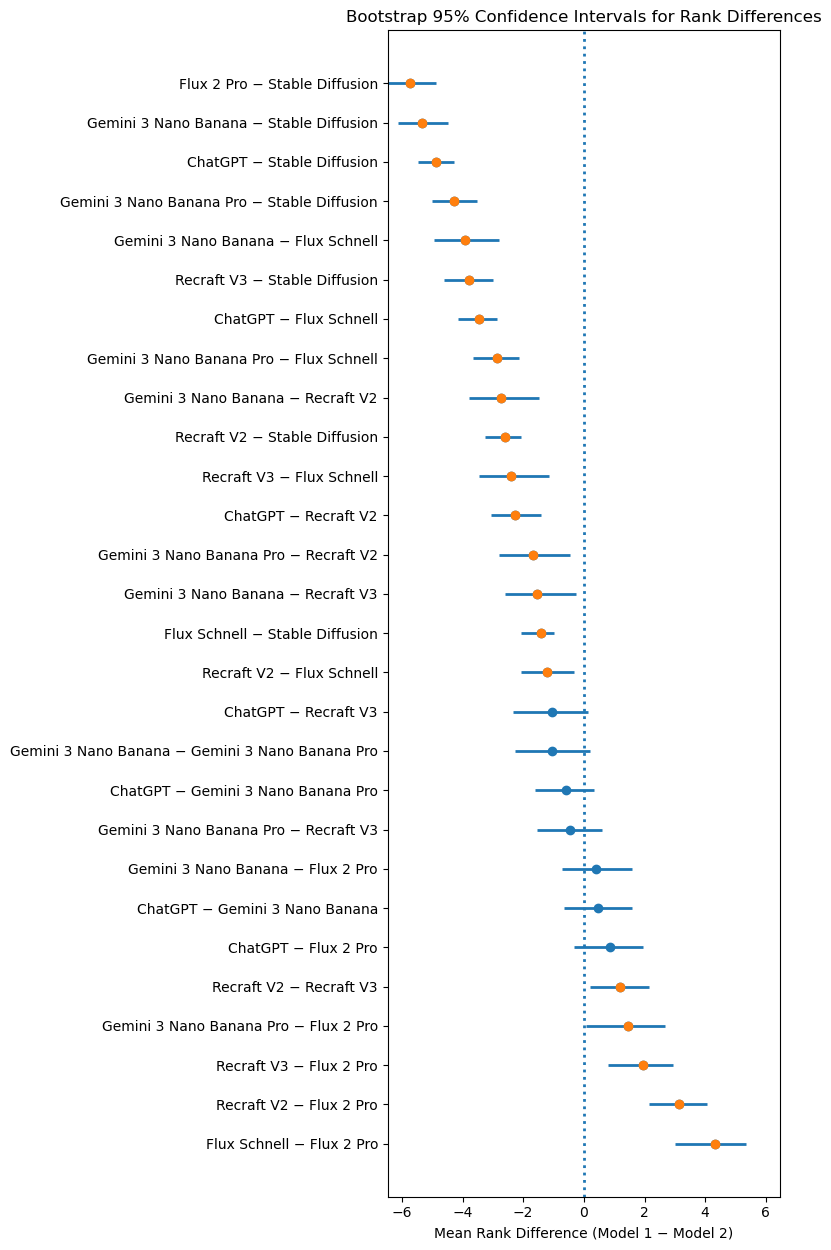

In [68]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

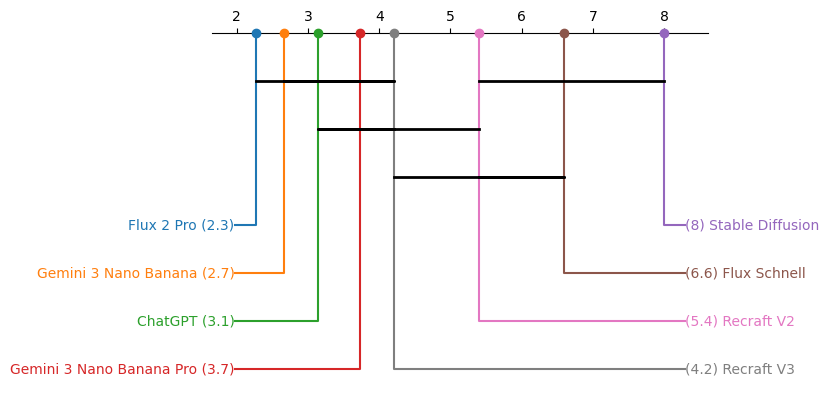

In [69]:
mean_ranks = img_gen_p6.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [70]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2      3      4      5      6      7     
2 1.0000 -      -      -      -      -      -     
3 1.0000 1.0000 -      -      -      -      -     
4 0.0620 0.1077 0.5538 -      -      -      -     
5 1.0000 1.0000 1.0000 1.0000 -      -      -     
6 0.0183 0.0255 0.0191 0.8076 0.2405 -      -     
7 1.0000 1.0000 1.0000 0.0344 0.2602 0.0305 -     
8 0.0183 0.0181 0.0194 0.0148 0.0191 0.0071 0.0174

P value adjustment method: bonferroni 



### Prompt 7

In [71]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_p7

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                        4
 2 1     Gemini 3 Nano Banana           2
 3 1     Gemini 3 Nano Banana Pro       1
 4 1     Recraft V2                     5
 5 1     Recraft V3                     6
 6 1     Flux Schnell                   7
 7 1     Flux 2 Pro                     3
 8 1     Stable Diffusion               8
 9 2     ChatGPT                        3
10 2     Gemini 3 Nano Banana           1
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 77.533, df = 7, p-value = 4.381e-14


      .y.  n   effsize    method magnitude
1 Ranking 15 0.7384127 Kendall W     large



In [72]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 4.381181295821333e-14 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [73]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_p7.values)

nemenyi.index = img_gen_p7.columns
nemenyi.columns = img_gen_p7.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              0.180992   
Gemini 3 Nano Banana                 0.180992              1.000000   
Gemini 3 Nano Banana Pro             0.087129              0.999990   
Recraft V2                           0.997723              0.029425   
Recraft V3                           1.000000              0.152571   
Flux Schnell                         0.212961              0.000016   
Flux 2 Pro                           0.812765              0.967757   
Stable Diffusion                     0.001995              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.087129             0.997723   
Gemini 3 Nano Banana                      0.999990             0.029425   
Gemini 3 Nano Banana Pro                  1.000000             0.010860   
Recraft V2                                0.010860             1.000000   
Recraft V3                                0.071174             0.998932   
Flux Schnell                              0.000003             0.627730   
Flux 2 Pro                                0.882942             0.375348   
Stable Diffusion                          0.000000             0.023174   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              1.000000             0.212961   
Gemini 3 Nano Banana                 0.152571             0.000016   
Gemini 3 Nano Banana Pro             0.071174             0.000003   
Recraft V2                           0.998932             0.627730   
Recraft V3                           1.000000             0.248511   
Flux Schnell                         0.248511             1.000000   
Flux 2 Pro                           0.771209             0.001995   
Stable Diffusion                     0.002689             0.812765   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.812765             0.001995  
Gemini 3 Nano Banana                 0.967757             0.000000  
Gemini 3 Nano Banana Pro             0.882942             0.000000  
Recraft V2                           0.375348             0.023174  
Recraft V3                           0.771209             0.002689  
Flux Schnell                         0.001995             0.812765  
Flux 2 Pro                           1.000000             0.000001  
Stable Diffusion                     0.000001             1.000000

In [74]:
ranks = img_gen_p7.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  0.180992   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.087129   
2                    ChatGPT                Recraft V2  0.997723   
3                    ChatGPT                Recraft V3  1.000000   
4                    ChatGPT              Flux Schnell  0.212961   
5                    ChatGPT                Flux 2 Pro  0.812765   
6                    ChatGPT          Stable Diffusion  0.001995   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  0.999990   
8       Gemini 3 Nano Banana                Recraft V2  0.029425   
9       Gemini 3 Nano Banana                Recraft V3  0.152571   
10      Gemini 3 Nano Banana              Flux Schnell  0.000016   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.967757   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.010860   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.071174   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.000003   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.882942   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.998932   
19                Recraft V2              Flux Schnell  0.627730   
20                Recraft V2                Flux 2 Pro  0.375348   
21                Recraft V2          Stable Diffusion  0.023174   
22                Recraft V3              Flux Schnell  0.248511   
23                Recraft V3                Flux 2 Pro  0.771209   
24                Recraft V3          Stable Diffusion  0.002689   
25              Flux Schnell                Flux 2 Pro  0.001995   
26              Flux Schnell          Stable Diffusion  0.812765   
27                Flux 2 Pro          Stable Diffusion  0.000001   

         Mean rank diff             CI_lower             CI_upper  
0              2.266667             1.400000             3.066667  
1              2.533333             1.600000             3.400000  
2             -0.600000            -1.600000             0.400000  
3             -0.066667            -1.266667             1.133333  
4             -2.200000            -2.800000            -1.600000  
5              1.333333             0.333333             2.333333  
6             -3.533333            -4.133333            -2.933333  
7              0.266667            -0.666667             1.066667  
8             -2.866667            -3.733333            -1.933333  
9             -2.333333            -3.533333            -0.933333  
10            -4.466667            -5.133333            -3.733333  
11            -0.933333            -1.733333            -0.066667  
12            -5.800000            -6.333333            -5.200000  
13            -3.133333            -3.866667            -2.266667  
14            -2.600000            -3.533333            -1.533333  
15            -4.733333            -5.400000            -4.000000  
16            -1.200000            -2.266667            -0.066667  
17            -6.066667            -6.533333            -5.466667  
18             0.533333            -0.400000             1.600000  
19            -1.600000            -2.466667            -0.666667  
20             1.933333             0.666667             3.066667  
21            -2.933333            -3.600000            -2.333333  
22            -2.133333            -3.133333            -1.133333  
23             1.400000             0.000000             2.666667  
24            -3.466667            -4.333333            -2.666667  
25             3.533333             2.733333             4.266667  
26            -1.333333            -1.733333            -1.000000  
27            -4.866667            -5.600000            -4.131667

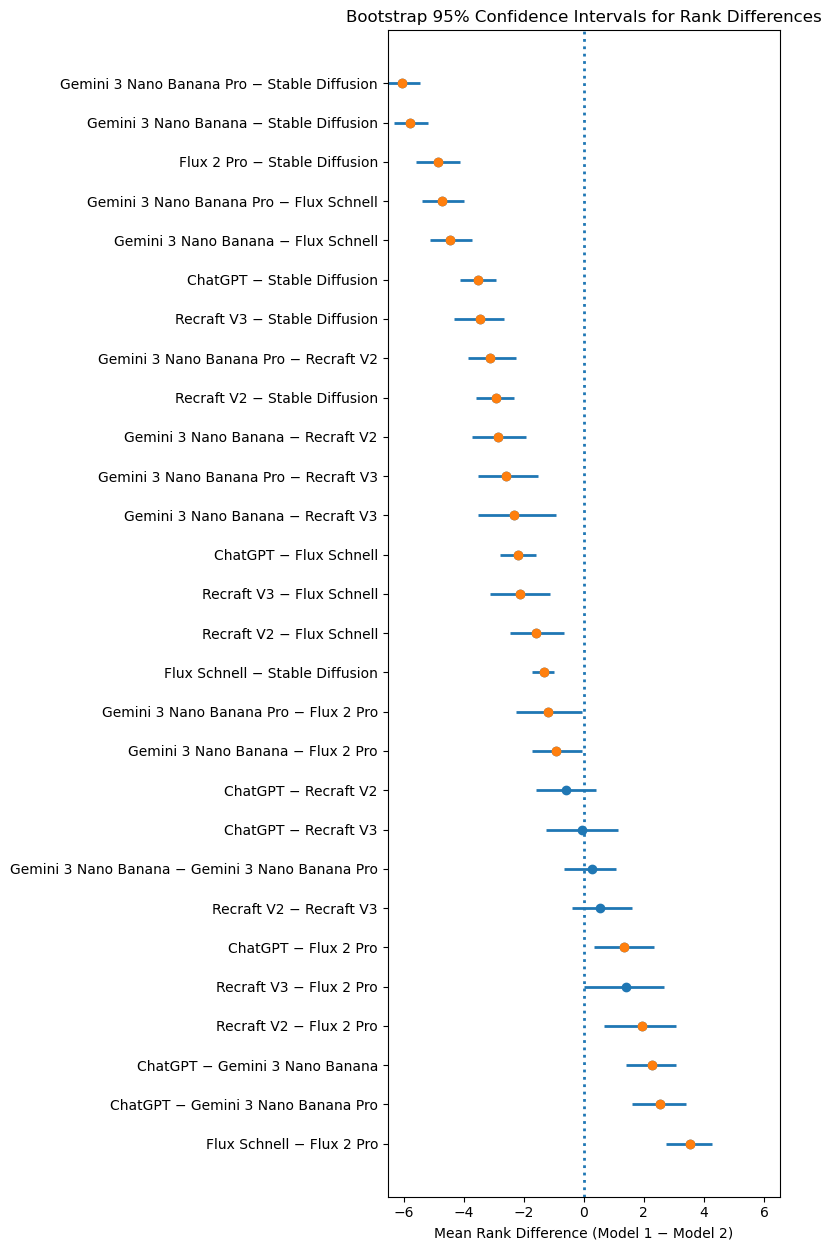

In [75]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

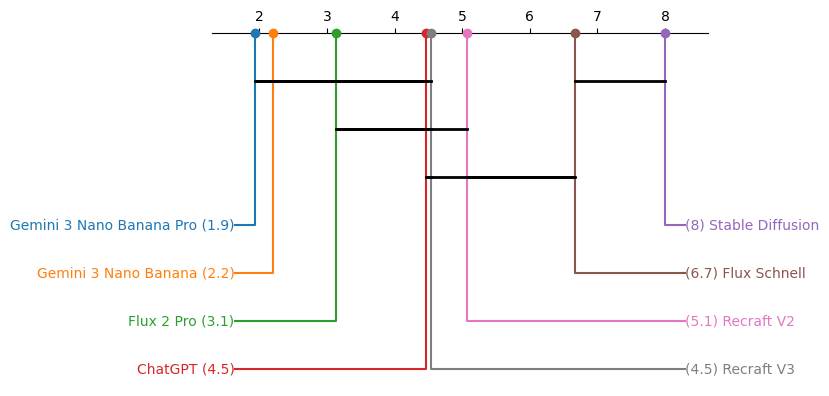

In [76]:
mean_ranks = img_gen_p7.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [77]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2      3      4      5      6      7     
2 0.0511 -      -      -      -      -      -     
3 0.0619 1.0000 -      -      -      -      -     
4 1.0000 0.0303 0.0250 -      -      -      -     
5 1.0000 0.3457 0.0631 1.0000 -      -      -     
6 0.0180 0.0185 0.0180 0.2550 0.1188 -      -     
7 0.8799 1.0000 1.0000 0.5812 1.0000 0.0174 -     
8 0.0186 0.0182 0.0170 0.0191 0.0191 0.0091 0.0189

P value adjustment method: bonferroni 



### Mean score for all prompts

In [29]:
img_gen_mean = img_gen_mean.astype(float)
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = img_gen_mean

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method                   Ranking
   <fct> <chr>                      <dbl>
 1 1     ChatGPT                     3.14
 2 1     Gemini 3 Nano Banana        1.71
 3 1     Gemini 3 Nano Banana Pro    2.14
 4 1     Recraft V2                  5.14
 5 1     Recraft V3                  6.14
 6 1     Flux Schnell                6.57
 7 1     Flux 2 Pro                  3.14
 8 1     Stable Diffusion            8   
 9 2     ChatGPT                     2.43
10 2     Gemini 3 Nano Banana        3   
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 81.529, df = 7, p-value = 6.716e-15


      .y.  n   effsize    method magnitude
1 Ranking 15 0.7764675 Kendall W     large



In [79]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 6.7158004767783685e-15 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [80]:
nemenyi = sp.posthoc_nemenyi_friedman(img_gen_mean.values)

nemenyi.index = img_gen_mean.columns
nemenyi.columns = img_gen_mean.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT  Gemini 3 Nano Banana  \
ChatGPT                              1.000000              0.910996   
Gemini 3 Nano Banana                 0.910996              1.000000   
Gemini 3 Nano Banana Pro             0.812765              0.999999   
Recraft V2                           0.329953              0.010860   
Recraft V3                           0.576299              0.037098   
Flux Schnell                         0.002689              0.000007   
Flux 2 Pro                           0.999996              0.792479   
Stable Diffusion                     0.000004              0.000000   

                          Gemini 3 Nano Banana Pro           Recraft V2  \
ChatGPT                                   0.812765             0.329953   
Gemini 3 Nano Banana                      0.999999             0.010860   
Gemini 3 Nano Banana Pro                  1.000000             0.004792   
Recraft V2                                0.004792             1.000000   
Recraft V3                                0.018124             0.999954   
Flux Schnell                              0.000002             0.726028   
Flux 2 Pro                                0.653039             0.498781   
Stable Diffusion                          0.000000             0.051813   

                                   Recraft V3         Flux Schnell  \
ChatGPT                              0.576299             0.002689   
Gemini 3 Nano Banana                 0.037098             0.000007   
Gemini 3 Nano Banana Pro             0.018124             0.000002   
Recraft V2                           0.999954             0.726028   
Recraft V3                           1.000000             0.473267   
Flux Schnell                         0.473267             1.000000   
Flux 2 Pro                           0.749030             0.007267   
Stable Diffusion                     0.015986             0.867127   

                                   Flux 2 Pro     Stable Diffusion  
ChatGPT                              0.999996             0.000004  
Gemini 3 Nano Banana                 0.792479             0.000000  
Gemini 3 Nano Banana Pro             0.653039             0.000000  
Recraft V2                           0.498781             0.051813  
Recraft V3                           0.749030             0.015986  
Flux Schnell                         0.007267             0.867127  
Flux 2 Pro                           1.000000             0.000016  
Stable Diffusion                     0.000016             1.000000

In [81]:
ranks = img_gen_mean.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                   Model_2   p_value  \
0                    ChatGPT      Gemini 3 Nano Banana  0.910996   
1                    ChatGPT  Gemini 3 Nano Banana Pro  0.812765   
2                    ChatGPT                Recraft V2  0.329953   
3                    ChatGPT                Recraft V3  0.576299   
4                    ChatGPT              Flux Schnell  0.002689   
5                    ChatGPT                Flux 2 Pro  0.999996   
6                    ChatGPT          Stable Diffusion  0.000004   
7       Gemini 3 Nano Banana  Gemini 3 Nano Banana Pro  0.999999   
8       Gemini 3 Nano Banana                Recraft V2  0.010860   
9       Gemini 3 Nano Banana                Recraft V3  0.037098   
10      Gemini 3 Nano Banana              Flux Schnell  0.000007   
11      Gemini 3 Nano Banana                Flux 2 Pro  0.792479   
12      Gemini 3 Nano Banana          Stable Diffusion  0.000000   
13  Gemini 3 Nano Banana Pro                Recraft V2  0.004792   
14  Gemini 3 Nano Banana Pro                Recraft V3  0.018124   
15  Gemini 3 Nano Banana Pro              Flux Schnell  0.000002   
16  Gemini 3 Nano Banana Pro                Flux 2 Pro  0.653039   
17  Gemini 3 Nano Banana Pro          Stable Diffusion  0.000000   
18                Recraft V2                Recraft V3  0.999954   
19                Recraft V2              Flux Schnell  0.726028   
20                Recraft V2                Flux 2 Pro  0.498781   
21                Recraft V2          Stable Diffusion  0.051813   
22                Recraft V3              Flux Schnell  0.473267   
23                Recraft V3                Flux 2 Pro  0.749030   
24                Recraft V3          Stable Diffusion  0.015986   
25              Flux Schnell                Flux 2 Pro  0.007267   
26              Flux Schnell          Stable Diffusion  0.867127   
27                Flux 2 Pro          Stable Diffusion  0.000016   

         Mean rank diff             CI_lower             CI_upper  
0              1.133333             0.200000             1.966667  
1              1.333333             0.666667             2.033333  
2             -2.000000            -2.966667            -0.966667  
3             -1.666667            -2.666667            -0.366667  
4             -3.466667            -4.100000            -2.766667  
5             -0.233333            -1.133333             0.733333  
6             -4.700000            -5.266667            -4.066667  
7              0.200000            -0.533333             0.966667  
8             -3.133333            -4.200000            -1.866667  
9             -2.800000            -4.000000            -1.366667  
10            -4.600000            -5.333333            -3.800000  
11            -1.366667            -2.033333            -0.633333  
12            -5.833333            -6.466667            -5.133333  
13            -3.333333            -4.233333            -2.166667  
14            -3.000000            -3.833333            -1.933333  
15            -4.800000            -5.267500            -4.300000  
16            -1.566667            -2.166667            -0.900000  
17            -6.033333            -6.433333            -5.600000  
18             0.333333            -0.433333             1.133333  
19            -1.466667            -2.266667            -0.733333  
20             1.766667             0.600000             2.666667  
21            -2.700000            -3.466667            -2.066667  
22            -1.800000            -2.666667            -1.066667  
23             1.433333             0.300000             2.466667  
24            -3.033333            -3.866667            -2.366667  
25             3.233333             2.800000             3.633333  
26            -1.233333            -1.466667            -1.066667  
27            -4.466667            -5.000000            -3.966667

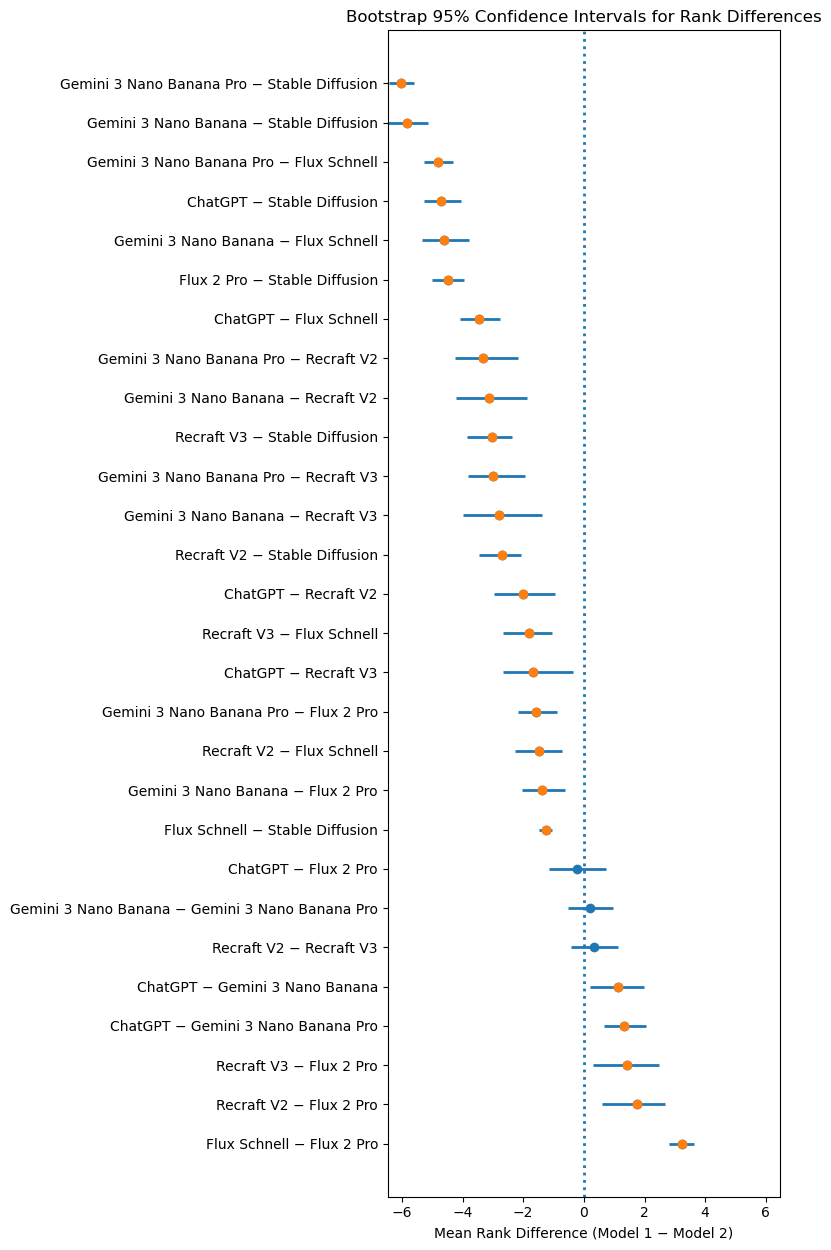

In [82]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

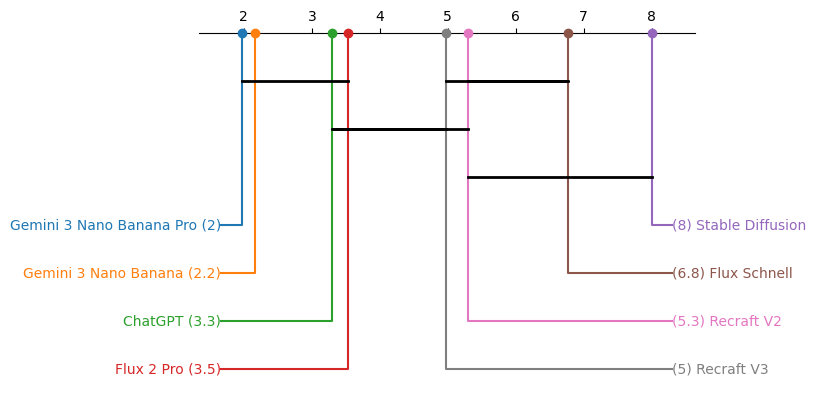

In [83]:
mean_ranks = img_gen_mean.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [84]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank exact test 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2      3      4      5      6      7     
2 1.0000 -      -      -      -      -      -     
3 0.1762 1.0000 -      -      -      -      -     
4 0.0085 0.0587 0.0249 -      -      -      -     
5 0.2724 0.0940 0.0372 1.0000 -      -      -     
6 0.0304 0.0202 0.0202 0.1248 0.0272 -      -     
7 1.0000 0.2716 0.1498 0.1376 0.5158 0.0202 -     
8 0.0200 0.0202 0.0201 0.0197 0.0201 0.0195 0.0198

P value adjustment method: bonferroni 



## Text

### Prompt 1

In [85]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_p1

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 1
 2 1     Gemini                  7
 3 1     DeepSeek V3.2           4
 4 1     Llama 4 Scout           6
 5 1     ToolBaz-v4.5-Fast       8
 6 1     Claude-Sonnet-4         3
 7 1     Voila                   5
 8 1     Picsart                 2
 9 2     ChatGPT                 1
10 2     Gemini                  5
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 31.156, df = 7, p-value = 5.82e-05


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2967196 Kendall W     small



In [86]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 5.819784605950872e-05 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [87]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_p1.values)

nemenyi.index = text_gen_p1.columns
nemenyi.columns = text_gen_p1.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.995581   
Gemini                        0.995581             1.000000   
DeepSeek V3.2                 0.882942             0.998932   
Llama 4 Scout                 0.001471             0.023174   
ToolBaz-v4.5-Fast             0.002689             0.037098   
Claude-Sonnet-4               0.934317             0.999841   
Voila                         0.046437             0.287570   
Picsart                       0.771209             0.992063   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.882942             0.001471   
Gemini                        0.998932             0.023174   
DeepSeek V3.2                 1.000000             0.127582   
Llama 4 Scout                 0.127582             1.000000   
ToolBaz-v4.5-Fast             0.180992             1.000000   
Claude-Sonnet-4               1.000000             0.087129   
Voila                         0.677930             0.978743   
Picsart                       0.999999             0.212961   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.002689             0.934317   
Gemini                        0.037098             0.999841   
DeepSeek V3.2                 0.180992             1.000000   
Llama 4 Scout                 1.000000             0.087129   
ToolBaz-v4.5-Fast             1.000000             0.127582   
Claude-Sonnet-4               0.127582             1.000000   
Voila                         0.992063             0.576299   
Picsart                       0.287570             0.999954   

                                 Voila              Picsart  
ChatGPT                       0.046437             0.771209  
Gemini                        0.287570             0.992063  
DeepSeek V3.2                 0.677930             0.999999  
Llama 4 Scout                 0.978743             0.212961  
ToolBaz-v4.5-Fast             0.992063             0.287570  
Claude-Sonnet-4               0.576299             0.999954  
Voila                         1.000000             0.812765  
Picsart                       0.812765             1.000000

In [88]:
ranks = text_gen_p1.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.995581            -0.666667   
1             ChatGPT      DeepSeek V3.2  0.882942            -1.200000   
2             ChatGPT      Llama 4 Scout  0.001471            -3.600000   
3             ChatGPT  ToolBaz-v4.5-Fast  0.002689            -3.466667   
4             ChatGPT    Claude-Sonnet-4  0.934317            -1.066667   
5             ChatGPT              Voila  0.046437            -2.733333   
6             ChatGPT            Picsart  0.771209            -1.400000   
7              Gemini      DeepSeek V3.2  0.998932            -0.533333   
8              Gemini      Llama 4 Scout  0.023174            -2.933333   
9              Gemini  ToolBaz-v4.5-Fast  0.037098            -2.800000   
10             Gemini    Claude-Sonnet-4  0.999841            -0.400000   
11             Gemini              Voila  0.287570            -2.066667   
12             Gemini            Picsart  0.992063            -0.733333   
13      DeepSeek V3.2      Llama 4 Scout  0.127582            -2.400000   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.180992            -2.266667   
15      DeepSeek V3.2    Claude-Sonnet-4  1.000000             0.133333   
16      DeepSeek V3.2              Voila  0.677930            -1.533333   
17      DeepSeek V3.2            Picsart  0.999999            -0.200000   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  1.000000             0.133333   
19      Llama 4 Scout    Claude-Sonnet-4  0.087129             2.533333   
20      Llama 4 Scout              Voila  0.978743             0.866667   
21      Llama 4 Scout            Picsart  0.212961             2.200000   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.127582             2.400000   
23  ToolBaz-v4.5-Fast              Voila  0.992063             0.733333   
24  ToolBaz-v4.5-Fast            Picsart  0.287570             2.066667   
25    Claude-Sonnet-4              Voila  0.576299            -1.666667   
26    Claude-Sonnet-4            Picsart  0.999954            -0.333333   
27              Voila            Picsart  0.812765             1.333333   

               CI_lower             CI_upper  
0             -1.933333             0.533333  
1             -2.466667             0.266667  
2             -4.800000            -2.133333  
3             -4.733333            -2.200000  
4             -2.600000             0.600000  
5             -4.133333            -1.200000  
6             -3.066667             0.266667  
7             -1.600000             0.600000  
8             -3.933333            -1.866667  
9             -4.066667            -1.400000  
10            -1.866667             1.000000  
11            -3.400000            -0.666667  
12            -2.400000             1.066667  
13            -3.333333            -1.466667  
14            -3.933333            -0.533333  
15            -1.400000             1.800000  
16            -3.133333             0.200000  
17            -2.133333             1.733333  
18            -1.200000             1.533333  
19             1.266667             3.800000  
20            -0.400000             2.133333  
21             0.533333             3.800000  
22             0.666667             3.866667  
23            -0.733333             2.066667  
24             0.133333             3.866667  
25            -2.866667            -0.466667  
26            -2.000000             1.333333  
27            -0.333333             2.933333

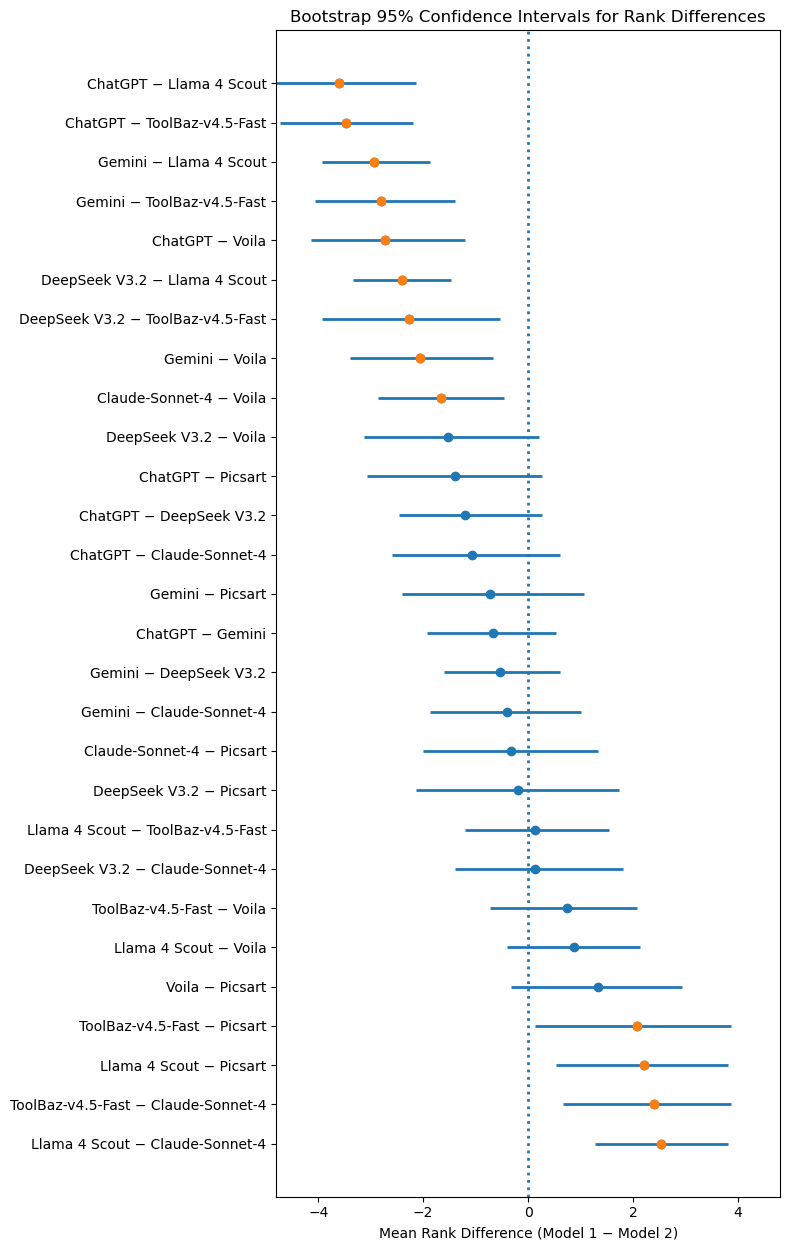

In [89]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

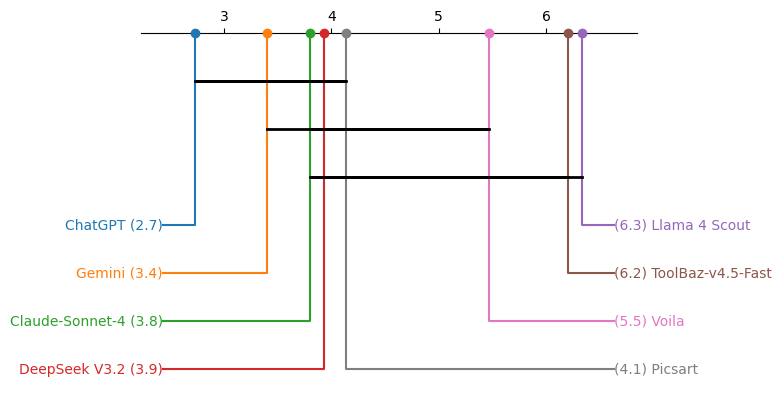

In [90]:
mean_ranks = text_gen_p1.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [91]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.065 0.043 0.067 -     -     -     -    
5 0.049 0.134 0.909 1.000 -     -     -    
6 1.000 1.000 1.000 0.159 0.965 -     -    
7 0.220 0.599 1.000 1.000 1.000 0.833 -    
8 1.000 1.000 1.000 0.579 1.000 1.000 1.000

P value adjustment method: bonferroni 



### Prompt 2

In [92]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_p2

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 1
 2 1     Gemini                  4
 3 1     DeepSeek V3.2           2
 4 1     Llama 4 Scout           7
 5 1     ToolBaz-v4.5-Fast       8
 6 1     Claude-Sonnet-4         6
 7 1     Voila                   5
 8 1     Picsart                 3
 9 2     ChatGPT                 1
10 2     Gemini                  8
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 26.156, df = 7, p-value = 0.0004724


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2491005 Kendall W     small



In [93]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.0004724269861684035 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [94]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_p2.values)

nemenyi.index = text_gen_p2.columns
nemenyi.columns = text_gen_p2.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.212961   
Gemini                        0.212961             1.000000   
DeepSeek V3.2                 0.576299             0.998932   
Llama 4 Scout                 0.000409             0.576299   
ToolBaz-v4.5-Fast             0.037098             0.997723   
Claude-Sonnet-4               0.812765             0.978743   
Voila                         0.003601             0.882942   
Picsart                       0.287570             1.000000   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.576299             0.000409   
Gemini                        0.998932             0.576299   
DeepSeek V3.2                 1.000000             0.212961   
Llama 4 Scout                 0.212961             1.000000   
ToolBaz-v4.5-Fast             0.910996             0.934317   
Claude-Sonnet-4               0.999954             0.087129   
Voila                         0.524526             0.999555   
Picsart                       0.999841             0.473267   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.037098             0.812765   
Gemini                        0.997723             0.978743   
DeepSeek V3.2                 0.910996             0.999954   
Llama 4 Scout                 0.934317             0.087129   
ToolBaz-v4.5-Fast             1.000000             0.726028   
Claude-Sonnet-4               0.726028             1.000000   
Voila                         0.997723             0.287570   
Picsart                       0.992063             0.992063   

                                 Voila              Picsart  
ChatGPT                       0.003601             0.287570  
Gemini                        0.882942             1.000000  
DeepSeek V3.2                 0.524526             0.999841  
Llama 4 Scout                 0.999555             0.473267  
ToolBaz-v4.5-Fast             0.997723             0.992063  
Claude-Sonnet-4               0.287570             0.992063  
Voila                         1.000000             0.812765  
Picsart                       0.812765             1.000000

In [95]:
ranks = text_gen_p2.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.212961            -2.200000   
1             ChatGPT      DeepSeek V3.2  0.576299            -1.666667   
2             ChatGPT      Llama 4 Scout  0.000409            -3.866667   
3             ChatGPT  ToolBaz-v4.5-Fast  0.037098            -2.800000   
4             ChatGPT    Claude-Sonnet-4  0.812765            -1.333333   
5             ChatGPT              Voila  0.003601            -3.400000   
6             ChatGPT            Picsart  0.287570            -2.066667   
7              Gemini      DeepSeek V3.2  0.998932             0.533333   
8              Gemini      Llama 4 Scout  0.576299            -1.666667   
9              Gemini  ToolBaz-v4.5-Fast  0.997723            -0.600000   
10             Gemini    Claude-Sonnet-4  0.978743             0.866667   
11             Gemini              Voila  0.882942            -1.200000   
12             Gemini            Picsart  1.000000             0.133333   
13      DeepSeek V3.2      Llama 4 Scout  0.212961            -2.200000   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.910996            -1.133333   
15      DeepSeek V3.2    Claude-Sonnet-4  0.999954             0.333333   
16      DeepSeek V3.2              Voila  0.524526            -1.733333   
17      DeepSeek V3.2            Picsart  0.999841            -0.400000   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.934317             1.066667   
19      Llama 4 Scout    Claude-Sonnet-4  0.087129             2.533333   
20      Llama 4 Scout              Voila  0.999555             0.466667   
21      Llama 4 Scout            Picsart  0.473267             1.800000   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.726028             1.466667   
23  ToolBaz-v4.5-Fast              Voila  0.997723            -0.600000   
24  ToolBaz-v4.5-Fast            Picsart  0.992063             0.733333   
25    Claude-Sonnet-4              Voila  0.287570            -2.066667   
26    Claude-Sonnet-4            Picsart  0.992063            -0.733333   
27              Voila            Picsart  0.812765             1.333333   

               CI_lower             CI_upper  
0             -3.666667            -0.600000  
1             -2.800000            -0.533333  
2             -4.733333            -2.866667  
3             -4.200000            -1.400000  
4             -2.266667            -0.400000  
5             -5.066667            -1.600000  
6             -3.200000            -0.800000  
7             -1.000000             1.866667  
8             -3.266667             0.066667  
9             -2.466667             1.400000  
10            -0.866667             2.533333  
11            -3.133333             0.933333  
12            -1.200000             1.400000  
13            -3.533333            -0.866667  
14            -3.000000             0.733333  
15            -1.200000             1.666667  
16            -3.466667             0.133333  
17            -1.266667             0.533333  
18            -0.200000             2.266667  
19             1.800000             3.333333  
20            -1.000000             1.935000  
21             0.400000             3.200000  
22             0.000000             2.933333  
23            -2.666667             1.466667  
24            -1.266667             2.666667  
25            -3.668333            -0.400000  
26            -2.133333             0.800000  
27            -0.466667             2.933333

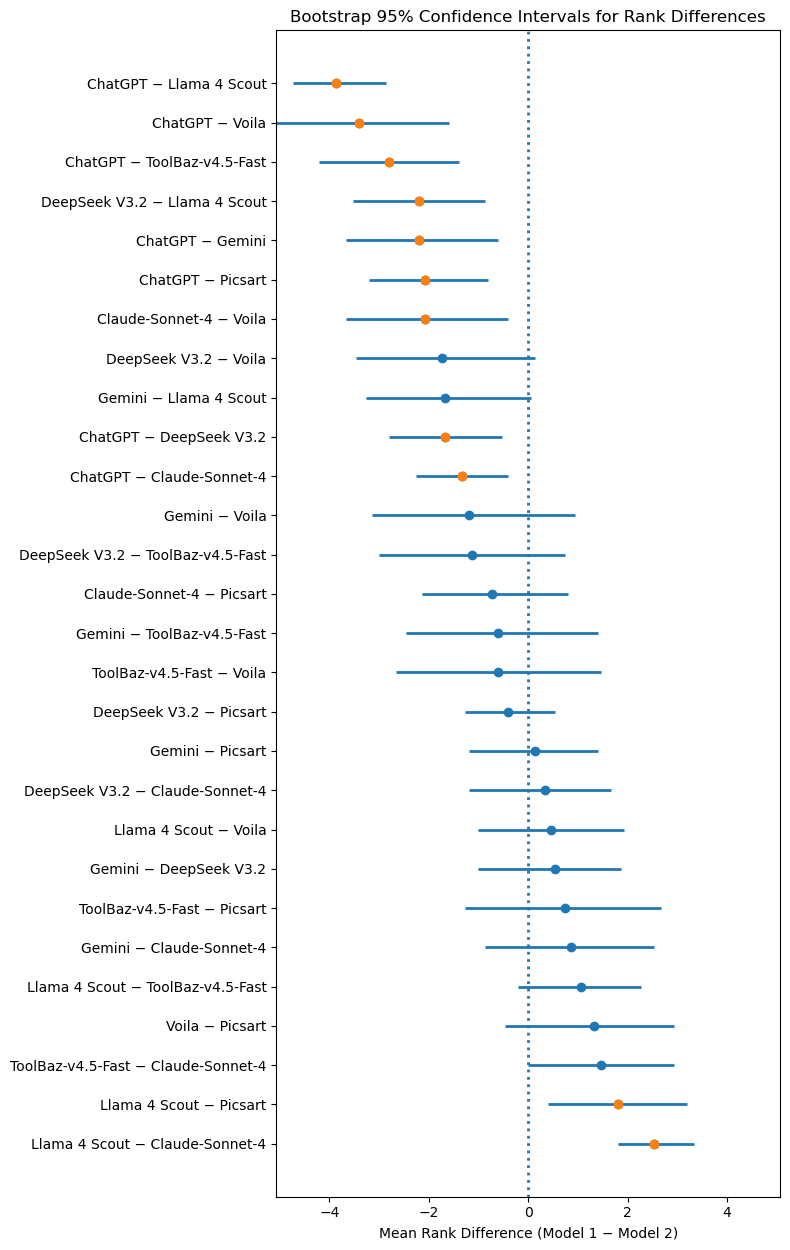

In [96]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

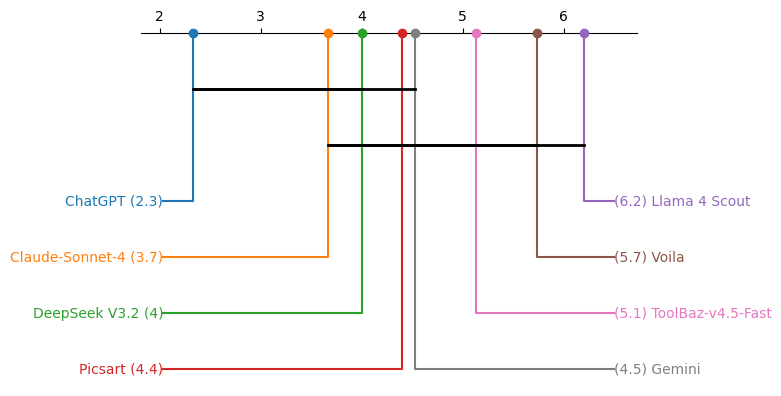

In [97]:
mean_ranks = text_gen_p2.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [98]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 0.714 -     -     -     -     -     -    
3 0.774 1.000 -     -     -     -     -    
4 0.026 1.000 0.337 -     -     -     -    
5 0.160 1.000 1.000 1.000 -     -     -    
6 0.602 1.000 1.000 0.019 1.000 -     -    
7 0.207 1.000 1.000 1.000 1.000 1.000 -    
8 0.285 1.000 1.000 0.727 1.000 1.000 1.000

P value adjustment method: bonferroni 



### Prompt 3

In [99]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_p3

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 2
 2 1     Gemini                  3
 3 1     DeepSeek V3.2           7
 4 1     Llama 4 Scout           8
 5 1     ToolBaz-v4.5-Fast       4
 6 1     Claude-Sonnet-4         6
 7 1     Voila                   5
 8 1     Picsart                 1
 9 2     ChatGPT                 1
10 2     Gemini                  7
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 35.489, df = 7, p-value = 9.05e-06


      .y.  n   effsize    method magnitude
1 Ranking 15 0.3379894 Kendall W  moderate



In [100]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 9.049867378324465e-06 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [101]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_p3.values)

nemenyi.index = text_gen_p3.columns
nemenyi.columns = text_gen_p3.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.953114   
Gemini                        0.953114             1.000000   
DeepSeek V3.2                 0.999555             0.998932   
Llama 4 Scout                 0.934317             1.000000   
ToolBaz-v4.5-Fast             0.006335             0.180992   
Claude-Sonnet-4               0.978743             1.000000   
Voila                         0.000208             0.018124   
Picsart                       0.127582             0.771209   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.999555             0.934317   
Gemini                        0.998932             1.000000   
DeepSeek V3.2                 1.000000             0.997723   
Llama 4 Scout                 0.997723             1.000000   
ToolBaz-v4.5-Fast             0.037098             0.212961   
Claude-Sonnet-4               0.999841             0.999999   
Voila                         0.001995             0.023174   
Picsart                       0.375348             0.812765   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.006335             0.978743   
Gemini                        0.180992             1.000000   
DeepSeek V3.2                 0.037098             0.999841   
Llama 4 Scout                 0.212961             0.999999   
ToolBaz-v4.5-Fast             1.000000             0.127582   
Claude-Sonnet-4               0.127582             1.000000   
Voila                         0.992063             0.010860   
Picsart                       0.978743             0.677930   

                                 Voila              Picsart  
ChatGPT                       0.000208             0.127582  
Gemini                        0.018124             0.771209  
DeepSeek V3.2                 0.001995             0.375348  
Llama 4 Scout                 0.023174             0.812765  
ToolBaz-v4.5-Fast             0.992063             0.978743  
Claude-Sonnet-4               0.010860             0.677930  
Voila                         1.000000             0.627730  
Picsart                       0.627730             1.000000

In [102]:
ranks = text_gen_p3.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.953114            -1.000000   
1             ChatGPT      DeepSeek V3.2  0.999555            -0.466667   
2             ChatGPT      Llama 4 Scout  0.934317            -1.066667   
3             ChatGPT  ToolBaz-v4.5-Fast  0.006335            -3.266667   
4             ChatGPT    Claude-Sonnet-4  0.978743            -0.866667   
5             ChatGPT              Voila  0.000208            -4.000000   
6             ChatGPT            Picsart  0.127582            -2.400000   
7              Gemini      DeepSeek V3.2  0.998932             0.533333   
8              Gemini      Llama 4 Scout  1.000000            -0.066667   
9              Gemini  ToolBaz-v4.5-Fast  0.180992            -2.266667   
10             Gemini    Claude-Sonnet-4  1.000000             0.133333   
11             Gemini              Voila  0.018124            -3.000000   
12             Gemini            Picsart  0.771209            -1.400000   
13      DeepSeek V3.2      Llama 4 Scout  0.997723            -0.600000   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.037098            -2.800000   
15      DeepSeek V3.2    Claude-Sonnet-4  0.999841            -0.400000   
16      DeepSeek V3.2              Voila  0.001995            -3.533333   
17      DeepSeek V3.2            Picsart  0.375348            -1.933333   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.212961            -2.200000   
19      Llama 4 Scout    Claude-Sonnet-4  0.999999             0.200000   
20      Llama 4 Scout              Voila  0.023174            -2.933333   
21      Llama 4 Scout            Picsart  0.812765            -1.333333   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.127582             2.400000   
23  ToolBaz-v4.5-Fast              Voila  0.992063            -0.733333   
24  ToolBaz-v4.5-Fast            Picsart  0.978743             0.866667   
25    Claude-Sonnet-4              Voila  0.010860            -3.133333   
26    Claude-Sonnet-4            Picsart  0.677930            -1.533333   
27              Voila            Picsart  0.627730             1.600000   

               CI_lower             CI_upper  
0             -2.333333             0.333333  
1             -2.066667             1.266667  
2             -2.733333             0.666667  
3             -4.600000            -1.800000  
4             -2.200000             0.600000  
5             -5.000000            -2.800000  
6             -3.733333            -1.000000  
7             -0.733333             1.800000  
8             -1.733333             1.600000  
9             -3.333333            -1.133333  
10            -1.200000             1.533333  
11            -4.333333            -1.400000  
12            -2.800000             0.066667  
13            -1.866667             0.733333  
14            -3.666667            -1.733333  
15            -1.800000             0.933333  
16            -5.000000            -1.866667  
17            -3.600000            -0.066667  
18            -3.600000            -0.733333  
19            -1.733333             2.000000  
20            -4.666667            -1.000000  
21            -3.000000             0.533333  
22             1.133333             3.600000  
23            -1.800000             0.600000  
24            -0.200000             1.933333  
25            -4.266667            -1.933333  
26            -2.933333            -0.066667  
27             0.600000             2.600000

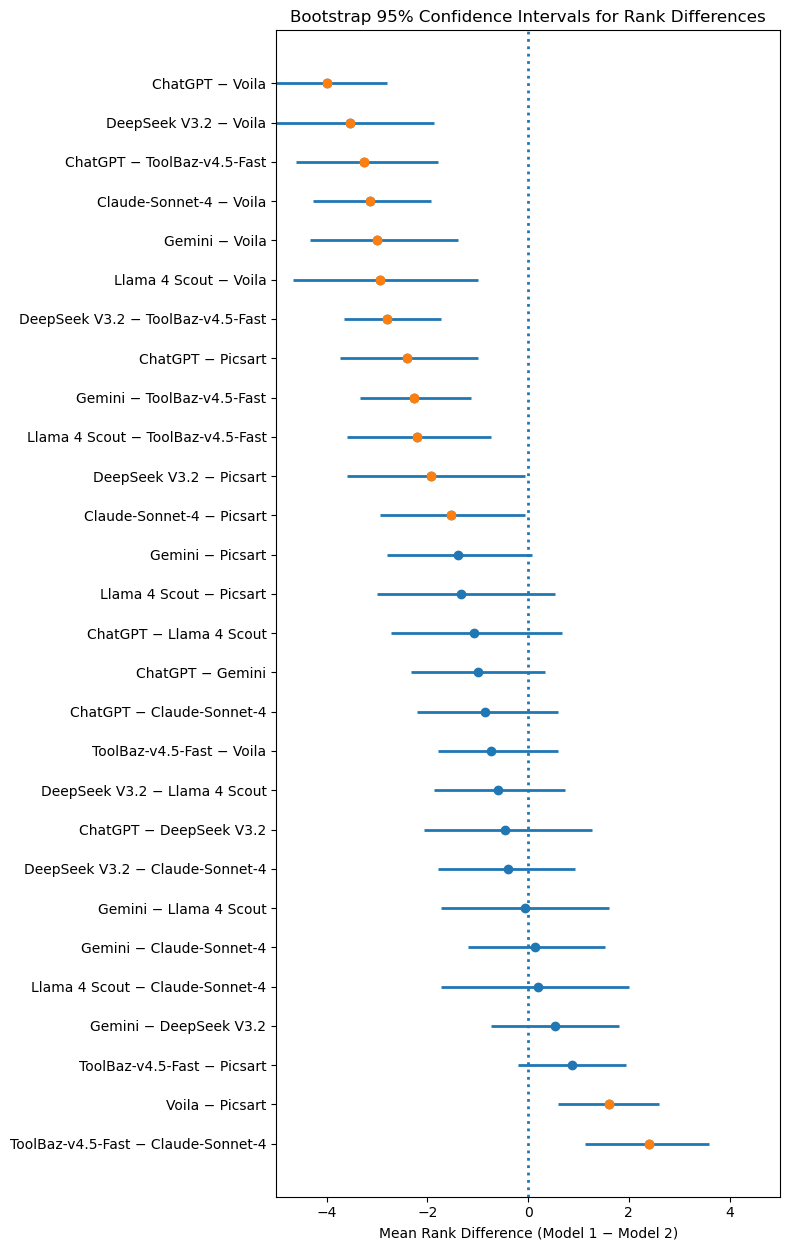

In [103]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

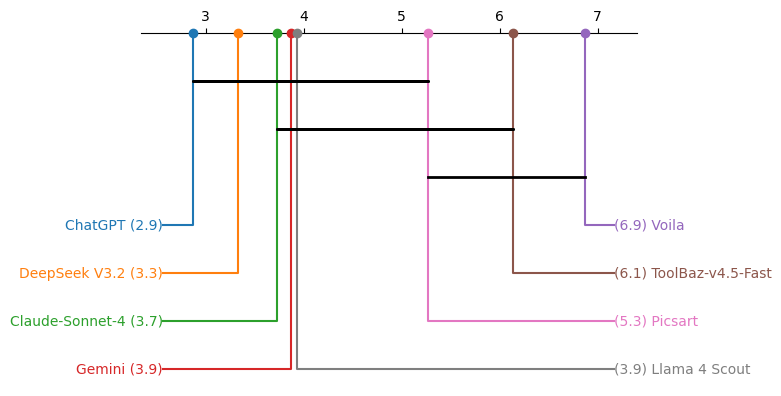

In [104]:
mean_ranks = text_gen_p3.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [105]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 1.000 1.000 1.000 -     -     -     -    
5 0.103 0.143 0.075 0.580 -     -     -    
6 1.000 1.000 1.000 1.000 0.171 -     -    
7 0.029 0.172 0.113 0.398 1.000 0.052 -    
8 0.307 1.000 1.000 1.000 1.000 1.000 0.437

P value adjustment method: bonferroni 



### Prompt 4

In [106]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_p4

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 1
 2 1     Gemini                  3
 3 1     DeepSeek V3.2           4
 4 1     Llama 4 Scout           2
 5 1     ToolBaz-v4.5-Fast       7
 6 1     Claude-Sonnet-4         6
 7 1     Voila                   8
 8 1     Picsart                 5
 9 2     ChatGPT                 1
10 2     Gemini                  2
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 24.133, df = 7, p-value = 0.001079


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2298413 Kendall W     small



In [107]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.0010794636734476441 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [108]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_p4.values)

nemenyi.index = text_gen_p4.columns
nemenyi.columns = text_gen_p4.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             1.000000   
Gemini                        1.000000             1.000000   
DeepSeek V3.2                 0.473267             0.524526   
Llama 4 Scout                 0.999555             0.999841   
ToolBaz-v4.5-Fast             0.105844             0.127582   
Claude-Sonnet-4               0.934317             0.953114   
Voila                         0.006335             0.008322   
Picsart                       0.473267             0.524526   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.473267             0.999555   
Gemini                        0.524526             0.999841   
DeepSeek V3.2                 1.000000             0.812765   
Llama 4 Scout                 0.812765             1.000000   
ToolBaz-v4.5-Fast             0.995581             0.329953   
Claude-Sonnet-4               0.992063             0.997723   
Voila                         0.726028             0.037098   
Picsart                       1.000000             0.812765   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.105844             0.934317   
Gemini                        0.127582             0.953114   
DeepSeek V3.2                 0.995581             0.992063   
Llama 4 Scout                 0.329953             0.997723   
ToolBaz-v4.5-Fast             1.000000             0.771209   
Claude-Sonnet-4               0.771209             1.000000   
Voila                         0.986645             0.212961   
Picsart                       0.995581             0.992063   

                                 Voila              Picsart  
ChatGPT                       0.006335             0.473267  
Gemini                        0.008322             0.524526  
DeepSeek V3.2                 0.726028             1.000000  
Llama 4 Scout                 0.037098             0.812765  
ToolBaz-v4.5-Fast             0.986645             0.995581  
Claude-Sonnet-4               0.212961             0.992063  
Voila                         1.000000             0.726028  
Picsart                       0.726028             1.000000

In [109]:
ranks = text_gen_p4.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  1.000000            -0.066667   
1             ChatGPT      DeepSeek V3.2  0.473267            -1.800000   
2             ChatGPT      Llama 4 Scout  0.999555            -0.466667   
3             ChatGPT  ToolBaz-v4.5-Fast  0.105844            -2.466667   
4             ChatGPT    Claude-Sonnet-4  0.934317            -1.066667   
5             ChatGPT              Voila  0.006335            -3.266667   
6             ChatGPT            Picsart  0.473267            -1.800000   
7              Gemini      DeepSeek V3.2  0.524526            -1.733333   
8              Gemini      Llama 4 Scout  0.999841            -0.400000   
9              Gemini  ToolBaz-v4.5-Fast  0.127582            -2.400000   
10             Gemini    Claude-Sonnet-4  0.953114            -1.000000   
11             Gemini              Voila  0.008322            -3.200000   
12             Gemini            Picsart  0.524526            -1.733333   
13      DeepSeek V3.2      Llama 4 Scout  0.812765             1.333333   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.995581            -0.666667   
15      DeepSeek V3.2    Claude-Sonnet-4  0.992063             0.733333   
16      DeepSeek V3.2              Voila  0.726028            -1.466667   
17      DeepSeek V3.2            Picsart  1.000000             0.000000   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.329953            -2.000000   
19      Llama 4 Scout    Claude-Sonnet-4  0.997723            -0.600000   
20      Llama 4 Scout              Voila  0.037098            -2.800000   
21      Llama 4 Scout            Picsart  0.812765            -1.333333   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.771209             1.400000   
23  ToolBaz-v4.5-Fast              Voila  0.986645            -0.800000   
24  ToolBaz-v4.5-Fast            Picsart  0.995581             0.666667   
25    Claude-Sonnet-4              Voila  0.212961            -2.200000   
26    Claude-Sonnet-4            Picsart  0.992063            -0.733333   
27              Voila            Picsart  0.726028             1.466667   

               CI_lower             CI_upper  
0             -1.000000             0.933333  
1             -3.133333            -0.466667  
2             -1.466667             0.533333  
3             -4.333333            -0.400000  
4             -2.866667             0.866667  
5             -5.066667            -1.200000  
6             -3.466667             0.000000  
7             -2.800000            -0.600000  
8             -1.600000             0.733333  
9             -3.733333            -0.866667  
10            -2.466667             0.466667  
11            -4.600000            -1.600000  
12            -2.933333            -0.466667  
13             0.266667             2.200000  
14            -1.866667             0.666667  
15            -0.933333             2.333333  
16            -2.933333             0.133333  
17            -1.466667             1.666667  
18            -3.933333             0.200000  
19            -2.666667             1.533333  
20            -4.866667            -0.600000  
21            -3.266667             0.800000  
22             0.333333             2.533333  
23            -1.600000             0.066667  
24            -0.466667             1.733333  
25            -3.666667            -0.733333  
26            -2.266667             0.733333  
27             0.200000             2.666667

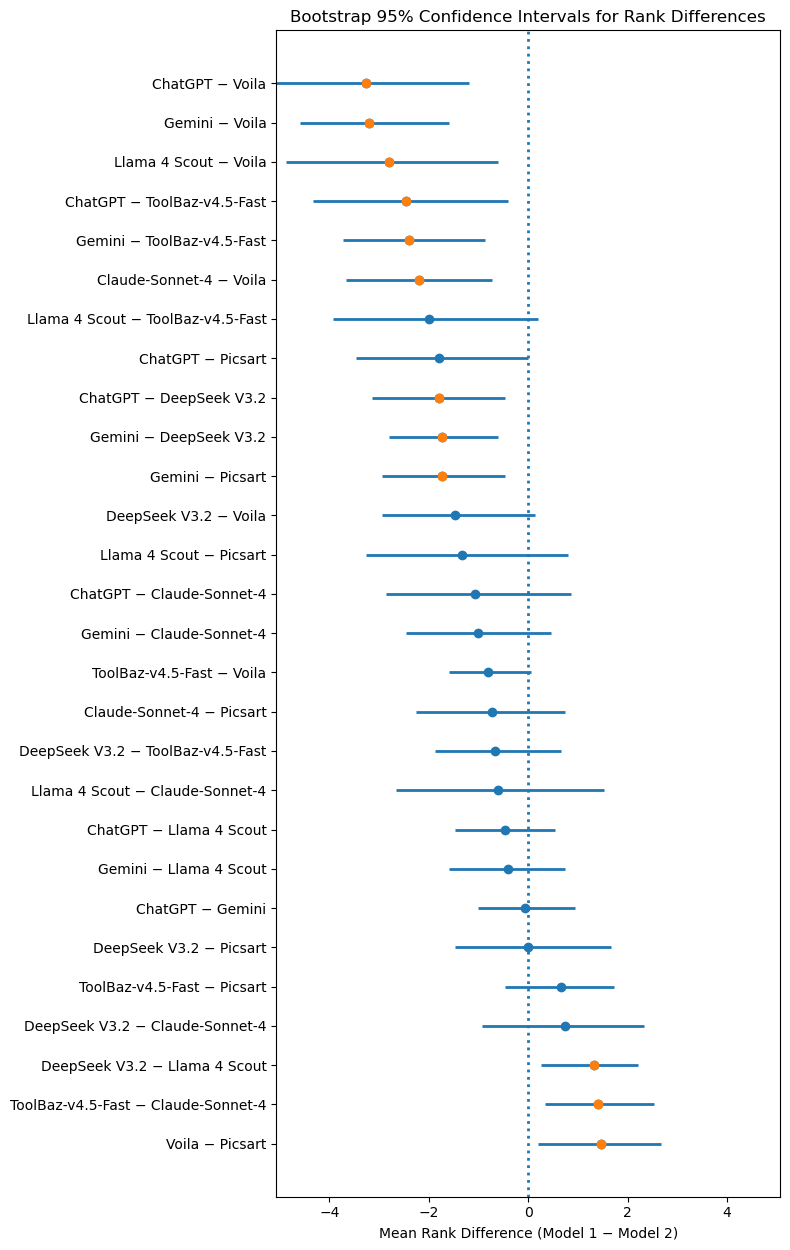

In [110]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

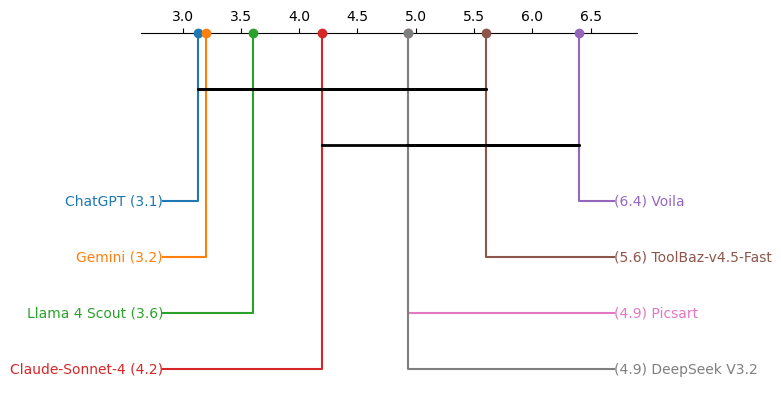

In [111]:
mean_ranks = text_gen_p4.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [112]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1    2    3    4    5    6    7   
2 1.00 -    -    -    -    -    -   
3 0.78 0.45 -    -    -    -    -   
4 1.00 1.00 0.71 -    -    -    -   
5 1.00 0.46 1.00 1.00 -    -    -   
6 1.00 1.00 1.00 1.00 1.00 -    -   
7 0.68 0.19 1.00 1.00 1.00 0.72 -   
8 1.00 0.69 1.00 1.00 1.00 1.00 1.00

P value adjustment method: bonferroni 



### Mean score for all prompts

In [30]:
text_gen_mean = text_gen_mean.astype(float)
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_mean

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT              1.25
 2 1     Gemini               4.25
 3 1     DeepSeek V3.2        4.25
 4 1     Llama 4 Scout        5.75
 5 1     ToolBaz-v4.5-Fast    6.75
 6 1     Claude-Sonnet-4      5.25
 7 1     Voila                5.75
 8 1     Picsart              2.75
 9 2     ChatGPT              1   
10 2     Gemini               5.5 
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 40.409, df = 7, p-value = 1.051e-06


      .y.  n   effsize    method magnitude
1 Ranking 15 0.3848436 Kendall W  moderate



In [114]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 1.0512528604251856e-06 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [115]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_mean.values)

nemenyi.index = text_gen_mean.columns
nemenyi.columns = text_gen_mean.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.771209   
Gemini                        0.771209             1.000000   
DeepSeek V3.2                 0.627730             0.999999   
Llama 4 Scout                 0.037098             0.771209   
ToolBaz-v4.5-Fast             0.000042             0.026136   
Claude-Sonnet-4               0.771209             1.000000   
Voila                         0.000035             0.023174   
Picsart                       0.078823             0.897566   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.627730             0.037098   
Gemini                        0.999999             0.771209   
DeepSeek V3.2                 1.000000             0.882942   
Llama 4 Scout                 0.882942             1.000000   
ToolBaz-v4.5-Fast             0.051813             0.702295   
Claude-Sonnet-4               0.999999             0.771209   
Voila                         0.046437             0.677930   
Picsart                       0.960926             0.999996   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.000042             0.771209   
Gemini                        0.026136             1.000000   
DeepSeek V3.2                 0.051813             0.999999   
Llama 4 Scout                 0.702295             0.771209   
ToolBaz-v4.5-Fast             1.000000             0.026136   
Claude-Sonnet-4               0.026136             1.000000   
Voila                         1.000000             0.023174   
Picsart                       0.524526             0.897566   

                                 Voila              Picsart  
ChatGPT                       0.000035             0.078823  
Gemini                        0.023174             0.897566  
DeepSeek V3.2                 0.046437             0.960926  
Llama 4 Scout                 0.677930             0.999996  
ToolBaz-v4.5-Fast             1.000000             0.524526  
Claude-Sonnet-4               0.023174             0.897566  
Voila                         1.000000             0.498781  
Picsart                       0.498781             1.000000

In [116]:
ranks = text_gen_mean.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.771209            -1.400000   
1             ChatGPT      DeepSeek V3.2  0.627730            -1.600000   
2             ChatGPT      Llama 4 Scout  0.037098            -2.800000   
3             ChatGPT  ToolBaz-v4.5-Fast  0.000042            -4.300000   
4             ChatGPT    Claude-Sonnet-4  0.771209            -1.400000   
5             ChatGPT              Voila  0.000035            -4.333333   
6             ChatGPT            Picsart  0.078823            -2.566667   
7              Gemini      DeepSeek V3.2  0.999999            -0.200000   
8              Gemini      Llama 4 Scout  0.771209            -1.400000   
9              Gemini  ToolBaz-v4.5-Fast  0.026136            -2.900000   
10             Gemini    Claude-Sonnet-4  1.000000             0.000000   
11             Gemini              Voila  0.023174            -2.933333   
12             Gemini            Picsart  0.897566            -1.166667   
13      DeepSeek V3.2      Llama 4 Scout  0.882942            -1.200000   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.051813            -2.700000   
15      DeepSeek V3.2    Claude-Sonnet-4  0.999999             0.200000   
16      DeepSeek V3.2              Voila  0.046437            -2.733333   
17      DeepSeek V3.2            Picsart  0.960926            -0.966667   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.702295            -1.500000   
19      Llama 4 Scout    Claude-Sonnet-4  0.771209             1.400000   
20      Llama 4 Scout              Voila  0.677930            -1.533333   
21      Llama 4 Scout            Picsart  0.999996             0.233333   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.026136             2.900000   
23  ToolBaz-v4.5-Fast              Voila  1.000000            -0.033333   
24  ToolBaz-v4.5-Fast            Picsart  0.524526             1.733333   
25    Claude-Sonnet-4              Voila  0.023174            -2.933333   
26    Claude-Sonnet-4            Picsart  0.897566            -1.166667   
27              Voila            Picsart  0.498781             1.766667   

               CI_lower             CI_upper  
0             -2.666667             0.166667  
1             -3.100000             0.066667  
2             -4.033333            -1.433333  
3             -5.266667            -3.200000  
4             -2.833333             0.033333  
5             -5.633333            -2.732500  
6             -3.866667            -1.100000  
7             -1.566667             1.133333  
8             -3.000000             0.366667  
9             -4.066667            -1.566667  
10            -1.500000             1.533333  
11            -4.200000            -1.599167  
12            -2.300000             0.200000  
13            -2.633333             0.233333  
14            -3.900000            -1.333333  
15            -1.200000             1.533333  
16            -3.933333            -1.433333  
17            -2.133333             0.300000  
18            -2.600000            -0.500000  
19            -0.100000             2.833333  
20            -2.900000            -0.066667  
21            -1.466667             1.900000  
22             1.600000             4.133333  
23            -1.166667             1.200000  
24             0.466667             2.966667  
25            -4.100000            -1.733333  
26            -2.600833             0.300000  
27             0.366667             3.166667

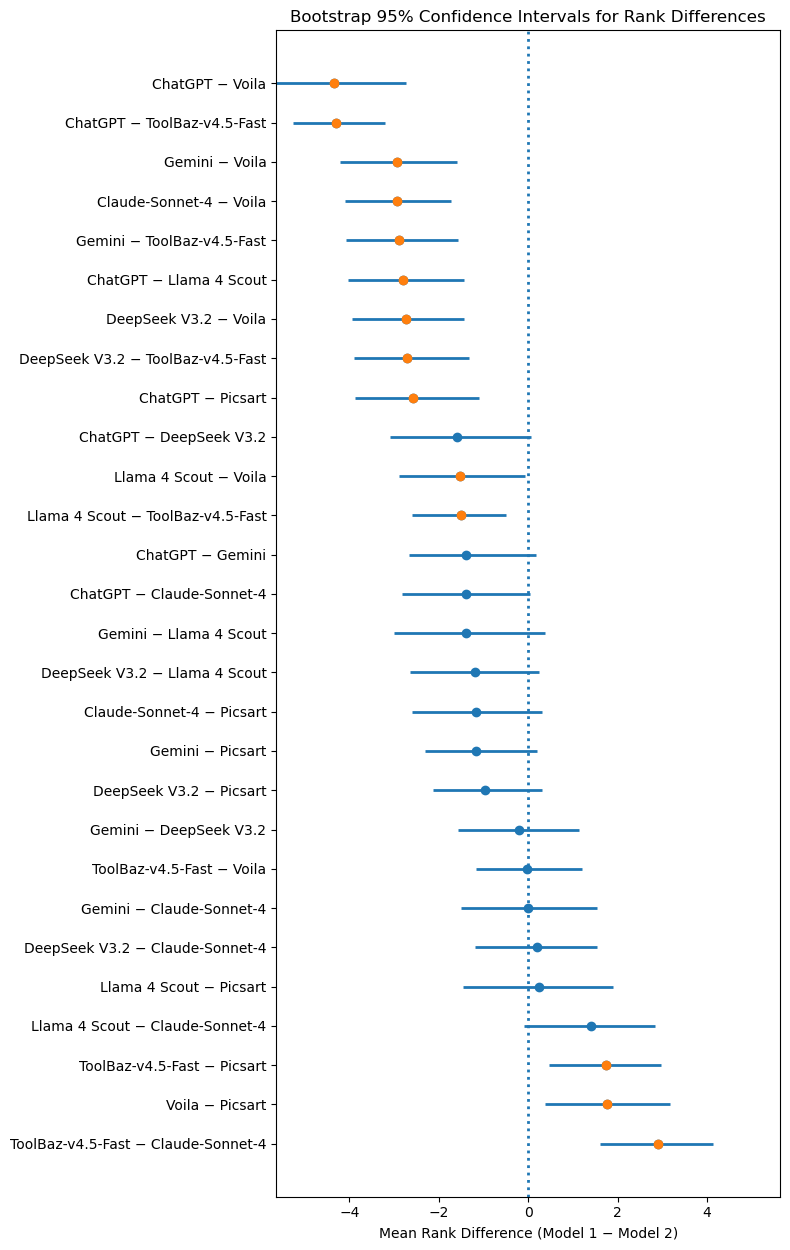

In [117]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

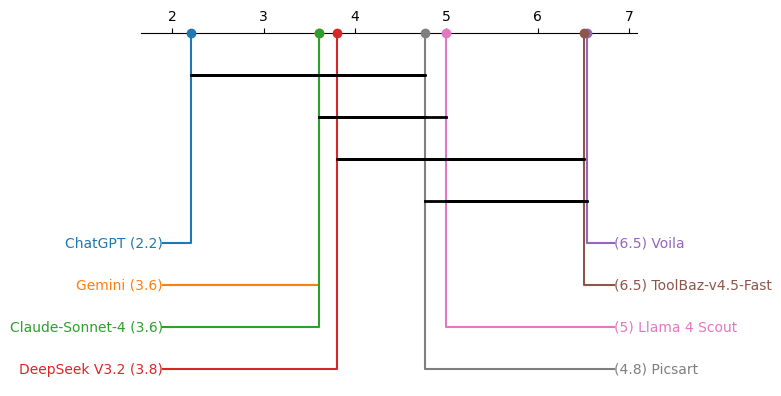

In [118]:
mean_ranks = text_gen_mean.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [119]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.073 0.609 1.000 -     -     -     -    
5 0.025 0.054 0.159 1.000 -     -     -    
6 1.000 1.000 1.000 1.000 0.058 -     -    
7 0.030 0.088 0.124 1.000 1.000 0.055 -    
8 0.088 0.838 1.000 1.000 0.466 1.000 0.476

P value adjustment method: bonferroni 



## Text using image as guide

In [120]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_text_from_image

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method  Ranking
   <fct> <chr>     <dbl>
 1 1     ChatGPT       2
 2 1     Gemini        1
 3 1     Voila         3
 4 2     ChatGPT       1
 5 2     Gemini        2
 6 2     Voila         3
 7 3     ChatGPT       1
 8 3     Gemini        2
 9 3     Voila         3
10 4     ChatGPT       3
# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 11.2, df = 2, p-value = 0.003698


      .y.  n   effsize    method magnitude
1 Ranking 15 0.3733333 Kendall W  moderate



In [121]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.003697863716482932 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [122]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_text_from_image.values)

nemenyi.index = text_gen_text_from_image.columns
nemenyi.columns = text_gen_text_from_image.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini                Voila
ChatGPT             1.000000             0.516881             0.002916
Gemini              0.516881             1.000000             0.072717
Voila               0.002916             0.072717             1.000000

In [123]:
ranks = text_gen_text_from_image.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1 Model_2   p_value       Mean rank diff             CI_lower  \
0  ChatGPT  Gemini  0.516881            -0.400000            -1.000000   
1  ChatGPT   Voila  0.002916            -1.200000            -1.666667   
2   Gemini   Voila  0.072717            -0.800000            -1.333333   

              CI_upper  
0             0.266667  
1            -0.666667  
2            -0.200000

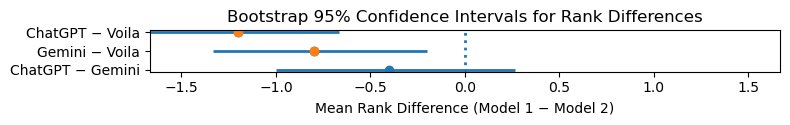

In [124]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

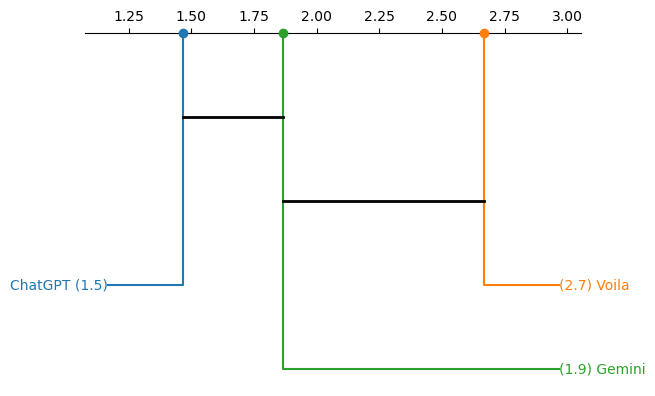

In [125]:
mean_ranks = text_gen_text_from_image.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [126]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2     
2 0.7157 -     
3 0.0094 0.1083

P value adjustment method: bonferroni 



## Text Quiz

### Prompt 1

In [127]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_quiz_p1

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 4
 2 1     Gemini                  8
 3 1     DeepSeek V3.2           1
 4 1     Llama 4 Scout           2
 5 1     ToolBaz-v4.5-Fast       5
 6 1     Claude-Sonnet-4         3
 7 1     Voila                   7
 8 1     Picsart                 6
 9 2     ChatGPT                 1
10 2     Gemini                  4
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 44.756, df = 7, p-value = 1.525e-07


      .y.  n   effsize    method magnitude
1 Ranking 15 0.4262434 Kendall W  moderate



In [128]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 1.5254380226428165e-07 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [129]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_quiz_p1.values)

nemenyi.index = text_gen_quiz_p1.columns
nemenyi.columns = text_gen_quiz_p1.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.997723   
Gemini                        0.997723             1.000000   
DeepSeek V3.2                 1.000000             0.998932   
Llama 4 Scout                 0.473267             0.882942   
ToolBaz-v4.5-Fast             0.287570             0.726028   
Claude-Sonnet-4               0.934317             0.999555   
Voila                         0.000147             0.002689   
Picsart                       0.000293             0.004792   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       1.000000             0.473267   
Gemini                        0.998932             0.882942   
DeepSeek V3.2                 1.000000             0.524526   
Llama 4 Scout                 0.524526             1.000000   
ToolBaz-v4.5-Fast             0.329953             0.999990   
Claude-Sonnet-4               0.953114             0.992063   
Voila                         0.000208             0.180992   
Picsart                       0.000409             0.248511   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.287570             0.934317   
Gemini                        0.726028             0.999555   
DeepSeek V3.2                 0.329953             0.953114   
Llama 4 Scout                 0.999990             0.992063   
ToolBaz-v4.5-Fast             1.000000             0.953114   
Claude-Sonnet-4               0.953114             1.000000   
Voila                         0.329953             0.018124   
Picsart                       0.423311             0.029425   

                                 Voila              Picsart  
ChatGPT                       0.000147             0.000293  
Gemini                        0.002689             0.004792  
DeepSeek V3.2                 0.000208             0.000409  
Llama 4 Scout                 0.180992             0.248511  
ToolBaz-v4.5-Fast             0.329953             0.423311  
Claude-Sonnet-4               0.018124             0.029425  
Voila                         1.000000             1.000000  
Picsart                       1.000000             1.000000

In [130]:
ranks = text_gen_quiz_p1.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.997723            -0.600000   
1             ChatGPT      DeepSeek V3.2  1.000000            -0.066667   
2             ChatGPT      Llama 4 Scout  0.473267            -1.800000   
3             ChatGPT  ToolBaz-v4.5-Fast  0.287570            -2.066667   
4             ChatGPT    Claude-Sonnet-4  0.934317            -1.066667   
5             ChatGPT              Voila  0.000147            -4.066667   
6             ChatGPT            Picsart  0.000293            -3.933333   
7              Gemini      DeepSeek V3.2  0.998932             0.533333   
8              Gemini      Llama 4 Scout  0.882942            -1.200000   
9              Gemini  ToolBaz-v4.5-Fast  0.726028            -1.466667   
10             Gemini    Claude-Sonnet-4  0.999555            -0.466667   
11             Gemini              Voila  0.002689            -3.466667   
12             Gemini            Picsart  0.004792            -3.333333   
13      DeepSeek V3.2      Llama 4 Scout  0.524526            -1.733333   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.329953            -2.000000   
15      DeepSeek V3.2    Claude-Sonnet-4  0.953114            -1.000000   
16      DeepSeek V3.2              Voila  0.000208            -4.000000   
17      DeepSeek V3.2            Picsart  0.000409            -3.866667   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.999990            -0.266667   
19      Llama 4 Scout    Claude-Sonnet-4  0.992063             0.733333   
20      Llama 4 Scout              Voila  0.180992            -2.266667   
21      Llama 4 Scout            Picsart  0.248511            -2.133333   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.953114             1.000000   
23  ToolBaz-v4.5-Fast              Voila  0.329953            -2.000000   
24  ToolBaz-v4.5-Fast            Picsart  0.423311            -1.866667   
25    Claude-Sonnet-4              Voila  0.018124            -3.000000   
26    Claude-Sonnet-4            Picsart  0.029425            -2.866667   
27              Voila            Picsart  1.000000             0.133333   

               CI_lower             CI_upper  
0             -2.200000             1.133333  
1             -1.733333             1.666667  
2             -3.000000            -0.533333  
3             -3.600000            -0.533333  
4             -2.133333             0.200000  
5             -5.400000            -2.533333  
6             -5.333333            -2.133333  
7             -0.733333             1.933333  
8             -2.733333             0.533333  
9             -2.800000             0.066667  
10            -2.066667             1.200000  
11            -4.733333            -2.000000  
12            -5.000000            -1.600000  
13            -2.733333            -0.598333  
14            -3.066667            -0.933333  
15            -2.266667             0.400000  
16            -5.000000            -2.800000  
17            -4.933333            -2.600000  
18            -1.600000             1.066667  
19            -0.066667             1.533333  
20            -3.266667            -1.200000  
21            -2.933333            -1.066667  
22            -0.600000             2.533333  
23            -3.333333            -0.600000  
24            -3.333333            -0.266667  
25            -4.000000            -1.866667  
26            -3.600000            -2.066667  
27            -0.733333             1.000000

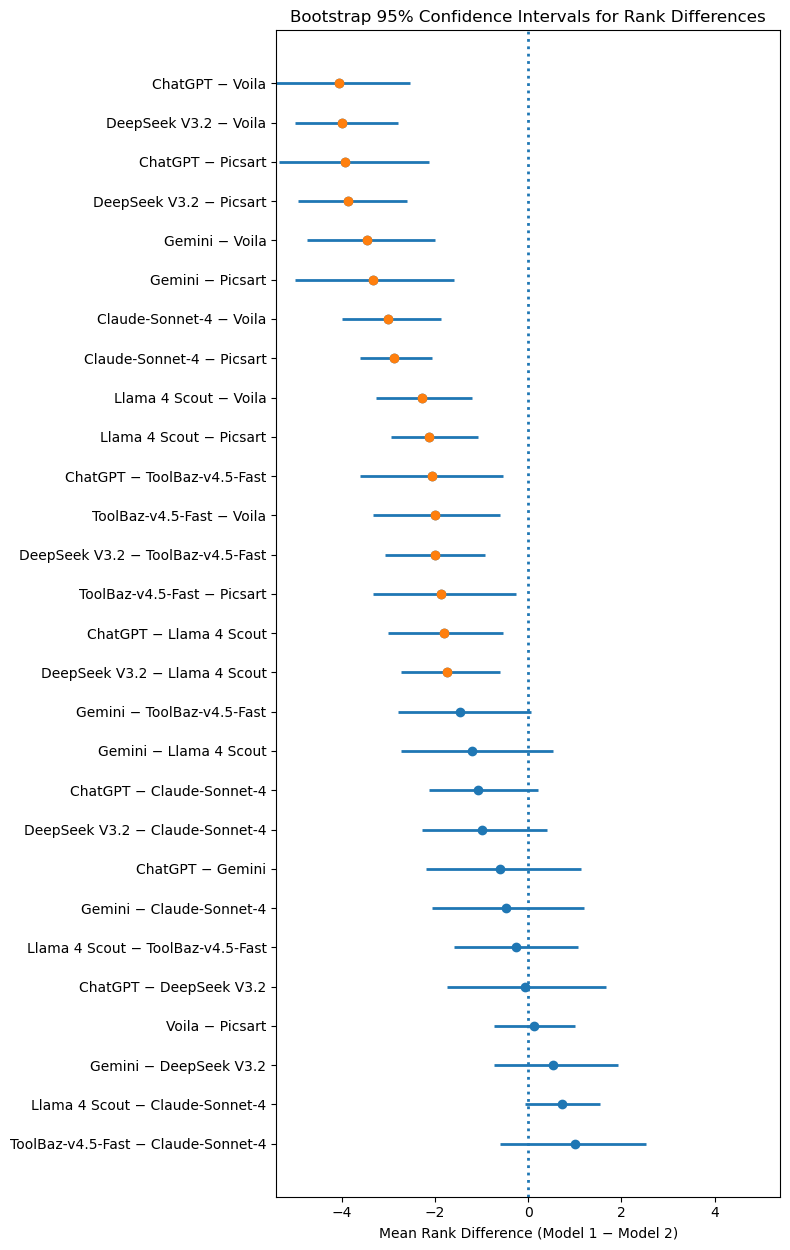

In [131]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

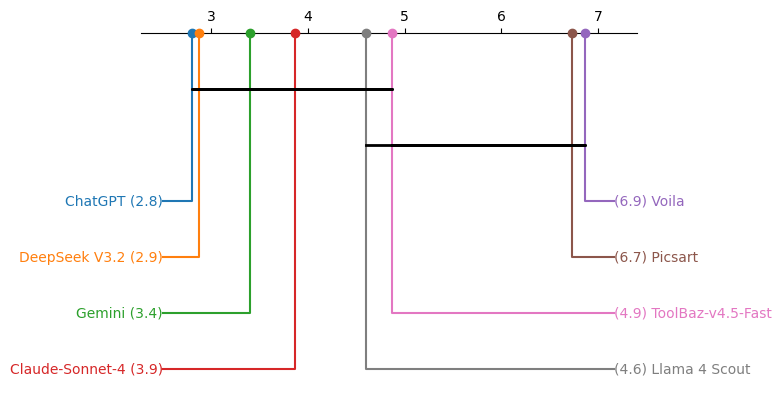

In [132]:
mean_ranks = text_gen_quiz_p1.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [133]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.727 1.000 0.868 -     -     -     -    
5 0.903 1.000 0.199 1.000 -     -     -    
6 1.000 1.000 1.000 1.000 1.000 -     -    
7 0.053 0.078 0.029 0.110 0.538 0.088 -    
8 0.146 0.314 0.041 0.225 1.000 0.024 1.000

P value adjustment method: bonferroni 



### Prompt 2

In [134]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_quiz_p2

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 2
 2 1     Gemini                  7
 3 1     DeepSeek V3.2           3
 4 1     Llama 4 Scout           6
 5 1     ToolBaz-v4.5-Fast       1
 6 1     Claude-Sonnet-4         4
 7 1     Voila                   8
 8 1     Picsart                 5
 9 2     ChatGPT                 1
10 2     Gemini                  3
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 35.622, df = 7, p-value = 8.541e-06


      .y.  n   effsize    method magnitude
1 Ranking 15 0.3392593 Kendall W  moderate



In [135]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 8.541363600074511e-06 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [136]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_quiz_p2.values)

nemenyi.index = text_gen_quiz_p2.columns
nemenyi.columns = text_gen_quiz_p2.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.910996   
Gemini                        0.910996             1.000000   
DeepSeek V3.2                 0.992063             0.999841   
Llama 4 Scout                 0.934317             1.000000   
ToolBaz-v4.5-Fast             0.524526             0.997723   
Claude-Sonnet-4               0.008322             0.287570   
Voila                         0.001995             0.127582   
Picsart                       0.000569             0.057704   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.992063             0.934317   
Gemini                        0.999841             1.000000   
DeepSeek V3.2                 1.000000             0.999954   
Llama 4 Scout                 0.999954             1.000000   
ToolBaz-v4.5-Fast             0.953114             0.995581   
Claude-Sonnet-4               0.105844             0.248511   
Voila                         0.037098             0.105844   
Picsart                       0.014077             0.046437   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.524526             0.008322   
Gemini                        0.997723             0.287570   
DeepSeek V3.2                 0.953114             0.105844   
Llama 4 Scout                 0.995581             0.248511   
ToolBaz-v4.5-Fast             1.000000             0.726028   
Claude-Sonnet-4               0.726028             1.000000   
Voila                         0.473267             0.999954   
Picsart                       0.287570             0.997723   

                                 Voila              Picsart  
ChatGPT                       0.001995             0.000569  
Gemini                        0.127582             0.057704  
DeepSeek V3.2                 0.037098             0.014077  
Llama 4 Scout                 0.105844             0.046437  
ToolBaz-v4.5-Fast             0.473267             0.287570  
Claude-Sonnet-4               0.999954             0.997723  
Voila                         1.000000             0.999990  
Picsart                       0.999990             1.000000

In [137]:
ranks = text_gen_quiz_p2.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.910996            -1.133333   
1             ChatGPT      DeepSeek V3.2  0.992063            -0.733333   
2             ChatGPT      Llama 4 Scout  0.934317            -1.066667   
3             ChatGPT  ToolBaz-v4.5-Fast  0.524526            -1.733333   
4             ChatGPT    Claude-Sonnet-4  0.008322            -3.200000   
5             ChatGPT              Voila  0.001995            -3.533333   
6             ChatGPT            Picsart  0.000569            -3.800000   
7              Gemini      DeepSeek V3.2  0.999841             0.400000   
8              Gemini      Llama 4 Scout  1.000000             0.066667   
9              Gemini  ToolBaz-v4.5-Fast  0.997723            -0.600000   
10             Gemini    Claude-Sonnet-4  0.287570            -2.066667   
11             Gemini              Voila  0.127582            -2.400000   
12             Gemini            Picsart  0.057704            -2.666667   
13      DeepSeek V3.2      Llama 4 Scout  0.999954            -0.333333   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.953114            -1.000000   
15      DeepSeek V3.2    Claude-Sonnet-4  0.105844            -2.466667   
16      DeepSeek V3.2              Voila  0.037098            -2.800000   
17      DeepSeek V3.2            Picsart  0.014077            -3.066667   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.995581            -0.666667   
19      Llama 4 Scout    Claude-Sonnet-4  0.248511            -2.133333   
20      Llama 4 Scout              Voila  0.105844            -2.466667   
21      Llama 4 Scout            Picsart  0.046437            -2.733333   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.726028            -1.466667   
23  ToolBaz-v4.5-Fast              Voila  0.473267            -1.800000   
24  ToolBaz-v4.5-Fast            Picsart  0.287570            -2.066667   
25    Claude-Sonnet-4              Voila  0.999954            -0.333333   
26    Claude-Sonnet-4            Picsart  0.997723            -0.600000   
27              Voila            Picsart  0.999990            -0.266667   

               CI_lower             CI_upper  
0             -2.533333             0.266667  
1             -2.133333             0.800000  
2             -2.533333             0.466667  
3             -3.533333             0.133333  
4             -4.200000            -2.133333  
5             -4.733333            -2.266667  
6             -4.866667            -2.533333  
7             -0.866667             1.666667  
8             -1.400000             1.600000  
9             -2.066667             1.000000  
10            -3.466667            -0.466667  
11            -4.133333            -0.400000  
12            -4.066667            -1.200000  
13            -1.400000             0.733333  
14            -2.133333             0.200000  
15            -3.666667            -1.066667  
16            -4.400000            -1.066667  
17            -4.133333            -1.866667  
18            -2.000000             0.733333  
19            -3.333333            -0.733333  
20            -3.800000            -1.133333  
21            -3.933333            -1.333333  
22            -2.933333             0.200000  
23            -3.733333             0.266667  
24            -3.466667            -0.666667  
25            -1.800000             1.266667  
26            -1.266667             0.133333  
27            -1.800000             1.266667

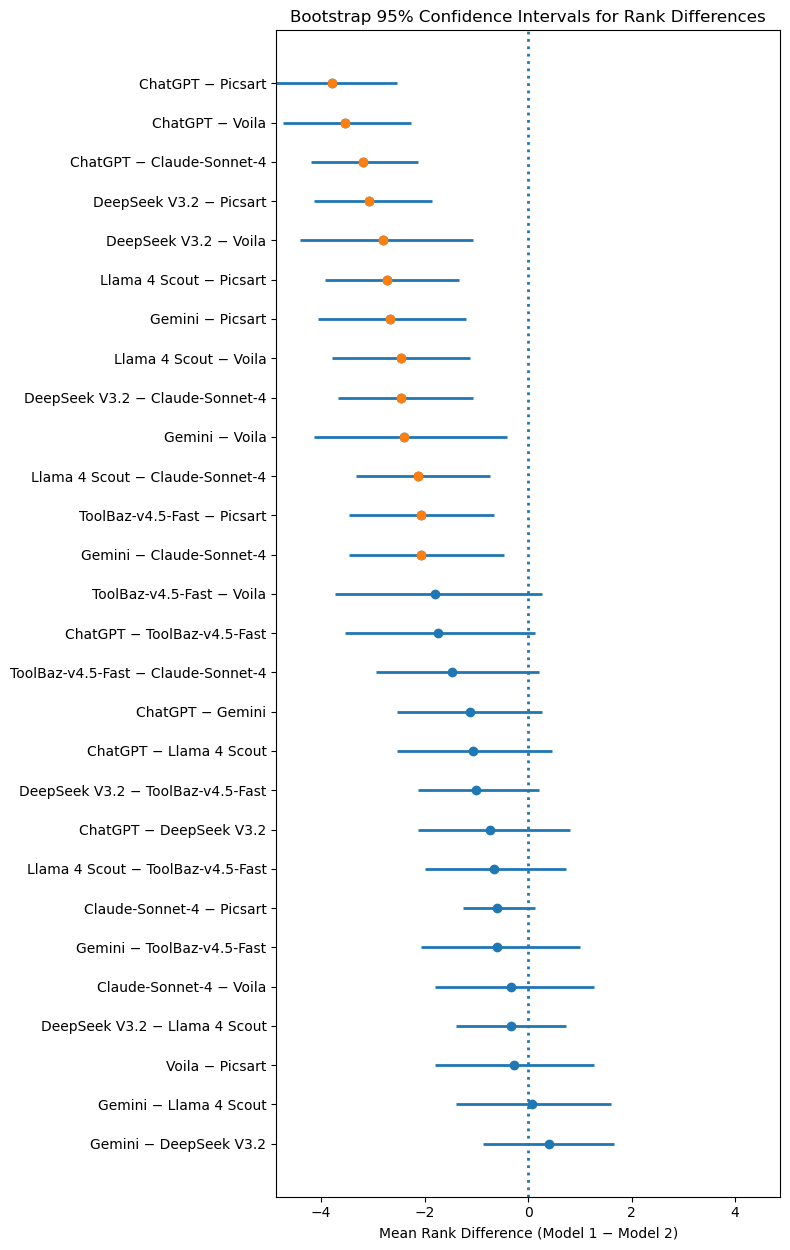

In [138]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

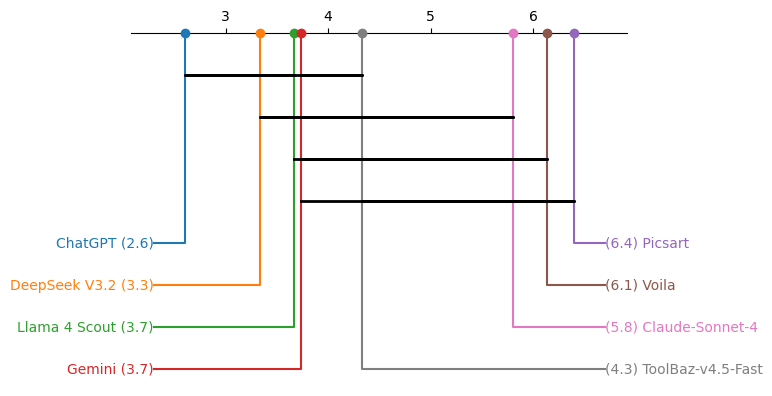

In [139]:
mean_ranks = text_gen_quiz_p2.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [140]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 1.000 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 1.000 1.000 1.000 -     -     -     -    
5 1.000 1.000 1.000 1.000 -     -     -    
6 0.031 0.909 0.206 0.308 1.000 -     -    
7 0.044 1.000 0.309 0.263 1.000 1.000 -    
8 0.032 0.148 0.053 0.134 0.627 1.000 1.000

P value adjustment method: bonferroni 



### Prompt 3

In [141]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_quiz_p3

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT                 1
 2 1     Gemini                  2
 3 1     DeepSeek V3.2           6
 4 1     Llama 4 Scout           4
 5 1     ToolBaz-v4.5-Fast       5
 6 1     Claude-Sonnet-4         3
 7 1     Voila                   7
 8 1     Picsart                 8
 9 2     ChatGPT                 1
10 2     Gemini                  2
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 46.422, df = 7, p-value = 7.235e-08


      .y.  n   effsize    method magnitude
1 Ranking 15 0.4421164 Kendall W  moderate



In [142]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 7.234503322876109e-08 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [143]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_quiz_p3.values)

nemenyi.index = text_gen_quiz_p3.columns
nemenyi.columns = text_gen_quiz_p3.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.910996   
Gemini                        0.910996             1.000000   
DeepSeek V3.2                 0.627730             0.999555   
Llama 4 Scout                 0.212961             0.934317   
ToolBaz-v4.5-Fast             0.105844             0.812765   
Claude-Sonnet-4               0.329953             0.978743   
Voila                         0.001471             0.105844   
Picsart                       0.000000             0.000050   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.627730             0.212961   
Gemini                        0.999555             0.934317   
DeepSeek V3.2                 1.000000             0.997723   
Llama 4 Scout                 0.997723             1.000000   
ToolBaz-v4.5-Fast             0.978743             0.999990   
Claude-Sonnet-4               0.999841             0.999999   
Voila                         0.329953             0.771209   
Picsart                       0.000569             0.008322   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.105844             0.329953   
Gemini                        0.812765             0.978743   
DeepSeek V3.2                 0.978743             0.999841   
Llama 4 Scout                 0.999990             0.999999   
ToolBaz-v4.5-Fast             1.000000             0.999555   
Claude-Sonnet-4               0.999555             1.000000   
Voila                         0.910996             0.627730   
Picsart                       0.023174             0.003601   

                                 Voila              Picsart  
ChatGPT                       0.001471             0.000000  
Gemini                        0.105844             0.000050  
DeepSeek V3.2                 0.329953             0.000569  
Llama 4 Scout                 0.771209             0.008322  
ToolBaz-v4.5-Fast             0.910996             0.023174  
Claude-Sonnet-4               0.627730             0.003601  
Voila                         1.000000             0.473267  
Picsart                       0.473267             1.000000

In [144]:
ranks = text_gen_quiz_p3.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.910996            -1.133333   
1             ChatGPT      DeepSeek V3.2  0.627730            -1.600000   
2             ChatGPT      Llama 4 Scout  0.212961            -2.200000   
3             ChatGPT  ToolBaz-v4.5-Fast  0.105844            -2.466667   
4             ChatGPT    Claude-Sonnet-4  0.329953            -2.000000   
5             ChatGPT              Voila  0.001471            -3.600000   
6             ChatGPT            Picsart  0.000000            -5.400000   
7              Gemini      DeepSeek V3.2  0.999555            -0.466667   
8              Gemini      Llama 4 Scout  0.934317            -1.066667   
9              Gemini  ToolBaz-v4.5-Fast  0.812765            -1.333333   
10             Gemini    Claude-Sonnet-4  0.978743            -0.866667   
11             Gemini              Voila  0.105844            -2.466667   
12             Gemini            Picsart  0.000050            -4.266667   
13      DeepSeek V3.2      Llama 4 Scout  0.997723            -0.600000   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.978743            -0.866667   
15      DeepSeek V3.2    Claude-Sonnet-4  0.999841            -0.400000   
16      DeepSeek V3.2              Voila  0.329953            -2.000000   
17      DeepSeek V3.2            Picsart  0.000569            -3.800000   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.999990            -0.266667   
19      Llama 4 Scout    Claude-Sonnet-4  0.999999             0.200000   
20      Llama 4 Scout              Voila  0.771209            -1.400000   
21      Llama 4 Scout            Picsart  0.008322            -3.200000   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  0.999555             0.466667   
23  ToolBaz-v4.5-Fast              Voila  0.910996            -1.133333   
24  ToolBaz-v4.5-Fast            Picsart  0.023174            -2.933333   
25    Claude-Sonnet-4              Voila  0.627730            -1.600000   
26    Claude-Sonnet-4            Picsart  0.003601            -3.400000   
27              Voila            Picsart  0.473267            -1.800000   

               CI_lower             CI_upper  
0             -2.000000            -0.333333  
1             -3.133333             0.066667  
2             -3.466667            -0.933333  
3             -3.866667            -1.000000  
4             -3.000000            -1.000000  
5             -4.933333            -2.133333  
6             -6.200000            -4.666667  
7             -2.133333             1.333333  
8             -2.200000             0.066667  
9             -2.800000             0.266667  
10            -2.200000             0.466667  
11            -4.000000            -0.733333  
12            -5.066667            -3.400000  
13            -2.133333             1.066667  
14            -1.666667             0.000000  
15            -1.600000             0.800000  
16            -3.533333            -0.333333  
17            -5.000000            -2.533333  
18            -1.666667             1.133333  
19            -1.201667             1.600000  
20            -2.666667             0.000000  
21            -4.266667            -2.066667  
22            -0.466667             1.400000  
23            -2.466667             0.200000  
24            -3.933333            -1.933333  
25            -3.133333             0.133333  
26            -4.400000            -2.200000  
27            -2.933333            -0.800000

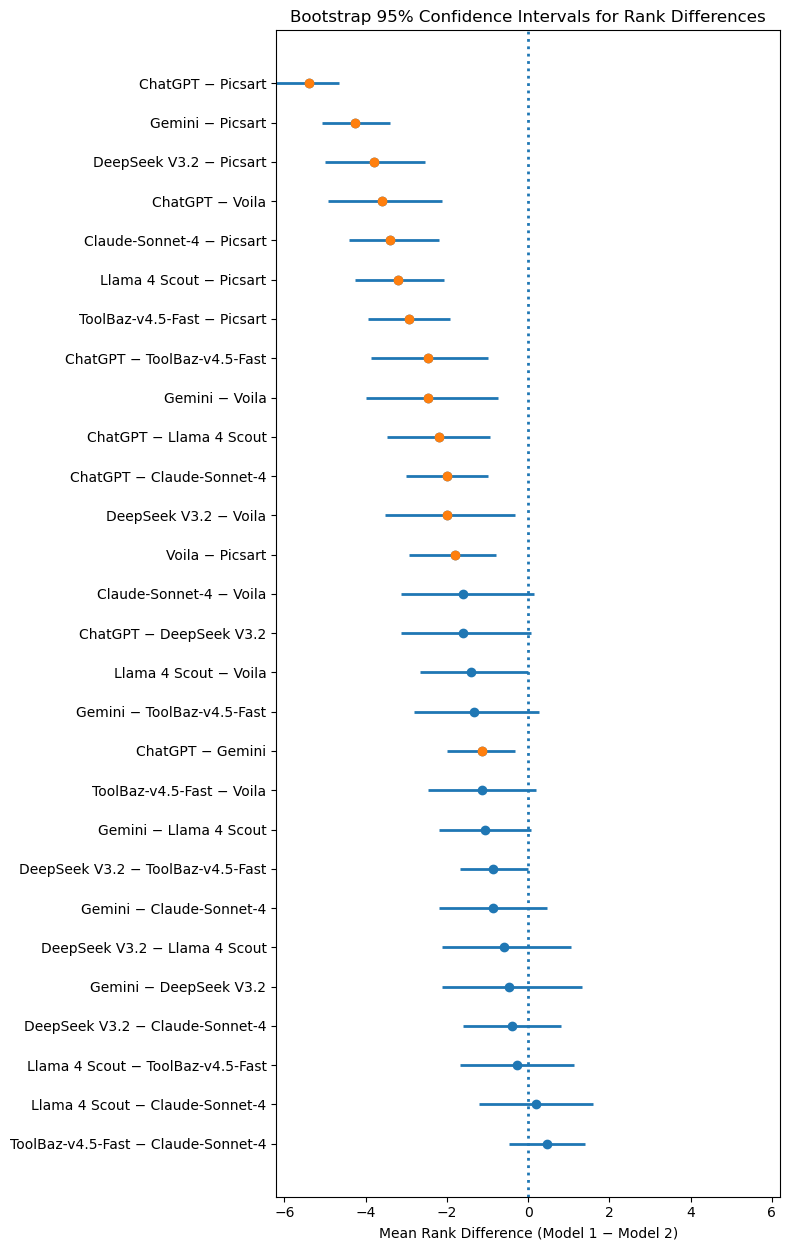

In [145]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

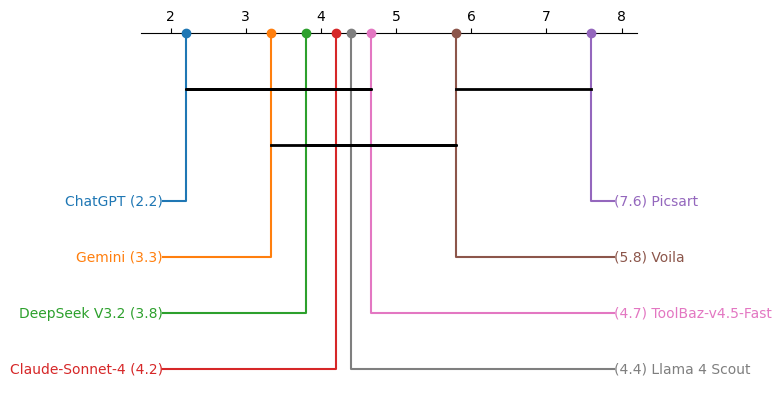

In [146]:
mean_ranks = text_gen_quiz_p3.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [147]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2     3     4     5     6     7    
2 0.745 -     -     -     -     -     -    
3 1.000 1.000 -     -     -     -     -    
4 0.363 1.000 1.000 -     -     -     -    
5 0.341 1.000 1.000 1.000 -     -     -    
6 0.126 1.000 1.000 1.000 1.000 -     -    
7 0.080 0.837 0.961 1.000 1.000 1.000 -    
8 0.016 0.019 0.030 0.044 0.046 0.052 0.122

P value adjustment method: bonferroni 



### Mean score for all prompts

In [31]:
text_gen_quiz_mean = text_gen_quiz_mean.astype(float)
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = text_gen_quiz_mean

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 120 x 3
   block method            Ranking
   <fct> <chr>               <dbl>
 1 1     ChatGPT              2.33
 2 1     Gemini               5.67
 3 1     DeepSeek V3.2        3.33
 4 1     Llama 4 Scout        4   
 5 1     ToolBaz-v4.5-Fast    3.67
 6 1     Claude-Sonnet-4      3.33
 7 1     Voila                7.33
 8 1     Picsart              6.33
 9 2     ChatGPT              1   
10 2     Gemini               3   
# i 110 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 61.808, df = 7, p-value = 6.568e-11


      .y.  n   effsize    method magnitude
1 Ranking 15 0.5886468 Kendall W     large



In [149]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 6.56788490779906e-11 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [150]:
nemenyi = sp.posthoc_nemenyi_friedman(text_gen_quiz_mean.values)

nemenyi.index = text_gen_quiz_mean.columns
nemenyi.columns = text_gen_quiz_mean.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


ChatGPT               Gemini  \
ChatGPT                       1.000000             0.882942   
Gemini                        0.882942             1.000000   
DeepSeek V3.2                 0.986645             0.999841   
Llama 4 Scout                 0.096125             0.832003   
ToolBaz-v4.5-Fast             0.015986             0.448080   
Claude-Sonnet-4               0.020511             0.498781   
Voila                         0.000007             0.003601   
Picsart                       0.000000             0.000060   

                         DeepSeek V3.2        Llama 4 Scout  \
ChatGPT                       0.986645             0.096125   
Gemini                        0.999841             0.832003   
DeepSeek V3.2                 1.000000             0.550401   
Llama 4 Scout                 0.550401             1.000000   
ToolBaz-v4.5-Fast             0.196529             0.998932   
Claude-Sonnet-4               0.230290             0.999555   
Voila                         0.000569             0.267610   
Picsart                       0.000006             0.023174   

                     ToolBaz-v4.5-Fast      Claude-Sonnet-4  \
ChatGPT                       0.015986             0.020511   
Gemini                        0.448080             0.498781   
DeepSeek V3.2                 0.196529             0.230290   
Llama 4 Scout                 0.998932             0.999555   
ToolBaz-v4.5-Fast             1.000000             1.000000   
Claude-Sonnet-4               1.000000             1.000000   
Voila                         0.653039             0.602113   
Picsart                       0.127582             0.105844   

                                 Voila              Picsart  
ChatGPT                       0.000007             0.000000  
Gemini                        0.003601             0.000060  
DeepSeek V3.2                 0.000569             0.000006  
Llama 4 Scout                 0.267610             0.023174  
ToolBaz-v4.5-Fast             0.653039             0.127582  
Claude-Sonnet-4               0.602113             0.105844  
Voila                         1.000000             0.983042  
Picsart                       0.983042             1.000000

In [151]:
ranks = text_gen_quiz_mean.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1            Model_2   p_value       Mean rank diff  \
0             ChatGPT             Gemini  0.882942            -1.200000   
1             ChatGPT      DeepSeek V3.2  0.986645            -0.800000   
2             ChatGPT      Llama 4 Scout  0.096125            -2.500000   
3             ChatGPT  ToolBaz-v4.5-Fast  0.015986            -3.033333   
4             ChatGPT    Claude-Sonnet-4  0.020511            -2.966667   
5             ChatGPT              Voila  0.000007            -4.600000   
6             ChatGPT            Picsart  0.000000            -5.433333   
7              Gemini      DeepSeek V3.2  0.999841             0.400000   
8              Gemini      Llama 4 Scout  0.832003            -1.300000   
9              Gemini  ToolBaz-v4.5-Fast  0.448080            -1.833333   
10             Gemini    Claude-Sonnet-4  0.498781            -1.766667   
11             Gemini              Voila  0.003601            -3.400000   
12             Gemini            Picsart  0.000060            -4.233333   
13      DeepSeek V3.2      Llama 4 Scout  0.550401            -1.700000   
14      DeepSeek V3.2  ToolBaz-v4.5-Fast  0.196529            -2.233333   
15      DeepSeek V3.2    Claude-Sonnet-4  0.230290            -2.166667   
16      DeepSeek V3.2              Voila  0.000569            -3.800000   
17      DeepSeek V3.2            Picsart  0.000006            -4.633333   
18      Llama 4 Scout  ToolBaz-v4.5-Fast  0.998932            -0.533333   
19      Llama 4 Scout    Claude-Sonnet-4  0.999555            -0.466667   
20      Llama 4 Scout              Voila  0.267610            -2.100000   
21      Llama 4 Scout            Picsart  0.023174            -2.933333   
22  ToolBaz-v4.5-Fast    Claude-Sonnet-4  1.000000             0.066667   
23  ToolBaz-v4.5-Fast              Voila  0.653039            -1.566667   
24  ToolBaz-v4.5-Fast            Picsart  0.127582            -2.400000   
25    Claude-Sonnet-4              Voila  0.602113            -1.633333   
26    Claude-Sonnet-4            Picsart  0.105844            -2.466667   
27              Voila            Picsart  0.983042            -0.833333   

               CI_lower             CI_upper  
0             -2.400000             0.000000  
1             -2.100000             0.533333  
2             -3.234167            -1.633333  
3             -4.200000            -1.833333  
4             -3.833333            -2.166667  
5             -5.500833            -3.633333  
6             -6.033333            -4.733333  
7             -0.866667             1.800000  
8             -2.233333            -0.300000  
9             -3.233333            -0.300000  
10            -3.233333            -0.200000  
11            -4.700000            -1.800000  
12            -5.333333            -3.000000  
13            -2.866667            -0.433333  
14            -3.066667            -1.566667  
15            -3.400000            -0.733333  
16            -4.933333            -2.500000  
17            -5.466667            -3.666667  
18            -1.766667             0.700000  
19            -1.566667             0.666667  
20            -2.933333            -1.266667  
21            -3.533333            -2.333333  
22            -1.133333             1.466667  
23            -2.766667            -0.233333  
24            -3.233333            -1.433333  
25            -2.766667            -0.466667  
26            -3.233333            -1.766667  
27            -1.633333            -0.033333

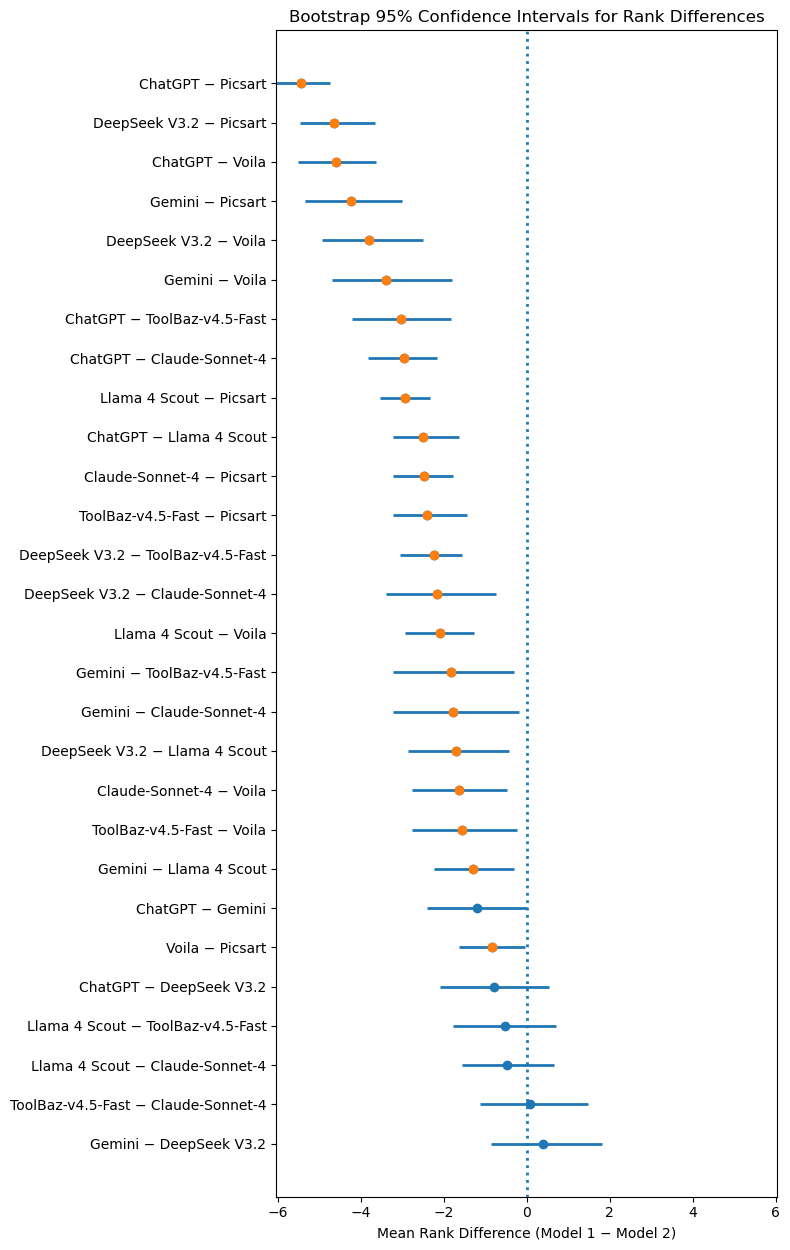

In [152]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

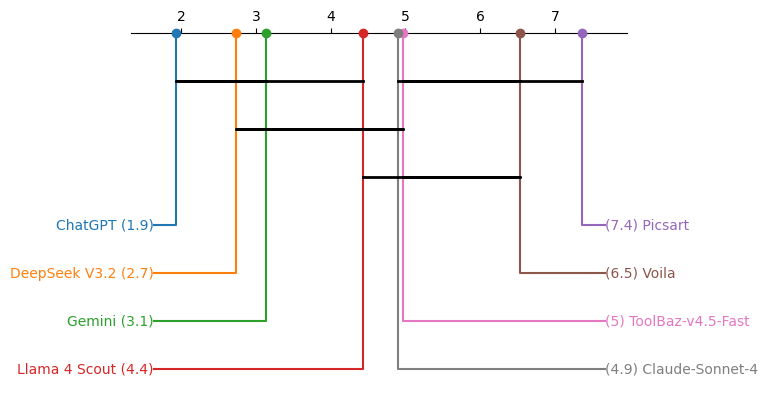

In [153]:
mean_ranks = text_gen_quiz_mean.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [154]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2      3      4      5      6      7     
2 1.0000 -      -      -      -      -      -     
3 1.0000 1.0000 -      -      -      -      -     
4 0.1376 1.0000 1.0000 -      -      -      -     
5 0.0931 1.0000 0.0302 1.0000 -      -      -     
6 0.0202 1.0000 1.0000 1.0000 1.0000 -      -     
7 0.0305 0.1634 0.0452 0.0085 0.2970 0.3203 -     
8 0.0197 0.0274 0.0305 0.0305 0.0656 0.0303 1.0000

P value adjustment method: bonferroni 



## Music

In [155]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = music_gen

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 150 x 3
   block method    Ranking
   <fct> <chr>       <dbl>
 1 1     Suno (1)        5
 2 1     Suno (2)        9
 3 1     Suno (3)        7
 4 1     Suno (4)        1
 5 1     Suno (5)        2
 6 1     Suno (6)        6
 7 1     Suno (7)        8
 8 1     Suno (8)        4
 9 1     Suno (9)        3
10 1     Suno (10)      10
# i 140 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 21.88, df = 9, p-value = 0.009267


      .y.  n   effsize    method magnitude
1 Ranking 15 0.1620741 Kendall W     small



In [156]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.00926717075716174 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [157]:
nemenyi = sp.posthoc_nemenyi_friedman(music_gen.values)

nemenyi.index = music_gen.columns
nemenyi.columns = music_gen.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Suno (1)             Suno (2)             Suno (3)  \
Suno (1)              1.000000             1.000000             0.997868   
Suno (2)              1.000000             1.000000             0.999942   
Suno (3)              0.997868             0.999942             1.000000   
Suno (4)              0.519852             0.729693             0.961009   
Suno (5)              1.000000             1.000000             0.999942   
Suno (6)              0.606161             0.394429             0.125006   
Suno (7)              1.000000             0.999860             0.979910   
Suno (8)              1.000000             0.999942             0.986193   
Suno (9)              0.999993             1.000000             0.999993   
Suno (10)             0.979910             0.912230             0.606161   

                      Suno (4)             Suno (5)             Suno (6)  \
Suno (1)              0.519852             1.000000             0.606161   
Suno (2)              0.729693             1.000000             0.394429   
Suno (3)              0.961009             0.999942             0.125006   
Suno (4)              1.000000             0.729693             0.001688   
Suno (5)              0.729693             1.000000             0.394429   
Suno (6)              0.001688             0.394429             1.000000   
Suno (7)              0.318316             0.999860             0.802377   
Suno (8)              0.355402             0.999942             0.767292   
Suno (9)              0.802377             1.000000             0.318316   
Suno (10)             0.037595             0.912230             0.997868   

                      Suno (7)             Suno (8)             Suno (9)  \
Suno (1)              1.000000             1.000000             0.999993   
Suno (2)              0.999860             0.999942             1.000000   
Suno (3)              0.979910             0.986193             0.999993   
Suno (4)              0.318316             0.355402             0.802377   
Suno (5)              0.999860             0.999942             1.000000   
Suno (6)              0.802377             0.767292             0.318316   
Suno (7)              1.000000             1.000000             0.999373   
Suno (8)              1.000000             1.000000             0.999692   
Suno (9)              0.999373             0.999692             1.000000   
Suno (10)             0.997868             0.996376             0.863756   

                     Suno (10)  
Suno (1)              0.979910  
Suno (2)              0.912230  
Suno (3)              0.606161  
Suno (4)              0.037595  
Suno (5)              0.912230  
Suno (6)              0.997868  
Suno (7)              0.997868  
Suno (8)              0.996376  
Suno (9)              0.863756  
Suno (10)             1.000000

In [158]:
ranks = music_gen.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1    Model_2   p_value       Mean rank diff             CI_lower  \
0   Suno (1)   Suno (2)  1.000000             0.333333            -2.266667   
1   Suno (1)   Suno (3)  0.997868             0.933333            -1.400000   
2   Suno (1)   Suno (4)  0.519852             2.333333             0.133333   
3   Suno (1)   Suno (5)  1.000000             0.333333            -1.266667   
4   Suno (1)   Suno (6)  0.606161            -2.200000            -3.800000   
5   Suno (1)   Suno (7)  1.000000            -0.333333            -2.666667   
6   Suno (1)   Suno (8)  1.000000            -0.266667            -2.600000   
7   Suno (1)   Suno (9)  0.999993             0.466667            -1.266667   
8   Suno (1)  Suno (10)  0.979910            -1.266667            -3.266667   
9   Suno (2)   Suno (3)  0.999942             0.600000            -1.733333   
10  Suno (2)   Suno (4)  0.729693             2.000000            -0.533333   
11  Suno (2)   Suno (5)  1.000000             0.000000            -2.666667   
12  Suno (2)   Suno (6)  0.394429            -2.533333            -4.400000   
13  Suno (2)   Suno (7)  0.999860            -0.666667            -2.133333   
14  Suno (2)   Suno (8)  0.999942            -0.600000            -2.600000   
15  Suno (2)   Suno (9)  1.000000             0.133333            -2.066667   
16  Suno (2)  Suno (10)  0.912230            -1.600000            -3.933333   
17  Suno (3)   Suno (4)  0.961009             1.400000            -1.000000   
18  Suno (3)   Suno (5)  0.999942            -0.600000            -2.933333   
19  Suno (3)   Suno (6)  0.125006            -3.133333            -5.066667   
20  Suno (3)   Suno (7)  0.979910            -1.266667            -3.133333   
21  Suno (3)   Suno (8)  0.986193            -1.200000            -3.533333   
22  Suno (3)   Suno (9)  0.999993            -0.466667            -2.133333   
23  Suno (3)  Suno (10)  0.606161            -2.200000            -3.733333   
24  Suno (4)   Suno (5)  0.729693            -2.000000            -3.666667   
25  Suno (4)   Suno (6)  0.001688            -4.533333            -5.933333   
26  Suno (4)   Suno (7)  0.318316            -2.666667            -4.666667   
27  Suno (4)   Suno (8)  0.355402            -2.600000            -4.400000   
28  Suno (4)   Suno (9)  0.802377            -1.866667            -3.666667   
29  Suno (4)  Suno (10)  0.037595            -3.600000            -5.466667   
30  Suno (5)   Suno (6)  0.394429            -2.533333            -4.266667   
31  Suno (5)   Suno (7)  0.999860            -0.666667            -2.933333   
32  Suno (5)   Suno (8)  0.999942            -0.600000            -2.866667   
33  Suno (5)   Suno (9)  1.000000             0.133333            -1.800000   
34  Suno (5)  Suno (10)  0.912230            -1.600000            -3.600000   
35  Suno (6)   Suno (7)  0.802377             1.866667             0.266667   
36  Suno (6)   Suno (8)  0.767292             1.933333             0.066667   
37  Suno (6)   Suno (9)  0.318316             2.666667             1.400000   
38  Suno (6)  Suno (10)  0.997868             0.933333            -0.866667   
39  Suno (7)   Suno (8)  1.000000             0.066667            -1.600000   
40  Suno (7)   Suno (9)  0.999373             0.800000            -1.133333   
41  Suno (7)  Suno (10)  0.997868            -0.933333            -2.466667   
42  Suno (8)   Suno (9)  0.999692             0.733333            -0.800000   
43  Suno (8)  Suno (10)  0.996376            -1.000000            -3.000000   
44  Suno (9)  Suno (10)  0.863756            -1.733333            -3.466667   

               CI_upper  
0              2.733333  
1              3.133333  
2              4.400000  
3              2.133333  
4             -0.666667  
5              1.800000  
6              1.866667  
7              2.000000  
8              0.866667  
9              2.933333  
10             4.533333  
11             2.600000  
12            -0.533333  
13    

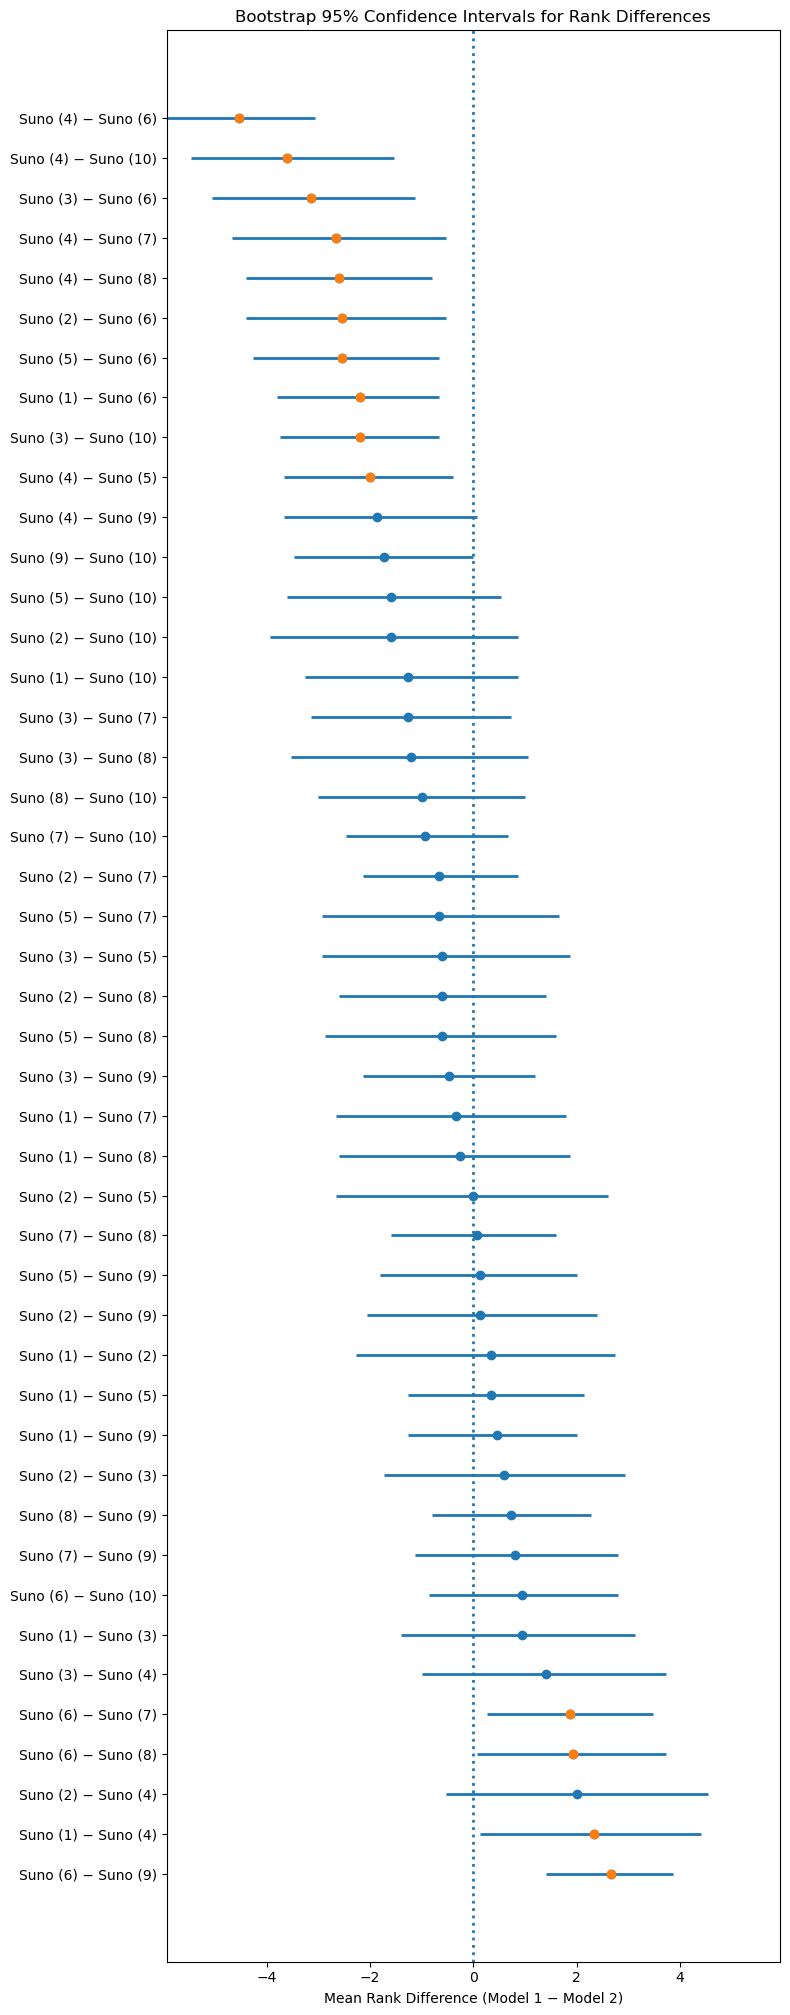

In [159]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

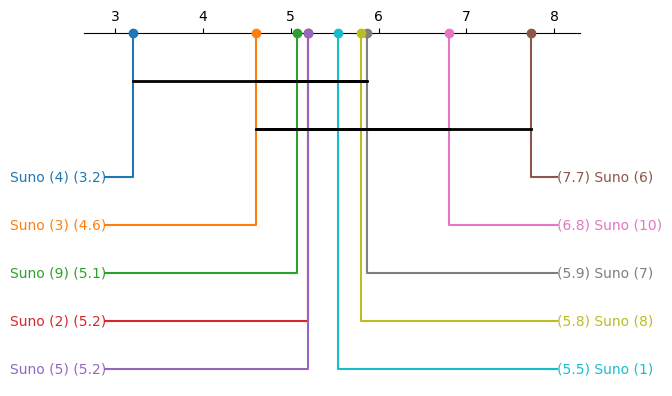

In [160]:
mean_ranks = music_gen.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [161]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

   1     2     3     4     5     6     7     8     9    
2  1.000 -     -     -     -     -     -     -     -    
3  1.000 1.000 -     -     -     -     -     -     -    
4  1.000 1.000 1.000 -     -     -     -     -     -    
5  1.000 1.000 1.000 1.000 -     -     -     -     -    
6  1.000 1.000 0.598 0.047 1.000 -     -     -     -    
7  1.000 1.000 1.000 1.000 1.000 1.000 -     -     -    
8  1.000 1.000 1.000 1.000 1.000 1.000 1.000 -     -    
9  1.000 1.000 1.000 1.000 1.000 0.181 1.000 1.000 -    
10 1.000 1.000 0.872 0.434 1.000 1.000 1.000 1.000 1.000

P value adjustment method: bonferroni 



## SFX

### Prompt 1

In [162]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = sfx_gen_p1

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method     Ranking
   <fct> <chr>        <dbl>
 1 1     Elevenlabs       2
 2 1     SFX Engine       1
 3 1     Lami AI          3
 4 2     Elevenlabs       2
 5 2     SFX Engine       3
 6 2     Lami AI          1
 7 3     Elevenlabs       3
 8 3     SFX Engine       1
 9 3     Lami AI          2
10 4     Elevenlabs       2


# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 17.2, df = 2, p-value = 0.0001841


      .y.  n   effsize    method magnitude
1 Ranking 15 0.5733333 Kendall W     large



In [163]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.0001841057936675792 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [164]:
nemenyi = sp.posthoc_nemenyi_friedman(sfx_gen_p1.values)

nemenyi.index = sfx_gen_p1.columns
nemenyi.columns = sfx_gen_p1.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Elevenlabs           SFX Engine              Lami AI
Elevenlabs             1.000000             0.002916             0.847644
SFX Engine             0.002916             1.000000             0.000371
Lami AI                0.847644             0.000371             1.000000

In [165]:
ranks = sfx_gen_p1.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1     Model_2   p_value       Mean rank diff             CI_lower  \
0  Elevenlabs  SFX Engine  0.002916             1.200000             0.800000   
1  Elevenlabs     Lami AI  0.847644            -0.200000            -0.733333   
2  SFX Engine     Lami AI  0.000371            -1.400000            -1.800000   

              CI_upper  
0             1.533333  
1             0.333333  
2            -0.800000

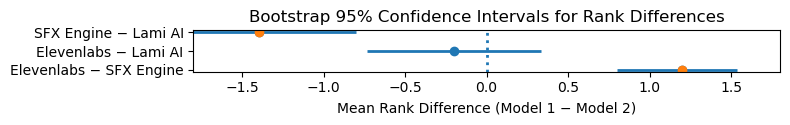

In [166]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

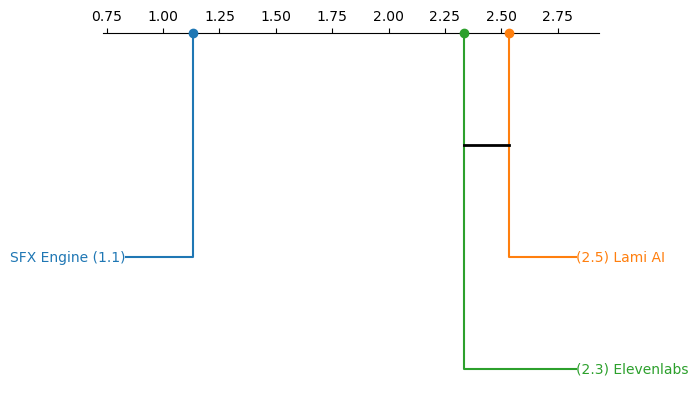

In [167]:
mean_ranks = sfx_gen_p1.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [168]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2     
2 0.0043 -     
3 1.0000 0.0114

P value adjustment method: bonferroni 



### Prompt 2

In [169]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = sfx_gen_p2

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method     Ranking
   <fct> <chr>        <dbl>
 1 1     Elevenlabs       1
 2 1     SFX Engine       3
 3 1     Lami AI          2
 4 2     Elevenlabs       3
 5 2     SFX Engine       2
 6 2     Lami AI          1
 7 3     Elevenlabs       3
 8 3     SFX Engine       1
 9 3     Lami AI          2
10 4     Elevenlabs       3
# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 3.7333, df = 2, p-value = 0.1546


      .y.  n   effsize    method magnitude
1 Ranking 15 0.1244444 Kendall W     small



In [170]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.1546382645492548 > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


Όταν δεχόμαστε την μηδενική υπόθεση, εφόσον δεν υπάρχει στατιστικά σημαντική διαφορά μεταξύ των μοντέλων παρουσιάζουμε την μέση βαθμολογία του κάθε μοντέλου. Παρότι δεν υπάρχει στατιστικά σημαντική διαφορά, υπάρχει (συνήθως) μια ελαφριά προτίμιση των ερωτηθέντων προς ένα μοντέλο

In [171]:
mean_ranks = sfx_gen_p2.rank(axis=1).mean().sort_values()
mean_ranks

SFX Engine               1.600000
Lami AI                  2.133333
Elevenlabs               2.266667
dtype: float64

### Prompt 3

In [172]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = sfx_gen_p3

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method     Ranking
   <fct> <chr>        <dbl>
 1 1     Elevenlabs       1
 2 1     SFX Engine       3
 3 1     Lami AI          2
 4 2     Elevenlabs       1
 5 2     SFX Engine       3
 6 2     Lami AI          2
 7 3     Elevenlabs       1
 8 3     SFX Engine       3
 9 3     Lami AI          2
10 4     Elevenlabs       1
# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 8.1333, df = 2, p-value = 0.01713


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2711111 Kendall W     small



In [173]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.017134408115727567 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [174]:
nemenyi = sp.posthoc_nemenyi_friedman(sfx_gen_p3.values)

nemenyi.index = sfx_gen_p3.columns
nemenyi.columns = sfx_gen_p3.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Elevenlabs           SFX Engine              Lami AI
Elevenlabs             1.000000             0.028540             0.046351
SFX Engine             0.028540             1.000000             0.981791
Lami AI                0.046351             0.981791             1.000000

In [175]:
ranks = sfx_gen_p3.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1     Model_2   p_value       Mean rank diff             CI_lower  \
0  Elevenlabs  SFX Engine  0.028540            -0.933333            -1.533333   
1  Elevenlabs     Lami AI  0.046351            -0.866667            -1.333333   
2  SFX Engine     Lami AI  0.981791             0.066667            -0.666667   

              CI_upper  
0            -0.266667  
1            -0.331667  
2             0.733333

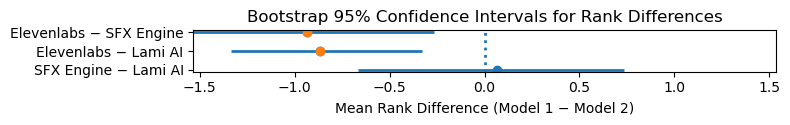

In [176]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

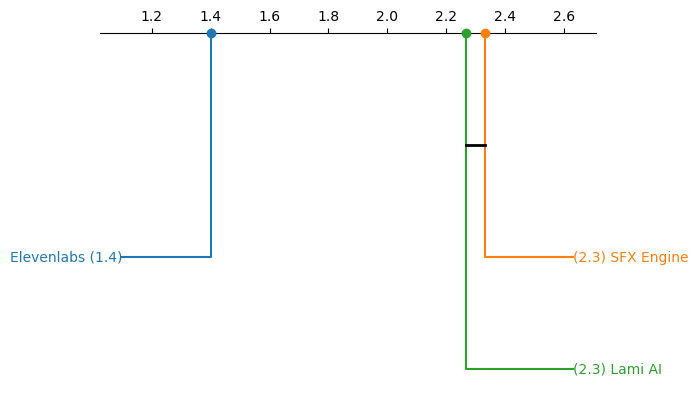

In [177]:
mean_ranks = sfx_gen_p3.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [178]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2    
2 0.046 -    
3 0.051 1.000

P value adjustment method: bonferroni 



### Prompt 4

In [179]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = sfx_gen_p4

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method     Ranking
   <fct> <chr>        <dbl>
 1 1     Elevenlabs       1
 2 1     SFX Engine       2
 3 1     Lami AI          3
 4 2     Elevenlabs       3
 5 2     SFX Engine       2
 6 2     Lami AI          1
 7 3     Elevenlabs       1
 8 3     SFX Engine       2
 9 3     Lami AI          3
10 4     Elevenlabs       1
# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 3.7333, df = 2, p-value = 0.1546


      .y.  n   effsize    method magnitude
1 Ranking 15 0.1244444 Kendall W     small



In [180]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.1546382645492548 > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [181]:
mean_ranks = sfx_gen_p4.rank(axis=1).mean().sort_values()
mean_ranks

Elevenlabs               1.600000
SFX Engine               2.133333
Lami AI                  2.266667
dtype: float64

### Prompt 5

In [182]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = sfx_gen_p5

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method     Ranking
   <fct> <chr>        <dbl>
 1 1     Elevenlabs       1
 2 1     SFX Engine       2
 3 1     Lami AI          3
 4 2     Elevenlabs       2
 5 2     SFX Engine       3
 6 2     Lami AI          1
 7 3     Elevenlabs       1
 8 3     SFX Engine       2
 9 3     Lami AI          3
10 4     Elevenlabs       1
# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 14.933, df = 2, p-value = 0.0005718


      .y.  n   effsize    method magnitude
1 Ranking 15 0.4977778 Kendall W  moderate



In [183]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.000571831227656578 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [184]:
nemenyi = sp.posthoc_nemenyi_friedman(sfx_gen_p5.values)

nemenyi.index = sfx_gen_p5.columns
nemenyi.columns = sfx_gen_p5.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Elevenlabs           SFX Engine              Lami AI
Elevenlabs             1.000000             0.000762             0.009763
SFX Engine             0.000762             1.000000             0.745491
Lami AI                0.009763             0.745491             1.000000

In [185]:
ranks = sfx_gen_p5.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1     Model_2   p_value       Mean rank diff             CI_lower  \
0  Elevenlabs  SFX Engine  0.000762            -1.333333            -1.666667   
1  Elevenlabs     Lami AI  0.009763            -1.066667            -1.468333   
2  SFX Engine     Lami AI  0.745491             0.266667            -0.400000   

              CI_upper  
0            -0.866667  
1            -0.533333  
2             0.866667

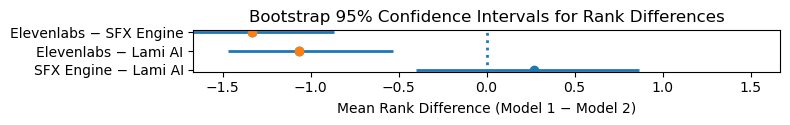

In [186]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

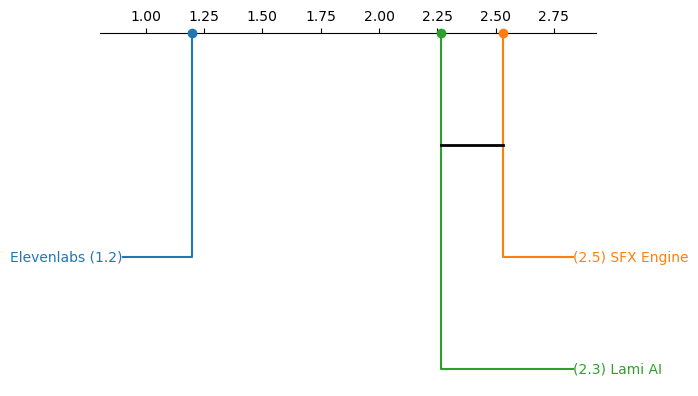

In [187]:
mean_ranks = sfx_gen_p5.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [188]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1      2     
2 0.0039 -     
3 0.0126 1.0000

P value adjustment method: bonferroni 



### Mean scores for all prompts

In [32]:
sfx_gen_mean = sfx_gen_mean.astype(float)
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = sfx_gen_mean

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 45 x 3
   block method     Ranking
   <fct> <chr>        <dbl>
 1 1     Elevenlabs     1.2
 2 1     SFX Engine     2.2
 3 1     Lami AI        2.6
 4 2     Elevenlabs     2.2
 5 2     SFX Engine     2.6
 6 2     Lami AI        1.2
 7 3     Elevenlabs     1.8
 8 3     SFX Engine     1.8
 9 3     Lami AI        2.4
10 4     Elevenlabs     1.6
# i 35 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 8, df = 2, p-value = 0.01832


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2666667 Kendall W     small



In [190]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.01831563888873418 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [191]:
nemenyi = sp.posthoc_nemenyi_friedman(sfx_gen_mean.values)

nemenyi.index = sfx_gen_mean.columns
nemenyi.columns = sfx_gen_mean.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Elevenlabs           SFX Engine              Lami AI
Elevenlabs             1.000000             0.745491             0.028540
SFX Engine             0.745491             1.000000             0.161159
Lami AI                0.028540             0.161159             1.000000

In [192]:
ranks = sfx_gen_mean.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1     Model_2   p_value       Mean rank diff             CI_lower  \
0  Elevenlabs  SFX Engine  0.745491            -0.266667            -0.866667   
1  Elevenlabs     Lami AI  0.028540            -0.933333            -1.433333   
2  SFX Engine     Lami AI  0.161159            -0.666667            -1.166667   

              CI_upper  
0             0.400000  
1            -0.333333  
2            -0.100000

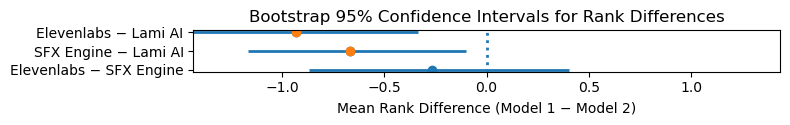

In [193]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

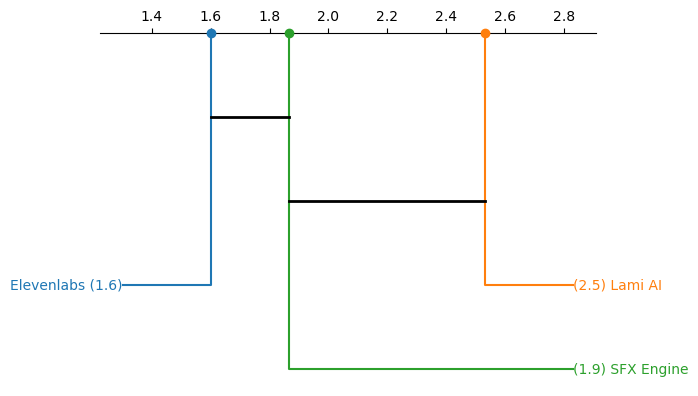

In [194]:
mean_ranks = sfx_gen_mean.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [195]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

  1     2    
2 0.813 -    
3 0.051 0.112

P value adjustment method: bonferroni 



## Speech

### Prompt 1

In [196]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = speech_gen_p1

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 150 x 3
   block method                 Ranking
   <fct> <chr>                    <dbl>
 1 1     Eleven Labs - Adam           5
 2 1     Eleven Labs - Daniel         6
 3 1     Eleven Labs - Liam           1
 4 1     Evernote - Griffin          10
 5 1     Evernote - Lyra              2
 6 1     Evernote - Xavier            3
 7 1     Luvvoice - Ben               8
 8 1     Luvvoice - Brian             4
 9 1     Luvvoice - Christopher       7
10 1     NoteGPT - Jake               9
# i 140 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 27.698, df = 9, p-value = 0.001071


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2051717 Kendall W     small



In [197]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.0010711339949758874 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [198]:
nemenyi = sp.posthoc_nemenyi_friedman(speech_gen_p1.values)

nemenyi.index = speech_gen_p1.columns
nemenyi.columns = speech_gen_p1.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Eleven Labs - Adam  Eleven Labs - Daniel  \
Eleven Labs - Adam                 1.000000              1.000000   
Eleven Labs - Daniel               1.000000              1.000000   
Eleven Labs - Liam                 0.994113              0.990819   
Evernote - Griffin                 0.990819              0.994113   
Evernote - Lyra                    0.999998              0.999993   
Evernote - Xavier                  0.802377              0.767292   
Luvvoice - Ben                     0.394429              0.435097   
Luvvoice - Brian                   0.999692              0.999373   
Luvvoice - Christopher             0.999860              0.999942   
NoteGPT - Jake                     0.729693              0.767292   

                         Eleven Labs - Liam   Evernote - Griffin  \
Eleven Labs - Adam                 0.994113             0.990819   
Eleven Labs - Daniel               0.990819             0.994113   
Eleven Labs - Liam                 1.000000             0.606161   
Evernote - Griffin                 0.606161             1.000000   
Evernote - Lyra                    0.999860             0.931551   
Evernote - Xavier                  0.999373             0.167978   
Luvvoice - Ben                     0.037595             0.961009   
Luvvoice - Brian                   1.000000             0.802377   
Luvvoice - Christopher             0.863756             0.999993   
NoteGPT - Jake                     0.145309             0.998809   

                            Evernote - Lyra    Evernote - Xavier  \
Eleven Labs - Adam                 0.999998             0.802377   
Eleven Labs - Daniel               0.999993             0.767292   
Eleven Labs - Liam                 0.999860             0.999373   
Evernote - Griffin                 0.931551             0.167978   
Evernote - Lyra                    1.000000             0.947741   
Evernote - Xavier                  0.947741             1.000000   
Luvvoice - Ben                     0.193099             0.002772   
Luvvoice - Brian                   1.000000             0.990819   
Luvvoice - Christopher             0.994113             0.394429   
NoteGPT - Jake                     0.477043             0.016959   

                             Luvvoice - Ben     Luvvoice - Brian  \
Eleven Labs - Adam                 0.394429             0.999692   
Eleven Labs - Daniel               0.435097             0.999373   
Eleven Labs - Liam                 0.037595             1.000000   
Evernote - Griffin                 0.961009             0.802377   
Evernote - Lyra                    0.193099             1.000000   
Evernote - Xavier                  0.002772             0.990819   
Luvvoice - Ben                     1.000000             0.091022   
Luvvoice - Brian                   0.091022             1.000000   
Luvvoice - Christopher             0.802377             0.961009   
NoteGPT - Jake                     0.999979             0.283403   

                        Luvvoice - Christopher       NoteGPT - Jake  
Eleven Labs - Adam                    0.999860             0.729693  
Eleven Labs - Daniel                  0.999942             0.767292  
Eleven Labs - Liam                    0.863756             0.145309  
Evernote - Griffin                    0.999993             0.998809  
Evernote - Lyra                       0.994113             0.477043  
Evernote - Xavier                     0.394429             0.016959  
Luvvoice - Ben                        0.802377             0.999979  
Luvvoice - Brian                      0.961009             0.283403  
Luvvoice - Christopher                1.000000             0.971627  
NoteGPT - Jake                        0.971627             1.000000

In [199]:
ranks = speech_gen_p1.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                 Model_2   p_value  \
0       Eleven Labs - Adam    Eleven Labs - Daniel  1.000000   
1       Eleven Labs - Adam      Eleven Labs - Liam  0.994113   
2       Eleven Labs - Adam      Evernote - Griffin  0.990819   
3       Eleven Labs - Adam         Evernote - Lyra  0.999998   
4       Eleven Labs - Adam       Evernote - Xavier  0.802377   
5       Eleven Labs - Adam          Luvvoice - Ben  0.394429   
6       Eleven Labs - Adam        Luvvoice - Brian  0.999692   
7       Eleven Labs - Adam  Luvvoice - Christopher  0.999860   
8       Eleven Labs - Adam          NoteGPT - Jake  0.729693   
9     Eleven Labs - Daniel      Eleven Labs - Liam  0.990819   
10    Eleven Labs - Daniel      Evernote - Griffin  0.994113   
11    Eleven Labs - Daniel         Evernote - Lyra  0.999993   
12    Eleven Labs - Daniel       Evernote - Xavier  0.767292   
13    Eleven Labs - Daniel          Luvvoice - Ben  0.435097   
14    Eleven Labs - Daniel        Luvvoice - Brian  0.999373   
15    Eleven Labs - Daniel  Luvvoice - Christopher  0.999942   
16    Eleven Labs - Daniel          NoteGPT - Jake  0.767292   
17      Eleven Labs - Liam      Evernote - Griffin  0.606161   
18      Eleven Labs - Liam         Evernote - Lyra  0.999860   
19      Eleven Labs - Liam       Evernote - Xavier  0.999373   
20      Eleven Labs - Liam          Luvvoice - Ben  0.037595   
21      Eleven Labs - Liam        Luvvoice - Brian  1.000000   
22      Eleven Labs - Liam  Luvvoice - Christopher  0.863756   
23      Eleven Labs - Liam          NoteGPT - Jake  0.145309   
24      Evernote - Griffin         Evernote - Lyra  0.931551   
25      Evernote - Griffin       Evernote - Xavier  0.167978   
26      Evernote - Griffin          Luvvoice - Ben  0.961009   
27      Evernote - Griffin        Luvvoice - Brian  0.802377   
28      Evernote - Griffin  Luvvoice - Christopher  0.999993   
29      Evernote - Griffin          NoteGPT - Jake  0.998809   
30         Evernote - Lyra       Evernote - Xavier  0.947741   
31         Evernote - Lyra          Luvvoice - Ben  0.193099   
32         Evernote - Lyra        Luvvoice - Brian  1.000000   
33         Evernote - Lyra  Luvvoice - Christopher  0.994113   
34         Evernote - Lyra          NoteGPT - Jake  0.477043   
35       Evernote - Xavier          Luvvoice - Ben  0.002772   
36       Evernote - Xavier        Luvvoice - Brian  0.990819   
37       Evernote - Xavier  Luvvoice - Christopher  0.394429   
38       Evernote - Xavier          NoteGPT - Jake  0.016959   
39          Luvvoice - Ben        Luvvoice - Brian  0.091022   
40          Luvvoice - Ben  Luvvoice - Christopher  0.802377   
41          Luvvoice - Ben          NoteGPT - Jake  0.999979   
42        Luvvoice - Brian  Luvvoice - Christopher  0.961009   
43        Luvvoice - Brian          NoteGPT - Jake  0.283403   
44  Luvvoice - Christopher          NoteGPT - Jake  0.971627   

         Mean rank diff             CI_lower             CI_upper  
0             -0.066667            -2.066667             2.066667  
1              1.066667            -0.800000             3.000000  
2             -1.133333            -3.533333             1.533333  
3              0.400000            -1.466667             2.400000  
4              1.866667            -0.200000             4.001667  
5             -2.533333            -4.400000            -0.600000  
6              0.733333            -1.200000             2.533333  
7             -0.666667            -2.266667             1.001667  
8             -2.000000            -4.266667             0.266667  
9              1.133333            -0.866667             3.133333  
10            -1.066667            -3.933333             1.933333  
11             0.466667            -1.866667             2.666667  
12             1.933333             0.533333             3.400000  
13            -2.466667            -4.133333            -0.800000  
14             0.800000            -0.866667          

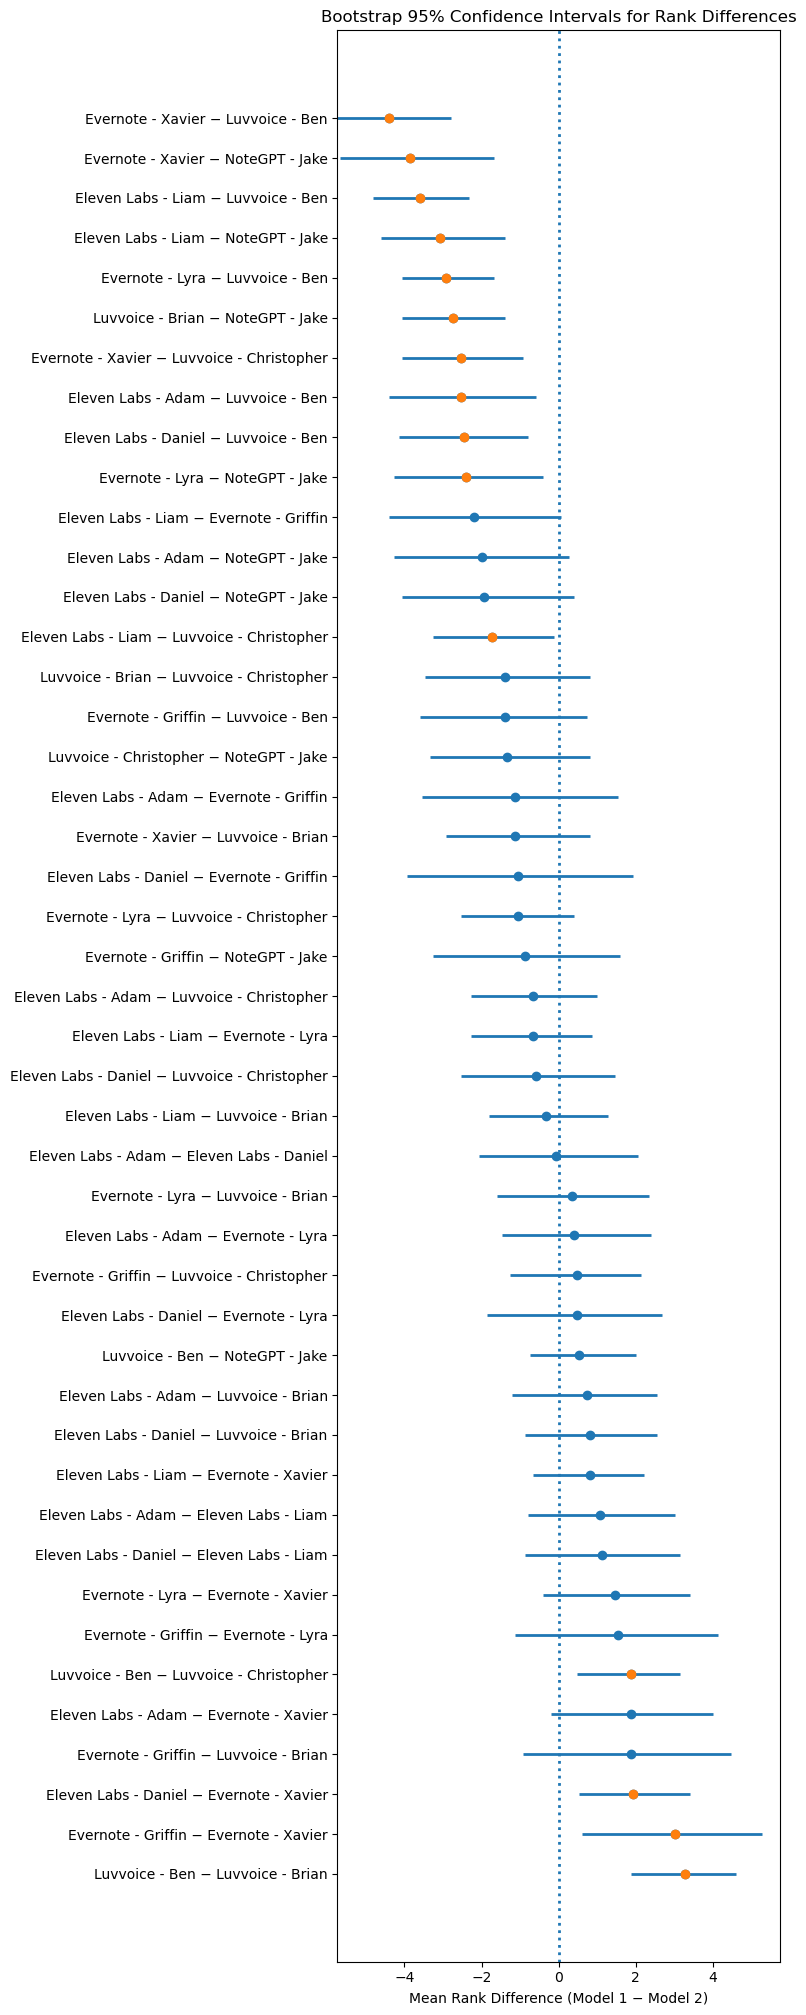

In [200]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

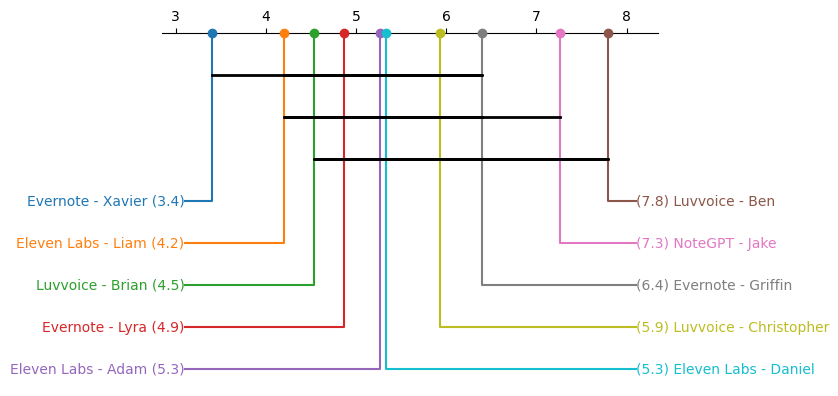

In [201]:
mean_ranks = speech_gen_p1.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [202]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

   1     2     3     4     5     6     7     8     9    
2  1.000 -     -     -     -     -     -     -     -    
3  1.000 1.000 -     -     -     -     -     -     -    
4  1.000 1.000 1.000 -     -     -     -     -     -    
5  1.000 1.000 1.000 1.000 -     -     -     -     -    
6  1.000 1.000 1.000 1.000 1.000 -     -     -     -    
7  1.000 1.000 0.077 1.000 0.124 0.104 -     -     -    
8  1.000 1.000 1.000 1.000 1.000 1.000 0.102 -     -    
9  1.000 1.000 1.000 1.000 1.000 0.238 0.628 1.000 -    
10 1.000 1.000 0.393 1.000 1.000 0.391 1.000 0.178 1.000

P value adjustment method: bonferroni 



### Prompt 2

In [203]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = speech_gen_p2

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 150 x 3
   block method                 Ranking
   <fct> <chr>                    <dbl>
 1 1     Eleven Labs - Adam           6
 2 1     Eleven Labs - Daniel         2
 3 1     Eleven Labs - Liam           1
 4 1     Evernote - Griffin           9
 5 1     Evernote - Lyra              8
 6 1     Evernote - Xavier            7
 7 1     Luvvoice - Ben               4
 8 1     Luvvoice - Brian             3
 9 1     Luvvoice - Christopher       5
10 1     NoteGPT - Jake              10
# i 140 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 11.189, df = 9, p-value = 0.263


      .y.  n    effsize    method magnitude
1 Ranking 15 0.08288215 Kendall W     small



In [204]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.2629701399281951 > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [205]:
mean_ranks = speech_gen_p2.rank(axis=1).mean().sort_values()
mean_ranks

Luvvoice - Brian                     4.133333
Eleven Labs - Daniel                 4.400000
Eleven Labs - Liam                   5.000000
Luvvoice - Christopher               5.133333
NoteGPT - Jake                       5.533333
Evernote - Xavier                    5.533333
Eleven Labs - Adam                   5.866667
Evernote - Lyra                      5.933333
Luvvoice - Ben                       6.666667
Evernote - Griffin                   6.800000
dtype: float64

### Prompt 3

In [206]:
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = speech_gen_p3

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 150 x 3


   block method                 Ranking
   <fct> <chr>                    <dbl>
 1 1     Eleven Labs - Adam           7
 2 1     Eleven Labs - Daniel         2
 3 1     Eleven Labs - Liam           1
 4 1     Evernote - Griffin           9
 5 1     Evernote - Lyra              6
 6 1     Evernote - Xavier            5
 7 1     Luvvoice - Ben               3
 8 1     Luvvoice - Brian             4
 9 1     Luvvoice - Christopher       8
10 1     NoteGPT - Jake              10
# i 140 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 34.2, df = 9, p-value = 8.239e-05


      .y.  n   effsize    method magnitude
1 Ranking 15 0.2533333 Kendall W     small



In [207]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 8.239143969769273e-05 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [208]:
nemenyi = sp.posthoc_nemenyi_friedman(speech_gen_p3.values)

nemenyi.index = speech_gen_p3.columns
nemenyi.columns = speech_gen_p3.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Eleven Labs - Adam  Eleven Labs - Daniel  \
Eleven Labs - Adam                 1.000000              0.031032   
Eleven Labs - Daniel               0.031032              1.000000   
Eleven Labs - Liam                 0.606161              0.947741   
Evernote - Griffin                 0.997868              0.001309   
Evernote - Lyra                    0.997868              0.283403   
Evernote - Xavier                  0.729693              0.889646   
Luvvoice - Ben                     1.000000              0.077054   
Luvvoice - Brian                   0.220717              0.999373   
Luvvoice - Christopher             0.999979              0.125006   
NoteGPT - Jake                     0.999942              0.004476   

                         Eleven Labs - Liam   Evernote - Griffin  \
Eleven Labs - Adam                 0.606161             0.997868   
Eleven Labs - Daniel               0.947741             0.001309   
Eleven Labs - Liam                 1.000000             0.125006   
Evernote - Griffin                 0.125006             1.000000   
Evernote - Lyra                    0.979910             0.802377   
Evernote - Xavier                  1.000000             0.193099   
Luvvoice - Ben                     0.802377             0.979910   
Luvvoice - Brian                   0.999860             0.020841   
Luvvoice - Christopher             0.889646             0.947741   
NoteGPT - Jake                     0.250835             1.000000   

                            Evernote - Lyra    Evernote - Xavier  \
Eleven Labs - Adam                 0.997868             0.729693   
Eleven Labs - Daniel               0.283403             0.889646   
Eleven Labs - Liam                 0.979910             1.000000   
Evernote - Griffin                 0.802377             0.193099   
Evernote - Lyra                    1.000000             0.994113   
Evernote - Xavier                  0.994113             1.000000   
Luvvoice - Ben                     0.999942             0.889646   
Luvvoice - Brian                   0.767292             0.998809   
Luvvoice - Christopher             0.999998             0.947741   
NoteGPT - Jake                     0.931551             0.355402   

                             Luvvoice - Ben     Luvvoice - Brian  \
Eleven Labs - Adam                 1.000000             0.220717   
Eleven Labs - Daniel               0.077054             0.999373   
Eleven Labs - Liam                 0.802377             0.999860   
Evernote - Griffin                 0.979910             0.020841   
Evernote - Lyra                    0.999942             0.767292   
Evernote - Xavier                  0.889646             0.998809   
Luvvoice - Ben                     1.000000             0.394429   
Luvvoice - Brian                   0.394429             1.000000   
Luvvoice - Christopher             1.000000             0.519852   
NoteGPT - Jake                     0.997868             0.054369   

                        Luvvoice - Christopher       NoteGPT - Jake  
Eleven Labs - Adam                    0.999979             0.999942  
Eleven Labs - Daniel                  0.125006             0.004476  
Eleven Labs - Liam                    0.889646             0.250835  
Evernote - Griffin                    0.947741             1.000000  
Evernote - Lyra                       0.999998             0.931551  
Evernote - Xavier                     0.947741             0.355402  
Luvvoice - Ben                        1.000000             0.997868  
Luvvoice - Brian                      0.519852             0.054369  
Luvvoice - Christopher                1.000000             0.990819  
NoteGPT - Jake                        0.990819             1.000000

In [209]:
ranks = speech_gen_p3.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                 Model_2   p_value  \
0       Eleven Labs - Adam    Eleven Labs - Daniel  0.031032   
1       Eleven Labs - Adam      Eleven Labs - Liam  0.606161   
2       Eleven Labs - Adam      Evernote - Griffin  0.997868   
3       Eleven Labs - Adam         Evernote - Lyra  0.997868   
4       Eleven Labs - Adam       Evernote - Xavier  0.729693   
5       Eleven Labs - Adam          Luvvoice - Ben  1.000000   
6       Eleven Labs - Adam        Luvvoice - Brian  0.220717   
7       Eleven Labs - Adam  Luvvoice - Christopher  0.999979   
8       Eleven Labs - Adam          NoteGPT - Jake  0.999942   
9     Eleven Labs - Daniel      Eleven Labs - Liam  0.947741   
10    Eleven Labs - Daniel      Evernote - Griffin  0.001309   
11    Eleven Labs - Daniel         Evernote - Lyra  0.283403   
12    Eleven Labs - Daniel       Evernote - Xavier  0.889646   
13    Eleven Labs - Daniel          Luvvoice - Ben  0.077054   
14    Eleven Labs - Daniel        Luvvoice - Brian  0.999373   
15    Eleven Labs - Daniel  Luvvoice - Christopher  0.125006   
16    Eleven Labs - Daniel          NoteGPT - Jake  0.004476   
17      Eleven Labs - Liam      Evernote - Griffin  0.125006   
18      Eleven Labs - Liam         Evernote - Lyra  0.979910   
19      Eleven Labs - Liam       Evernote - Xavier  1.000000   
20      Eleven Labs - Liam          Luvvoice - Ben  0.802377   
21      Eleven Labs - Liam        Luvvoice - Brian  0.999860   
22      Eleven Labs - Liam  Luvvoice - Christopher  0.889646   
23      Eleven Labs - Liam          NoteGPT - Jake  0.250835   
24      Evernote - Griffin         Evernote - Lyra  0.802377   
25      Evernote - Griffin       Evernote - Xavier  0.193099   
26      Evernote - Griffin          Luvvoice - Ben  0.979910   
27      Evernote - Griffin        Luvvoice - Brian  0.020841   
28      Evernote - Griffin  Luvvoice - Christopher  0.947741   
29      Evernote - Griffin          NoteGPT - Jake  1.000000   
30         Evernote - Lyra       Evernote - Xavier  0.994113   
31         Evernote - Lyra          Luvvoice - Ben  0.999942   
32         Evernote - Lyra        Luvvoice - Brian  0.767292   
33         Evernote - Lyra  Luvvoice - Christopher  0.999998   
34         Evernote - Lyra          NoteGPT - Jake  0.931551   
35       Evernote - Xavier          Luvvoice - Ben  0.889646   
36       Evernote - Xavier        Luvvoice - Brian  0.998809   
37       Evernote - Xavier  Luvvoice - Christopher  0.947741   
38       Evernote - Xavier          NoteGPT - Jake  0.355402   
39          Luvvoice - Ben        Luvvoice - Brian  0.394429   
40          Luvvoice - Ben  Luvvoice - Christopher  1.000000   
41          Luvvoice - Ben          NoteGPT - Jake  0.997868   
42        Luvvoice - Brian  Luvvoice - Christopher  0.519852   
43        Luvvoice - Brian          NoteGPT - Jake  0.054369   
44  Luvvoice - Christopher          NoteGPT - Jake  0.990819   

         Mean rank diff             CI_lower             CI_upper  
0              3.666667             2.066667             5.333333  
1              2.200000            -0.400000             4.466667  
2             -0.933333            -2.933333             1.333333  
3              0.933333            -1.066667             3.000000  
4              2.000000             0.266667             3.733333  
5              0.333333            -1.666667             2.201667  
6              2.866667             1.133333             4.533333  
7              0.533333            -0.866667             1.866667  
8             -0.600000            -2.800000             1.600000  
9             -1.466667            -3.400000             0.666667  
10            -4.600000            -6.133333            -3.000000  
11            -2.733333            -4.533333            -0.666667  
12            -1.666667            -3.133333            -0.133333  
13            -3.333333            -5.133333            -1.333333  
14            -0.800000            -2.400000          

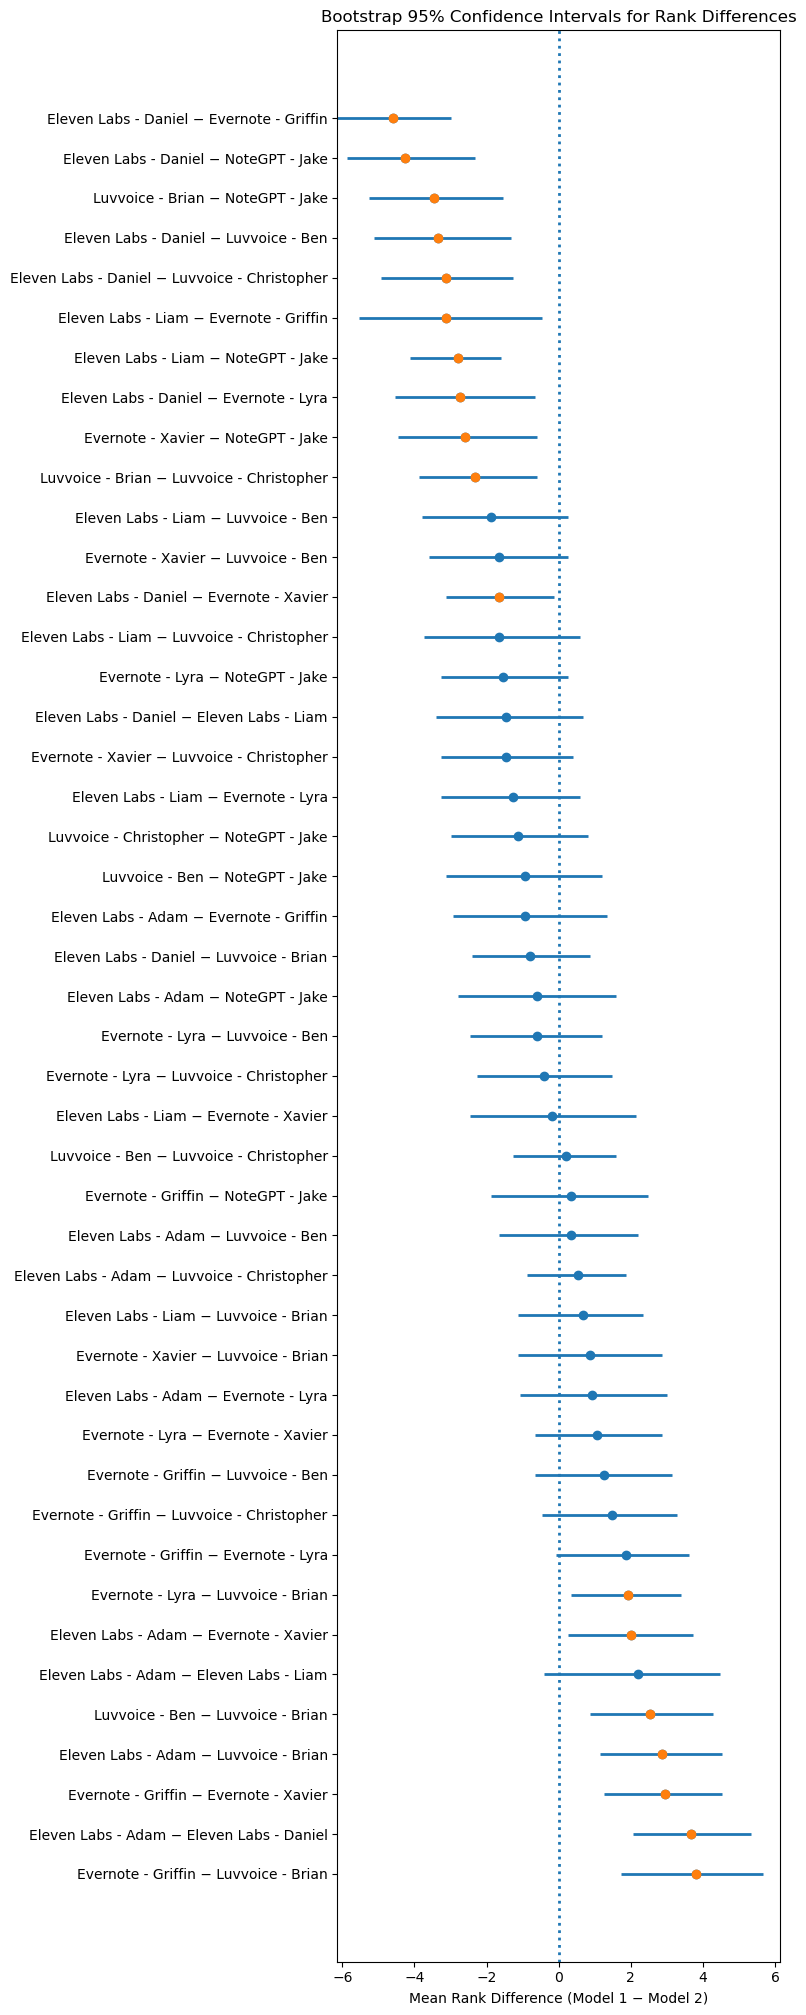

In [210]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

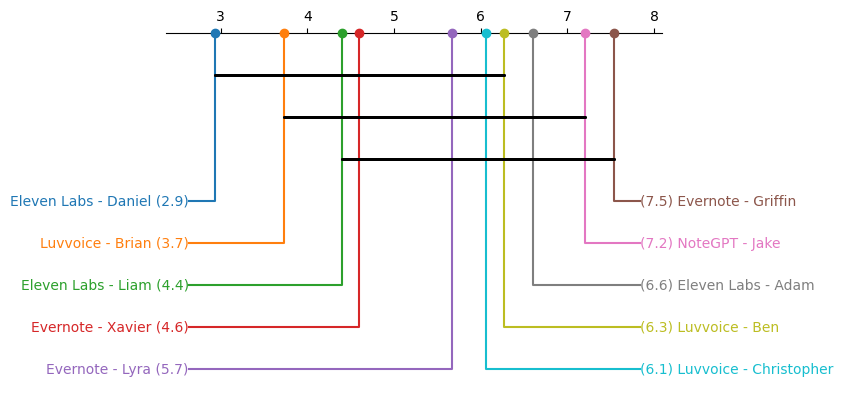

In [211]:
mean_ranks = speech_gen_p3.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [212]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

   1     2     3     4     5     6     7     8     9    
2  0.177 -     -     -     -     -     -     -     -    
3  1.000 1.000 -     -     -     -     -     -     -    
4  1.000 0.065 1.000 -     -     -     -     -     -    
5  1.000 1.000 1.000 1.000 -     -     -     -     -    
6  1.000 1.000 1.000 0.305 1.000 -     -     -     -    
7  1.000 0.510 1.000 1.000 1.000 1.000 -     -     -    
8  0.588 1.000 1.000 0.366 1.000 1.000 0.675 -     -    
9  1.000 0.398 1.000 1.000 1.000 1.000 1.000 1.000 -    
10 1.000 0.197 0.049 1.000 1.000 1.000 1.000 0.333 1.000

P value adjustment method: bonferroni 



### Mean scores for all prompts

In [33]:
speech_gen_mean = speech_gen_mean.astype(float)
with localconverter(pandas2ri.converter):
    globalenv["rankings"] = speech_gen_mean

friedman = r("""
run_friedman_test <- function(rankings) {
  rankings_mat <- as.matrix(rankings)
  storage.mode(rankings_mat) <- "numeric"

  df_long <- as.data.frame(rankings_mat)
  df_long$block <- factor(seq_len(nrow(df_long)))

  df_long <- tidyr::pivot_longer(
    df_long,
    cols = -block,
    names_to = "method",
    values_to = "Ranking"
  )

  list(
    friedman = friedman.test(rankings_mat),
    kendalls_w = as.data.frame(
      rstatix::friedman_effsize(
        df_long,
        Ranking ~ method | block
      )
    ),
    print(df_long)
  )
}
run_friedman_test(rankings)
""")

print(friedman.rx2("friedman"))
print(friedman.rx2("kendalls_w"))

# A tibble: 150 x 3
   block method                 Ranking
   <fct> <chr>                    <dbl>
 1 1     Eleven Labs - Adam        6   
 2 1     Eleven Labs - Daniel      3.33
 3 1     Eleven Labs - Liam        1   
 4 1     Evernote - Griffin        9.33
 5 1     Evernote - Lyra           5.33
 6 1     Evernote - Xavier         5   
 7 1     Luvvoice - Ben            5   
 8 1     Luvvoice - Brian          3.67
 9 1     Luvvoice - Christopher    6.67
10 1     NoteGPT - Jake            9.67
# i 140 more rows
# i Use `print(n = ...)` to see more rows

	Friedman rank sum test

data:  rankings_mat
Friedman chi-squared = 23.076, df = 9, p-value = 0.006027


      .y.  n   effsize    method magnitude
1 Ranking 15 0.1709367 Kendall W     small



In [214]:
p_value = friedman.rx2("friedman").rx2("p.value")[0]

if p_value < 0.05:
    print("p_value = " + str(p_value) + " < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")
else:
    print("p_value = " + str(p_value) + " > a = 0.05, δεχόμαστε την H0. Δεν υπάρχει σταιστικά σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.")

p_value = 0.006026877182954846 < a = 0.05, απορρίπτουμε την H0. Υπάρχει σημαντική διαφορά μεταξύ των εξαρτημένων ομάδων.


In [215]:
nemenyi = sp.posthoc_nemenyi_friedman(speech_gen_mean.values)

nemenyi.index = speech_gen_mean.columns
nemenyi.columns = speech_gen_mean.columns
print("                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design")
nemenyi

                 Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


Eleven Labs - Adam  Eleven Labs - Daniel  \
Eleven Labs - Adam                 1.000000              0.689989   
Eleven Labs - Daniel               0.689989              1.000000   
Eleven Labs - Liam                 0.990819              0.997868   
Evernote - Griffin                 0.999909              0.300576   
Evernote - Lyra                    0.999999              0.877113   
Evernote - Xavier                  0.947741              0.999942   
Luvvoice - Ben                     0.922292              0.034177   
Luvvoice - Brian                   0.689989              1.000000   
Luvvoice - Christopher             1.000000              0.863756   
NoteGPT - Jake                     0.998396              0.180228   

                         Eleven Labs - Liam   Evernote - Griffin  \
Eleven Labs - Adam                 0.990819             0.999909   
Eleven Labs - Daniel               0.997868             0.300576   
Eleven Labs - Liam                 1.000000             0.849584   
Evernote - Griffin                 0.849584             1.000000   
Evernote - Lyra                    0.999556             0.996376   
Evernote - Xavier                  1.000000             0.669492   
Luvvoice - Ben                     0.300576             0.997868   
Luvvoice - Brian                   0.997868             0.300576   
Luvvoice - Christopher             0.999373             0.997203   
NoteGPT - Jake                     0.710076             1.000000   

                            Evernote - Lyra    Evernote - Xavier  \
Eleven Labs - Adam                 0.999999             0.947741   
Eleven Labs - Daniel               0.877113             0.999942   
Eleven Labs - Liam                 0.999556             1.000000   
Evernote - Griffin                 0.996376             0.669492   
Evernote - Lyra                    1.000000             0.992613   
Evernote - Xavier                  0.992613             1.000000   
Luvvoice - Ben                     0.767292             0.156342   
Luvvoice - Brian                   0.877113             0.999942   
Luvvoice - Christopher             1.000000             0.990819   
NoteGPT - Jake                     0.979910             0.498368   

                             Luvvoice - Ben     Luvvoice - Brian  \
Eleven Labs - Adam                 0.922292             0.689989   
Eleven Labs - Daniel               0.034177             1.000000   
Eleven Labs - Liam                 0.300576             0.997868   
Evernote - Griffin                 0.997868             0.300576   
Evernote - Lyra                    0.767292             0.877113   
Evernote - Xavier                  0.156342             0.999942   
Luvvoice - Ben                     1.000000             0.034177   
Luvvoice - Brian                   0.034177             1.000000   
Luvvoice - Christopher             0.785171             0.863756   
NoteGPT - Jake                     0.999860             0.180228   

                        Luvvoice - Christopher       NoteGPT - Jake  
Eleven Labs - Adam                    1.000000             0.998396  
Eleven Labs - Daniel                  0.863756             0.180228  
Eleven Labs - Liam                    0.999373             0.710076  
Evernote - Griffin                    0.997203             1.000000  
Evernote - Lyra                       1.000000             0.979910  
Evernote - Xavier                     0.990819             0.498368  
Luvvoice - Ben                        0.785171             0.999860  
Luvvoice - Brian                      0.863756             0.180228  
Luvvoice - Christopher                1.000000             0.983280  
NoteGPT - Jake                        0.983280             1.000000

In [216]:
ranks = speech_gen_mean.rank(axis=1, method="average")

def bootstrap_rank_diff_ci(
    ranks,
    col1,
    col2,
    n_boot=10000,
    ci=95,
    random_state=0,
):
    rng = np.random.default_rng(random_state)
    n_rows = ranks.shape[0]
    diffs = np.empty(n_boot)

    for i in range(n_boot):
        sample_idx = rng.integers(0, n_rows, n_rows)
        diffs[i] = (
            ranks.iloc[sample_idx][col1].mean()
            - ranks.iloc[sample_idx][col2].mean()
        )

    alpha = (100 - ci) / 2
    lower = np.percentile(diffs, alpha)
    upper = np.percentile(diffs, 100 - alpha)

    return lower, upper

ci_results = []

for a, b in combinations(ranks.columns, 2):
    lo, hi = bootstrap_rank_diff_ci(ranks, a, b)
    ci_results.append({
        "Model_1": a,
        "Model_2": b,
        "Mean rank diff": ranks[a].mean() - ranks[b].mean(),
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(ci_results)

nemenyi_long = (
    nemenyi
    .where(np.triu(np.ones(nemenyi.shape), 1).astype(bool))
    .stack()
    .reset_index()
)

nemenyi_long.columns = ["Model_1", "Model_2", "p_value"]

final_results = nemenyi_long.merge(ci_df, on=["Model_1", "Model_2"])
final_results["p_value"] = final_results["p_value"].map(lambda x: f"{x:.6f}")
final_results

Model_1                 Model_2   p_value  \
0       Eleven Labs - Adam    Eleven Labs - Daniel  0.689989   
1       Eleven Labs - Adam      Eleven Labs - Liam  0.990819   
2       Eleven Labs - Adam      Evernote - Griffin  0.999909   
3       Eleven Labs - Adam         Evernote - Lyra  0.999999   
4       Eleven Labs - Adam       Evernote - Xavier  0.947741   
5       Eleven Labs - Adam          Luvvoice - Ben  0.922292   
6       Eleven Labs - Adam        Luvvoice - Brian  0.689989   
7       Eleven Labs - Adam  Luvvoice - Christopher  1.000000   
8       Eleven Labs - Adam          NoteGPT - Jake  0.998396   
9     Eleven Labs - Daniel      Eleven Labs - Liam  0.997868   
10    Eleven Labs - Daniel      Evernote - Griffin  0.300576   
11    Eleven Labs - Daniel         Evernote - Lyra  0.877113   
12    Eleven Labs - Daniel       Evernote - Xavier  0.999942   
13    Eleven Labs - Daniel          Luvvoice - Ben  0.034177   
14    Eleven Labs - Daniel        Luvvoice - Brian  1.000000   
15    Eleven Labs - Daniel  Luvvoice - Christopher  0.863756   
16    Eleven Labs - Daniel          NoteGPT - Jake  0.180228   
17      Eleven Labs - Liam      Evernote - Griffin  0.849584   
18      Eleven Labs - Liam         Evernote - Lyra  0.999556   
19      Eleven Labs - Liam       Evernote - Xavier  1.000000   
20      Eleven Labs - Liam          Luvvoice - Ben  0.300576   
21      Eleven Labs - Liam        Luvvoice - Brian  0.997868   
22      Eleven Labs - Liam  Luvvoice - Christopher  0.999373   
23      Eleven Labs - Liam          NoteGPT - Jake  0.710076   
24      Evernote - Griffin         Evernote - Lyra  0.996376   
25      Evernote - Griffin       Evernote - Xavier  0.669492   
26      Evernote - Griffin          Luvvoice - Ben  0.997868   
27      Evernote - Griffin        Luvvoice - Brian  0.300576   
28      Evernote - Griffin  Luvvoice - Christopher  0.997203   
29      Evernote - Griffin          NoteGPT - Jake  1.000000   
30         Evernote - Lyra       Evernote - Xavier  0.992613   
31         Evernote - Lyra          Luvvoice - Ben  0.767292   
32         Evernote - Lyra        Luvvoice - Brian  0.877113   
33         Evernote - Lyra  Luvvoice - Christopher  1.000000   
34         Evernote - Lyra          NoteGPT - Jake  0.979910   
35       Evernote - Xavier          Luvvoice - Ben  0.156342   
36       Evernote - Xavier        Luvvoice - Brian  0.999942   
37       Evernote - Xavier  Luvvoice - Christopher  0.990819   
38       Evernote - Xavier          NoteGPT - Jake  0.498368   
39          Luvvoice - Ben        Luvvoice - Brian  0.034177   
40          Luvvoice - Ben  Luvvoice - Christopher  0.785171   
41          Luvvoice - Ben          NoteGPT - Jake  0.999860   
42        Luvvoice - Brian  Luvvoice - Christopher  0.863756   
43        Luvvoice - Brian          NoteGPT - Jake  0.180228   
44  Luvvoice - Christopher          NoteGPT - Jake  0.983280   

         Mean rank diff             CI_lower             CI_upper  
0              2.066667             0.100000             4.000000  
1              1.133333            -1.233333             3.433333  
2             -0.633333            -2.900000             1.666667  
3              0.366667            -1.500833             2.500000  
4              1.466667            -0.600000             3.600000  
5             -1.566667            -3.300000             0.166667  
6              2.066667             0.466667             3.366667  
7              0.333333            -1.666667             2.400000  
8             -0.900000            -3.166667             1.466667  
9             -0.933333            -2.966667             1.233333  
10            -2.700000            -5.166667            -0.033333  
11            -1.700000            -3.966667             0.666667  
12            -0.600000            -1.800000             0.633333  
13            -3.633333            -5.000000            -2.166667  
14             0.000000            -1.733333          

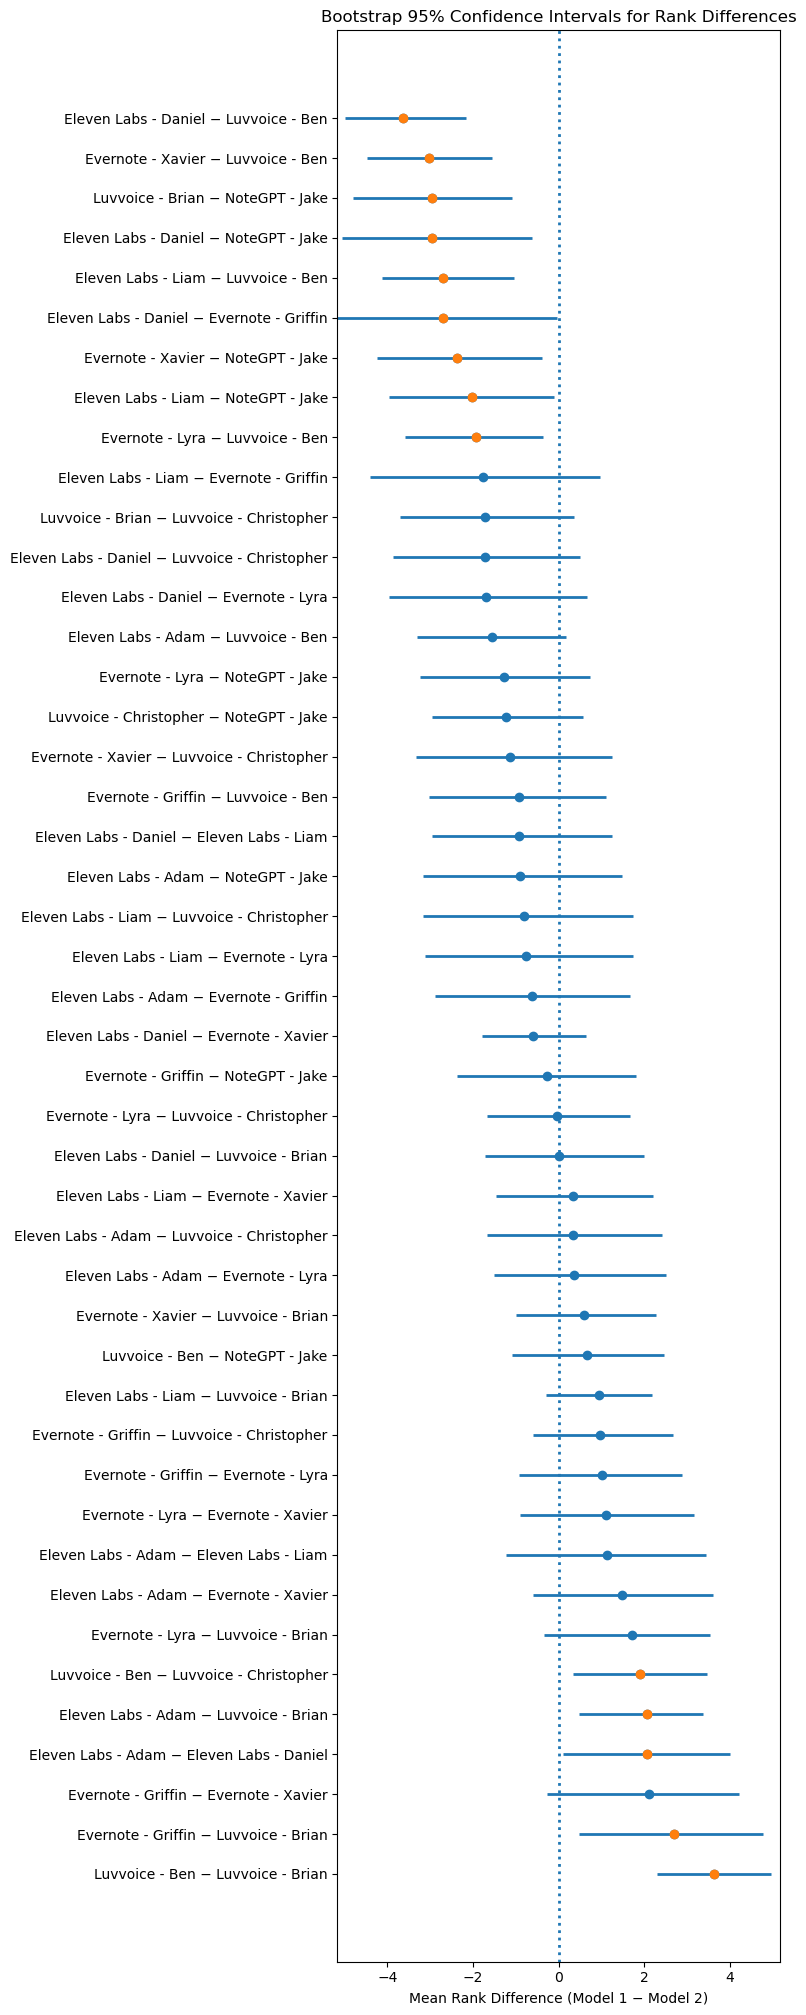

In [217]:
# Sort for nicer plotting
plot_df = final_results.copy()
plot_df["comparison"] = plot_df["Model_1"] + " − " + plot_df["Model_2"]
plot_df = plot_df.sort_values("Mean rank diff")

y_pos = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(8, 0.45 * len(plot_df)))

# Plot confidence intervals
ax.hlines(
    y=y_pos,
    xmin=plot_df["CI_lower"],
    xmax=plot_df["CI_upper"],
    linewidth=2,
)

# Plot mean differences as points
ax.plot(
    plot_df["Mean rank diff"],
    y_pos,
    "o",
)

# Vertical reference line at zero
ax.axvline(0, linestyle=":", linewidth=2)

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df["comparison"])

# Axis labels and title
ax.set_xlabel("Mean Rank Difference (Model 1 − Model 2)")
ax.set_title("Bootstrap 95% Confidence Intervals for Rank Differences")

# Improve layout
ax.invert_yaxis()  # best comparison at top

# Find those that are significant
significant = (
    (plot_df["CI_lower"] > 0) |
    (plot_df["CI_upper"] < 0)
)

# Make the plot symmetrical
max_abs = np.max(np.abs(
    np.r_[plot_df["CI_lower"], plot_df["CI_upper"]]
))
ax.set_xlim(-max_abs, max_abs)

# Colour significant mean differences orange
ax.plot(
    plot_df.loc[significant, "Mean rank diff"],
    y_pos[significant],
    "o",
)

plt.tight_layout()
plt.show()

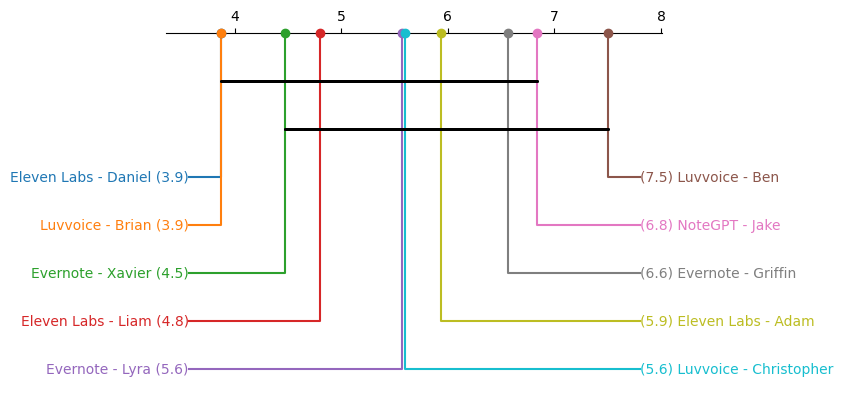

In [218]:
mean_ranks = speech_gen_mean.rank(axis=1).mean().sort_values()

sp.critical_difference_diagram(
    mean_ranks,
    nemenyi,
    text_h_margin=0.3
)

plt.show()

In [219]:
posthoc = r("""
run_friedman_posthoc <- function(rankings) {
    rankings_mat <- as.matrix(rankings)
    storage.mode(rankings_mat) <- "numeric"

    list(
    wilcoxon = pairwise.wilcox.test(
        x = as.vector(rankings_mat),
        g = factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))),
        paired = TRUE,
        p.adjust.method = "bonferroni"
    )
    )
}

posthoc_result <- suppressWarnings(
    { run_friedman_posthoc(rankings) }
)
posthoc_result
""")
print(posthoc.rx2("wilcoxon"))


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  as.vector(rankings_mat) and factor(rep(seq_len(ncol(rankings_mat)), each = nrow(rankings_mat))) 

   1     2     3     4     5     6     7     8     9    
2  1.000 -     -     -     -     -     -     -     -    
3  1.000 1.000 -     -     -     -     -     -     -    
4  1.000 1.000 1.000 -     -     -     -     -     -    
5  1.000 1.000 1.000 1.000 -     -     -     -     -    
6  1.000 1.000 1.000 0.963 1.000 -     -     -     -    
7  1.000 0.222 0.168 1.000 1.000 0.142 -     -     -    
8  0.761 1.000 1.000 1.000 1.000 1.000 0.059 -     -    
9  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 -    
10 1.000 1.000 0.765 1.000 1.000 0.925 1.000 0.192 1.000

P value adjustment method: bonferroni 

